In [1]:
import sys
sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana')

In [2]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *

In [3]:
import os

os.getcwd()

'/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana'

In [4]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50


In [5]:
deck_cmip6 = [AWICM11MR, BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CESM2WACCMFV2, CMCCCM2SR5, CNRMESM21, CNRMCM61, CNRMCM61HR, E3SM10, ECEarth3, ECEarth3Veg, FGOALSg3, GFDLCM4, CAMSCSM1, IPSLCM6ALR, INM_CM48, MPIESM12LR, MRIESM20, GISSE21G, GISSE22G, GISSE21H, MIROC6, MIROCES2L, NESM3, NorESM2MM, SAM0, TaiESM1]   #..current # 18 + 12
deck_nas_cmip6 = ['AWICM11MR', 'BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CESM2WACCMFV2', 'CMCCCM2SR5', 'CNRMESM2', 'CNRMCM61', 'CNRMCM61HR', 'E3SM10', 'ECEarth3', 'ECEarth3Veg', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'IPSLCM6ALR', 'INM_CM48', 'MPIESM12LR', 'MRIESM20', 'GISSE21G', 'GISSE21H', 'GISSE22G', 'MIROC6', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'SAM0', 'TaiESM1']

#.. current model #: 18 + 12 (except: '19')
path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Sep8_Observation_data/'


In [8]:
## PLot 1 # read data for ordinary, 1-lrm (not best):

# deck_nas2 = ['CESM2']
#.. 18 models now

# deck2 = [CESM2]

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT =  {}
output_2lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_2lrm_coef_LWP = {}
output_2lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}


# Report data: dictionaries
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}   # above are 3d-strcture array
output_2lrm_flavra_abr = {}
output_2lrm_flavra_PI  = {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_2lrm_mon_bin_predi_PI =  {}   # were monthly data in 1-d
output_2lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'
output_2lrm_stats_PI_rsut_lL = {}
output_2lrm_stats_abr_rsut_lL = {}
output_2lrm_stats_PI_alpha_cre_lL = {}
output_2lrm_stats_abr_alpha_cre_lL = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

# Threshold conditions:
# Tr_sst = 271.79
for i in range(len(deck2)):
    folder_2lrm = glob.glob(path1+ deck2[i]['modn']+'_r2r1_hotcold(Jan)_(largestpiR2)_' +'*' +'_dats.npz')  # '_swrpredi(largestpiR2)_'
    # print(folder_2lrm)
    print(i)
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    # output_ARRAY[deck_nas2[i]] = load(str(folder_2lrm[0]), allow_pickle=True)
    output_ARRAY[deck_nas2[i]] = load(str(folder_best2lrm), allow_pickle=True)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    
    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]]= output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predicted[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_coef_albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_array_albedo_pi']

    
    # Monthly data dict
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data dict
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    # Flattened Report monthly data dict
    output_2lrm_flavra_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']

    # Unflattened Predicted monthly data
    output_2lrm_mon_bin_predi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_predi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    
    # Statistic metrics measures the predictions
    # output_2lrm_stats_PI_rsut_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_PI_rsut_lL']
    # output_2lrm_stats_abr_rsut_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_abr_rsut_lL']
    # output_2lrm_stats_PI_alpha_cre_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_PI_alpha_cre_lL']
    # output_2lrm_stats_abr_alpha_cre_lL[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['stats_dict_abr_alpha_cre_lL']

    
    # INDEX of differerent regimes: determine regime-dependent model mean_state LWP:
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']

    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']
    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']

print('Done read 2-LRM file(s)')

0
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/AWI-CM-1-1-MR_r2r1_hotcold(Jan)_(largestpiR2)_267.89_dats.npz
1
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_268.19_dats.npz
2
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_257.12_dats.npz
3
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_269.19_dats.npz
4
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_269.73_dats.npz
5
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_269.27_dats.npz
6
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-WACCM-FV2_r2r1_hotcold(Jan)_(largestpiR2)_269.85_dats.npz
7
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CMCC-CM2-SR5_r2r1_hotcold(Jan)_(largestpiR2)_268.61_dats.npz
8
/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2

In [7]:
print(output_ind_Hot_PI['MRIESM20'].shape)

print(output_2lrm_coef_albedo['CESM2'])

print(output_2lrm_coef_LWP['CESM2'])

(769824,)
[0.77811992 0.66954366 0.21694503]
[[array([ 0.00175911,  0.0130493 , -0.00044703,  0.08558443])
  -0.401644764536895]
 [array([-0.00231226,  0.00314889,  0.00389991,  0.05213762])
  0.7220064091219358]]


In [8]:
print(output_2lrm_stats_abr_albedo_lL[deck_nas2[2]])

print('  ')

print(output_2lrm_stats_PI_albedo_lL[deck_nas2[2]])

NameError: name 'output_2lrm_stats_abr_albedo_lL' is not defined

In [7]:
## PLot 1' # read data for best fit, 4-lrm:

output_ARRAY_best4 = {}   # storage output file
output_intermedia_best4 = {}   # storage the 'rawdata_dict'

output_dict0_PI_best4 = {}
output_dict0_abr_best4 = {}

output_GMT =  {}
output_4lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_4lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_4lrm_coef_LWP = {}
output_4lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_4lrm_coef_albedo_lL = {}


# Report data: dictionaries
output_4lrm_yr_bin_abr = {}
output_4lrm_yr_bin_PI  = {}
output_4lrm_mon_bin_abr = {}
output_4lrm_mon_bin_PI = {}  # above are 3d-strcture array
# output_4lrm_flavra_abr =  {}
# output_4lrm_flavra_PI  =  {}   # were monthly data in 1-d

shape_mon_pi = {}
shape_mon_abr = {}
output_4lrm_metric_actual_PI = {}
output_4lrm_metric_actual_abr = {}

# Predicted data:
output_4lrm_mon_bin_predi_PI =  {}
output_4lrm_mon_bin_predi_abr = {}


# Index for regime(s): Only for 4lrm
output_ind_Cold_Up_PI = {}
output_ind_Hot_Up_PI = {}
output_ind_Cold_Down_PI = {}
output_ind_Hot_Down_PI = {}

output_ind_Cold_Up_abr = {}
output_ind_Hot_Up_abr = {}
output_ind_Cold_Down_abr = {}
output_ind_Hot_Down_abr = {}

TR_sst =  271.79
TR_sub =  1.0

for j in range(len(deck2)):
    # Best fit_files:
    
    folder_4lrm = glob.glob(path1 +deck2[j]['modn'] +'_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_' + '*K'+'_ud'+ '*' +'_dats.npz')
    print(folder_4lrm)
    output_ARRAY_best4[deck_nas2[j]] = load(str(folder_4lrm[0]), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    
    # folder_4lrm =  glob.glob(path1 +deck2[j]['modn'] +'_swrpredi(largestpiR2)_' + '*K'+'_ud'+ '*' +'_dats.npz')
    # print(folder_4lrm)
    # output_ARRAY_best4[deck_nas2[j]] =  load(str(folder_4lrm), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    # defined Thresholds files:
    # output_ARRAY_best4[deck_nas2[j]] =  load(path1+deck2[j]['modn']+'_swrpredi_'+ str(TR_sst)+'K'+'_ud'+ str(TR_sub)+ '_dats.npz', allow_pickle=True)  
    
    output_intermedia_best4[deck_nas2[j]] = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    
    output_dict0_PI_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['GMT']
    output_4lrm_predicted[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['predicted_metrics']
    output_4lrm_report[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['report_metrics']
    output_4lrm_coef_LWP[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['Coef_dict']
    output_4lrm_coef_albedo[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['coef_array_albedo_pi']

    # Monthly data dict
    output_4lrm_mon_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data dict
    output_4lrm_yr_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']
    
    # Metric monthly mean bin data
    shape_mon_pi[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['shape_mon_abr_3']
    output_4lrm_metric_actual_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['metric_training']
    output_4lrm_metric_actual_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['metric_predict']
    
    
    # Flattened Predicted monthly bin data
    output_4lrm_mon_bin_predi_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_predi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']
    
    
    
    # Statistic metrics measures the predictions
    # output_4lrm_stats_PI_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_rsut_lL']
    # output_4lrm_stats_abr_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_rsut_lL']
    # output_4lrm_stats_PI_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_albedo_lL']
    # output_4lrm_stats_abr_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_albedo_lL']

    # INDEX of regime(s): determine regime-dependent model mean_state LWP
    output_ind_Cold_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_PI']
    output_ind_Hot_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_PI']
    output_ind_Cold_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_PI']
    output_ind_Hot_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_PI']
    output_ind_Cold_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_abr']
    output_ind_Hot_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_abr']
    output_ind_Cold_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_abr']
    output_ind_Hot_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_abr']

print('Done read 4-LRM file(s)')


['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-3.63K_ud0.17_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-12.91K_ud-0.89_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_0.28K_ud1.71_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-0.42K_ud1.9_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_0.35K_ud1.7_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-1.55K_ud0.97_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-4.57K_ud-0.31_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_-

In [9]:
print(output_4lrm_coef_albedo[deck_nas2[2]][0])

print('  ')

# print(output_4lrm_stats_PI_albedo_lL[deck_nas2[2]])
print(output_4lrm_coef_LWP['CESM2'])

1.6378886565793553
  
[[array([ 0.00202401,  0.01162256, -0.0003433 ,  0.07178423])
  -0.46841057198005526]
 [array([-0.00227673,  0.00737221,  0.00332318,  0.27133724])
  0.7152955943638792]
 [array([ 0.00117105,  0.00923923, -0.00022876,  0.02058801])
  -0.2628916747253394]
 [array([-2.04938843e-03,  1.92288617e-04,  4.12628070e-03, -2.11856503e-01])
  0.6527703343163355]]


In [16]:
# ## PLot 1' # read data for best fit, single regime model (1lrm):

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_1lrm = {}   # storage output file
output_intermedia_1lrm = {}   # storage the 'rawdata_dict'

output_dict0_PI_1lrm = {}
output_dict0_abr_1lrm = {}

output_GMT = {}
output_1lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_1lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_1lrm_coef_LWP = {}
output_1lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_1lrm_coef_albedo_lL = {}

# Report data: dictionaries
output_1lrm_yr_bin_abr =  {}
output_1lrm_yr_bin_PI  =  {}
output_1lrm_mon_bin_abr =  {}
output_1lrm_mon_bin_PI  =  {}   # above are 3d-strcture array
output_1lrm_flavra_abr =  {}
output_1lrm_flavra_PI  =  {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_1lrm_mon_bin_predi_PI =  {}   # were monthly data in 1-d
output_1lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'
output_1lrm_stats_PI_rsut_lL = {}
output_1lrm_stats_abr_rsut_lL = {}
output_1lrm_stats_PI_albedo_lL = {}
output_1lrm_stats_abr_albedo_lL = {}

# Index for regime(s): Only for 1lrm
output_ind_False_PI = {}
output_ind_True_PI = {}
output_ind_False_abr = {}
output_ind_True_abr = {}

TR_sst = 0.0
TR_sub = 0.0

for j in range(len(deck2)):
    # Best fit_files:
    
    folder_1lrm = glob.glob(path1 +deck2[j]['modn'] +'_r1(Jan)_(largestpiR2)_' +'0.0'+'_dats.npz')
    print(folder_1lrm)
    output_ARRAY_1lrm[deck_nas2[j]] = load(str(folder_1lrm[0]), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    
    # folder_1lrm =  glob.glob(path1 +deck2[j]['modn'] +'_swrpredi(largestpiR2)_' + '*K'+'_ud'+ '*' +'_dats.npz')
    # print(folder_1lrm)
    # output_ARRAY_1lrm[deck_nas2[j]] =  load(str(folder_1lrm), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    # defined Thresholds files:
    # output_ARRAY_1lrm[deck_nas2[j]] =  load(path1+deck2[j]['modn']+'_swrpredi_'+ str(TR_sst)+'K'+'_ud'+ str(TR_sub)+ '_dats.npz', allow_pickle=True)
    
    output_intermedia_1lrm[deck_nas2[j]] = output_ARRAY_1lrm[deck_nas2[j]]['rawdata_dict']
    
    output_dict0_PI_1lrm[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_1lrm[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['dict1_abr_var']

    
    output_GMT[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['GMT']
    output_1lrm_predicted[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['predicted_metrics']
    output_1lrm_report[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['report_metrics']
    output_1lrm_coef_LWP[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['Coef_dict']
    output_1lrm_coef_albedo[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['Coef_dict_albedo']

    
    # Monthly data dict
    output_1lrm_mon_bin_PI[deck_nas2[j]] = output_dict0_PI_1lrm[deck_nas2[j]]['dict1_mon_bin_PI']
    output_1lrm_mon_bin_abr[deck_nas2[j]] = output_dict0_abr_1lrm[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data dict
    output_1lrm_yr_bin_PI[deck_nas2[j]] = output_dict0_PI_1lrm[deck_nas2[j]]['dict1_yr_bin_PI']
    output_1lrm_yr_bin_abr[deck_nas2[j]] = output_dict0_abr_1lrm[deck_nas2[j]]['dict1_yr_bin_abr']
    # Flattened Report monthly data dict
    output_1lrm_flavra_PI[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_1lrm_flavra_abr[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['dict2_predi_fla_abr']
    # Flattened Predicted monthly data
    output_1lrm_mon_bin_predi_PI[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['albedo_lL_predi_bin_PI']
    output_1lrm_mon_bin_predi_abr[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['albedo_lL_predi_bin_abr']

    
    # Statistic metrics measures the predictions
    # output_1lrm_stats_PI_rsut_lL[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['stats_dict_PI_rsut_lL']
    # output_1lrm_stats_abr_rsut_lL[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['stats_dict_abr_rsut_lL']
    # output_1lrm_stats_PI_albedo_lL[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['stats_dict_PI_albedo_lL']
    # output_1lrm_stats_abr_albedo_lL[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['stats_dict_abr_albedo_lL']

    # INDEX of regime(s): determine regime-dependent model mean_state LWP
    output_ind_False_PI[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['ind_False_PI']
    output_ind_True_PI[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['ind_True_PI']
    output_ind_False_abr[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['ind_False_abr']
    output_ind_True_abr[deck_nas2[j]] = output_intermedia_1lrm[deck_nas2[j]][()]['ind_True_abr']

print('Done read 1lrm file(s)')


['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/BCC-ESM1_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CanESM5_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-FV2_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CESM2-WACCM_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/CNRM-ESM2-1_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/GISS-E2-1-G_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/data_file/GISS-E2-1-H_r1(Jan)_(largestpiR2)_0.0_dats.npz']
['/glade/work/c

In [13]:
# print(output_1lrm_stats_abr_albedo_lL[deck_nas2[2]])

print('  ')

# print(output_1lrm_stats_PI_albedo_lL[deck_nas2[2]])

{'shape1': [0.06834355227214906, 0.7128425739876221]}
  
{'shape1': [0.043690725916575184, 0.8890975273334141]}


(72,)
(9,)


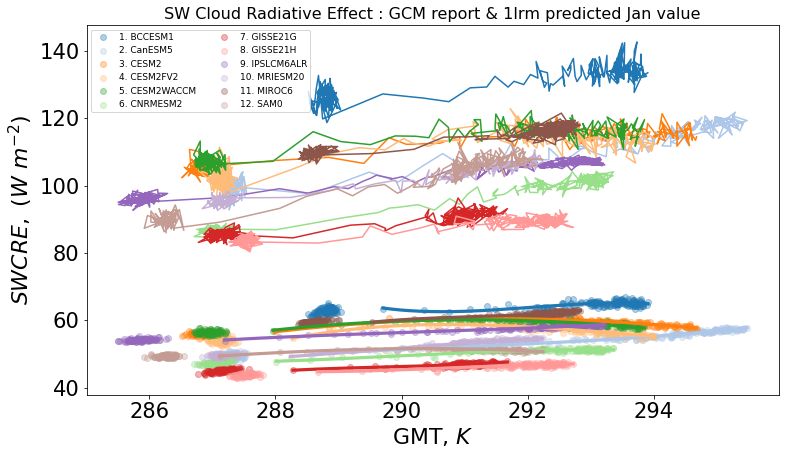

In [17]:
# SWCRE ('rsut - rsutcs') v.s GMT PLOTS

parameters = {'axes.labelsize': 22, 'legend.fontsize': 9,
         'axes.titlesize': 16,  'xtick.labelsize': 21,  'ytick.labelsize':21 }
plt.rcParams.update(parameters)

fig3, ax3  = plt.subplots(1, 1, figsize = (12.4, 6.8))  #(16.2, 9.3))

# These are the colors that will be used in the plot
my_colors = array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5' ])   #..plt.rcParams['axes.prop_cycle']()


# dict, storage the annually, area_meaned prediction and actual values of variables: 
output_swcre_report = {}

output_swcre_predicted = {}

# Added a random value (s=1) to separate the lines 
# a: the model's index
# a = 2

b = "1lrm"
Yrs = {}
shape_yr_modelPI = 99
shape_yr_modelabr = 150
plot_lines1 = []
plot_lines2 = []
plot_lines3 = []

#..set are-mean range and define function
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number: 72
y_range  = arange(-85, -40, 5.) +2.5   #..southern-ocaen latitude edge: 9
print(x_range.shape)
print(y_range.shape)

for a in arange(len(deck_nas2)):

    # Yrs[deck_nas2[a]] = arange(shape_yr_modelPI + shape_yr_modelabr)
    GMT = output_GMT[deck_nas2[a]][0:249]
    Yrs = arange(0, 250)
    # if (deck_nas2[a]=='CESM2') or (deck_nas2[a]=='CESM2FV2') or (deck_nas2[a]=='CESM2WACCM'):   #.. FGOALSg3
    #if (deck_nas2[a] == 'E3SM10') or (deck_nas2[a]== 'BCCESM1') or (deck_nas2[a] =='GFDLCM4'): 
    # if deck_nas2[a]=='GISSE21H' or deck_nas2[a]=='GISSE21G':
    # output_yrs[deck_nas2[a]]  = arange(shape_yr_modelPI + shape_yr_modelabr[deck_nas2[a]])

    output_swcre_report[deck_nas2[a]] = (output_2lrm_report[deck_nas2[a]]['rsut'][:shape_yr_modelPI+shape_yr_modelabr] - output_2lrm_report[deck_nas2[a]]['rsutcs'][:shape_yr_modelPI+shape_yr_modelabr])
    output_swcre_predicted[deck_nas2[a]] = (output_1lrm_predicted[deck_nas2[a]]['rsut'][:shape_yr_modelPI+shape_yr_modelabr] - output_1lrm_report[deck_nas2[a]]['rsutcs'][:shape_yr_modelPI+shape_yr_modelabr])

    # Plotting sessions:
    ax3.scatter(output_GMT[deck_nas2[a]][0:249], output_swcre_report[deck_nas2[a]][0:249], c = my_colors[a], alpha = .35, label = str(a+1)+'. '+ deck_nas2[a], zorder=0) 

    l2, = ax3.plot(output_GMT[deck_nas2[a]][0:249], output_swcre_predicted[deck_nas2[a]][0:249], c = my_colors[a]) #.., label='predict change: '+deck_nas2[a]+ f': 2LRM: TR_sst= {Tr_sst}K' 
    plot_lines3.append(l2)



    GMT_pxy = linspace(min(GMT[99:249]), max(GMT[99:249]),150)
    #GMT_pxy = append(GMT[0:99], GMT_pxy)

    # plot fitting lines of report values:
    parameter = polyfit(GMT[99:249], output_swcre_report[deck_nas2[a]][99:249], 3)
    y2 = parameter[0]*GMT_pxy**3 + parameter[1]*GMT_pxy**2 +parameter[2]*GMT_pxy + parameter[3]
    l2, = ax3.plot(GMT_pxy, y2, alpha = 1.0, linewidth= 3.20, c = my_colors[a], zorder = 2) # , label='Best fit of '+ deck_nas2[a]
    plot_lines1.append(l2)

    # plot fitting lines of predicted values
    parameter2 = polyfit(GMT[99:249], output_swcre_predicted[deck_nas2[a]][99:249], 3)
    # y3 = parameter2[0]*GMT_pxy**3 + parameter2[1]*GMT_pxy**2 + parameter2[2]*GMT_pxy + parameter2[3]
    # l3, = ax3.plot(GMT_pxy, y3, alpha = 1.0, linewidth = 3.20, linestyle='-.', c = my_colors[a], zorder = 3)
    # plot_lines2.append(l3)


plt.xlabel('GMT, '+ r'$K$' )
plt.ylabel(r'$SWCRE,\ $' + r'$(W\ m^{-2}) $')
plt.title(" SW Cloud Radiative Effect : GCM report & "+ b + " predicted Jan value ")

# legend and Add additional legends:
# legend1 = plt.legend([ plot_lines1[-2], plot_lines2[-2]], [ r'$\ polyfit\ of\ GCM\ SWCRE $', ' smoothed 2lrm_UpDown predicted SWCRE '], loc='upper right', bbox_to_anchor=(0.345, 0.726)) # bboxtoanchor(argu: x, y, width, height)

plt.legend(loc='upper left', ncol =2, borderpad=0.34, fontsize =9)
# plt.gca().add_artist(legend1)



# plt.savefig(path6+"plot_JanswCrE_2lrm", dpi = 250)

### SWCRE = 'rsut' - 'rsutcs'

rsut: Upwelling shortwave radiative flux at the top of atmosphere;  
rsutcs: Upwelling shortwave radiative flux at toa, but assuming clear sky.

/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:41: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] =  nanmean(data[i*12:(i+1)*12,:,:], axis=0)
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:41: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] =  nanmean(data[i*12:(i+1)*12,:,:], axis=0)
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:41: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] =  nanmean(data[i*12:(i+1)*12,:,:], axis=0)
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:41: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] =  nanmean(data[i*12:(i+1)*12,:,:], axis=0)
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:41: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] =  nanmean(data[i*12:(i+1)*12,:,:], axis=0)
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_

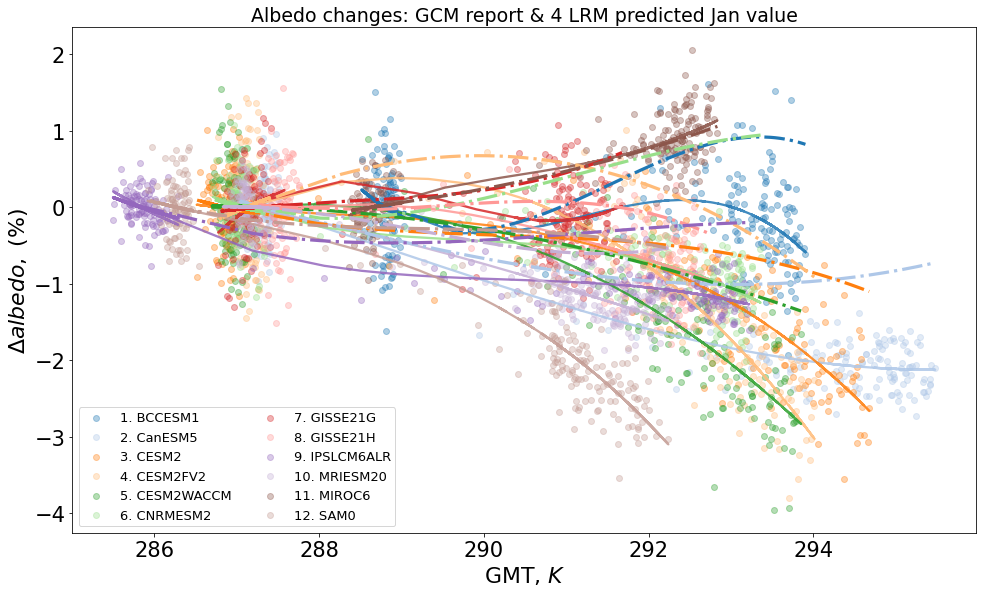

In [16]:
## PLot 1,2 #...pi-C + Abr Plot:

parameters = {'axes.labelsize': 22, 'legend.fontsize': 14,
         'axes.titlesize': 19,  'xtick.labelsize': 21,  'ytick.labelsize':21 }
plt.rcParams.update(parameters)

fig1, ax1  = plt.subplots(1, 1, figsize = (16.2, 9.3))  #(17.8, 12.6))

# These are the colors that will be used in the plot
my_colors= array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors


# dict, storage the annually, area_meaned prediction and actual values of variables: 
output_dabrmeanpi_report = {}
output_dabrmeanpi_report2 = {}
output_dabrmeanpi_predicted = {}
output_dabrmeanpi_predicted2 = {}
# print(output_2lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin'][0:99,:,:])

# Added a random value (s=1) to separate the lines 
at = random.rand(18) * 3.0
b = "4 LRM"
output_yrs = {}
shape_yr_modelPI = 99
shape_yr_modelabr = 150
plot_lines1 = []
plot_lines2 = []
plot_lines3 = []

#..set are-mean range and define function
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -50, 5.) +2.5   #..southern-ocaen latitude edge: 9 -2 =7
output_2report_pi = {}
output_2report_abr ={}

output_2predicted_pi = {}
output_2predicted_abr ={}

for a in range(len(deck2)):
    
    output_yrs[deck_nas2[a]] = arange(shape_yr_modelPI + shape_yr_modelabr)
    output_2report_pi[deck_nas2[a]] = area_mean(get_annually_metric(output_2lrm_mon_bin_PI[deck_nas2[a]]['albedo_mon_bin'][0:99*12,0:7,:], 99*12, 7, 72), y_range, x_range)
    output_2report_abr[deck_nas2[a]] = area_mean(get_annually_metric(output_2lrm_mon_bin_abr[deck_nas2[a]]['albedo_mon_bin'][0:150*12,0:7,:], 150*12, 7, 72), y_range, x_range)
    
    output_2predicted_pi[deck_nas2[a]] = area_mean(get_annually_metric(output_2lrm_mon_bin_predi_PI[deck_nas2[a]][0:99*12,0:7,:], 99*12, 7, 72), y_range, x_range)
    output_2predicted_abr[deck_nas2[a]] = area_mean(get_annually_metric(output_2lrm_mon_bin_predi_abr[deck_nas2[a]][0:150*12,0:7,:], 150*12, 7, 72), y_range, x_range)
    
    # if deck_nas2[a]== 'MRIESM20':
    # if (deck_nas2[a]=='CESM2') or (deck_nas2[a]=='CESM2FV2') or (deck_nas2[a]=='CESM2WACCM'):   #.. FGOALSg3
    # if deck_nas2[a]=='GISSE21H' or deck_nas2[a]=='GISSE21G':
    # output_yrs[deck_nas2[a]]  = arange(shape_yr_modelPI + shape_yr_modelabr[deck_nas2[a]])

    output_dabrmeanpi_report[deck_nas2[a]] =  100. *(output_2lrm_report[deck_nas2[a]]['albedo'][:shape_yr_modelPI+shape_yr_modelabr] - nanmean(output_2lrm_report[deck_nas2[a]]['albedo'][:shape_yr_modelPI]))
    output_dabrmeanpi_report2[deck_nas2[a]] = 100.* (concatenate([output_2report_pi[deck_nas2[a]][0:shape_yr_modelPI], output_2report_abr[deck_nas2[a]][0:shape_yr_modelabr]], axis = 0) - nanmean(output_2report_pi[deck_nas2[a]][0:shape_yr_modelPI]))
    output_dabrmeanpi_predicted[deck_nas2[a]] = 100. *(output_1lrm_predicted[deck_nas2[a]]['albedo'][:shape_yr_modelPI+shape_yr_modelabr] - nanmean(output_1lrm_predicted[deck_nas2[a]]['albedo'][0:shape_yr_modelPI]))
    output_dabrmeanpi_predicted2[deck_nas2[a]] = 100.* (concatenate([output_2predicted_pi[deck_nas2[a]][0:shape_yr_modelabr], output_2predicted_abr[deck_nas2[a]][0:shape_yr_modelabr]], axis = 0) - nanmean(output_2predicted_pi[deck_nas2[a]][0:shape_yr_modelabr]))

    # Plotting section:
    ax1.scatter(output_GMT[deck_nas2[a]][0:249], output_dabrmeanpi_report[deck_nas2[a]][0:249], c = my_colors[a], alpha = .35, label = str(a+1)+'. '+ deck_nas2[a], zorder=0) 
    # ax1.scatter(output_GMT[deck_nas2[a]][0:249], output_dabrmeanpi_report2[deck_nas2[a]][0:249], alpha = .35, c = my_colors[a], label = deck_nas2[a]+r"$\ :50-85 ^{o}\ Latitude band$", zorder=0)   #, move the line a little, +at[a]
    # l3, = ax1.plot(output_GMT[deck_nas2[a]][0:249], output_dabrmeanpi_predicted[deck_nas2[a]][0:249], c = my_colors[a]) #.., label='predict change: '+deck_nas2[a]+ f': 2LRM: TR_sst= {Tr_sst}K' 
    # plot_lines3.append(l2)

    GMT = output_GMT[deck_nas2[a]][0:249]
    Yrs = arange(0, 250)

    GMT_pxy = linspace(min(GMT[99:249]), max(GMT[99:249]), 150)
    GMT_pxy = append(GMT[0:99], GMT_pxy)

    # plot fitting lines of report values:
    parameter = polyfit(GMT, output_dabrmeanpi_report[deck_nas2[a]], 3)
    y2 = parameter[0]*GMT**3 + parameter[1]*GMT**2 +parameter[2]*GMT + parameter[3]
    l2, = ax1.plot(GMT, y2, alpha = 0.85, linewidth= 2.30, c = my_colors[a], zorder = 2) # , label='Best fit of '+ deck_nas2[a]
    plot_lines1.append(l2)

    # plot fitting lines of predicted values
    parameter2 = polyfit(GMT[0:249], output_dabrmeanpi_predicted[deck_nas2[a]][0:249], 3)
    y3 = parameter2[0]*GMT_pxy**3 + parameter2[1]*GMT_pxy**2 + parameter2[2]*GMT_pxy + parameter2[3]
    l3, = ax1.plot(GMT_pxy, y3, alpha = 1.0, linewidth = 3.20, linestyle='-.', c = my_colors[a], zorder = 3)
    plot_lines2.append(l3)

# print(output_2lrm_mon_bin_predi_PI[deck_nas2[9]][0:99*12,0:7,:])

plt.xlabel('GMT, '+ r'$K$' )
plt.ylabel(r'$\Delta albedo,\ $' + r'$(\%)$') 
plt.title(" Albedo changes: GCM report & "+ b + " predicted Jan value ")

# legend and Add additional legends:
# legend1 = plt.legend([ plot_lines1[-1], plot_lines2[-1]], [ r'$\ polyfit\ of\ GCM\ \Delta LWP$', ' smoothed 2lrm predicted '], loc='upper right', bbox_to_anchor=(0.32, 0.46)) # bboxtoanchor(argu: x, y, width, height)
# legend1 = plt.legend([plot_lines2[-1]], [ b +r"$\ predicted\ albedo\ (least\ 'abrupt-4xCO2'\ MAE)$"], loc='upper right', bbox_to_anchor=(0.49, 0.52), fontsize = 14) # bboxtoanchor(argu: x, y, width, height) 

plt.legend(loc='lower left', ncol =2, borderpad = 0.34, fontsize = 13)
# plt.gca().add_artist(legend1)


# # save the last value of report /predicted values

# lyr_abr_actual  =[]
# lyr_abr_predict  =[]
# for i in range(len(deck_nas2)):
    
#     lyr_abr_actual.append(area_mean(get_annually_metric(output_2lrm_mon_bin_abr[deck_nas2[i]]['albedo_mon_bin'][0:150*12,:,:], 150*12, 9, 72), y_range, x_range)[-1])
#     # print(output_2lrm_report[deck_nas2[i]]['albedo'])
#     # print(output_2lrm_predicted[deck_nas2[i]]['albedo_lL'])
#     lyr_abr_predict.append(output_4lrm_predicted[deck_nas2[i]]['albedo_lL'][-1])


# plt.savefig(path6+"plot_swradiation_50-85range_albedochange4lrm", dpi = 250)

### albedo $(\alpha)$ = rsut/ rsdt

### Predicted albedo = a1 * LWP + a2 * albedo_clear-sky + a3 (constant)

In [5]:
sns.set_style("whitegrid", {"grid.color": "white", "grid.linestyle": "None"})

[[array([ 0.00325892,  0.04715352, -0.00234511,  0.11058176])
  -0.7876456446562331]
 [array([-0.00255799,  0.01178392,  0.00442283, -0.04610983])
  0.7792582798798431]]
[69.85649326  3.91599902 47.15351558 28.95904781 47.5089477   8.88995723
 43.838575   39.88822878  8.11130332 15.20678238  3.87477675  5.16604748]


Text(0.5, 1.0, '2 LRM$\\ Coef\\ of\\ \\frac{\\Delta albedo} {\\Delta lwp},\\ Unit\\ in\\ \\frac{\\%}{Kg*m^{-2}}$')

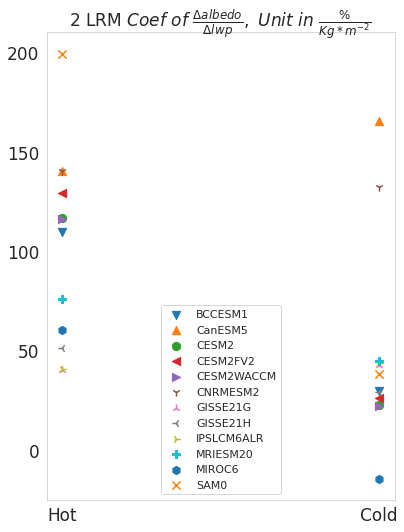

In [18]:
# coefs: 2 lrm albedo_LWP & LWP_P-E
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2  = plt.subplots(1, 1, figsize =(6.24, 8.6))  # (16.2, 9.3))


b = "2 LRM"
x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yra
y_15yr = x_15yr
x = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:
stcoef1 = []
stcoef2 = []

stcoef_sst1 = []
stcoef_sst2 = []

stcoef_qcon1 = []
stcoef_qcon2 = []

stcoef_stabil1 = []
stcoef_stabil2 = []

stcoef_sub5001 = []
stcoef_sub5002 = []
print(output_2lrm_coef_LWP[deck_nas2[2]])

for i in arange(len(deck_nas2)):
    stcoef1.append(output_2lrm_coef_albedo[deck_nas2[i]][0][0][0])
    stcoef2.append(output_2lrm_coef_albedo[deck_nas2[i]][1][0][0])
    
    stcoef_sst1.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][0])
    stcoef_sst2.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][0])
    
    stcoef_qcon1.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][1])
    stcoef_qcon2.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][1])
    
    stcoef_stabil1.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][2])
    stcoef_stabil2.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][2])
    
    stcoef_sub5001.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][3])
    stcoef_sub5002.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][3])
    
stcoef1 = asarray(stcoef1) * 100.
stcoef2 = asarray(stcoef2) * 100.

stcoef_sst1 = asarray(stcoef_sst1) * 1000.
stcoef_sst2 = asarray(stcoef_sst2) * 1000.

stcoef_qcon1 = asarray(stcoef_qcon1) * 1000.
stcoef_qcon2 = asarray(stcoef_qcon2) * 1000.

stcoef_stabil1 = asarray(stcoef_stabil1) * 1000.
stcoef_stabil2 = asarray(stcoef_stabil2) * 1000.

stcoef_sub5001 = asarray(stcoef_sub5001) * 1000.
stcoef_sub5002 = asarray(stcoef_sub5002) * 1000.
print(stcoef_qcon1)


# print(asarray([stcoef2, stcoef1]).reshape(2, 12))  # 'hot' , 'cold'
# d1 = {'col1': arange(0, 12), 'value': stcoef1.ravel(), 'Regimes': array(['Cold']*12 )}
# data1  = pd.DataFrame(data=d1, index=arange(0, 12*1))

# d2 = {'col1': arange(0, 12), 'value': stcoef2.ravel(), 'Regimes': array(['Hot' ]*12 )}
# data2  = pd.DataFrame(data=d2, index = arange(0, 12*1))

# Plotting set
for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2], [stcoef2[j], stcoef1[j]], marker = deck_marker[j], label = deck_nas2[j], s= 68)
    # plt.scatter([3, 4], [stcoef_qcon2[j], stcoef_qcon1[j]], marker = deck_marker[j], s= 34)
    
plt.xticks([1, 2], ['Hot', 'Cold'])
# plt.xticks([1, 2, 3, 4], [r"$Hot$", r"$Cold$", r"$Hot/n \frac{\partial LWP}{\partial q_{conv}}$", r"$Cold/n \frac{\partial LWP}{\partial q_{conv}}$"])

plt.legend()
plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_2lrm_may27th_Jandalbedo_dlwp", dpi = 250)

[[array([0.00042372, 0.02374972, 0.00018687, 0.05087153])
  -0.10428568905043002]
 [array([ 0.00327573,  0.02521438,  0.00121635, -0.02238526])
  -0.8343653849203556]]


IndexError: invalid index to scalar variable.

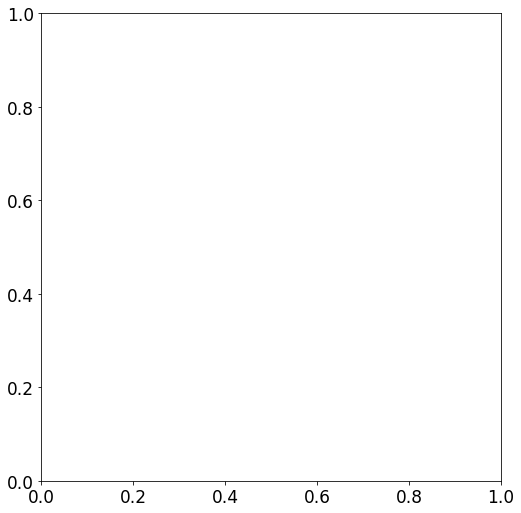

In [18]:
# coefs: 4 lrm
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2  = plt.subplots(1, 1, figsize =(8.24, 8.6))  # (16.2, 9.3))


b = "4 LRM"
x_15yr = linspace(0.0005, 0.018, 18) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.031, 18) * 1000.   # for all 150yr
y   = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:
stcoef11 = []
stcoef12 = []
stcoef13 = []
stcoef14 = []

stcoef_sst11 = []
stcoef_sst12 = []
stcoef_sst13 = []
stcoef_sst14 = []

stcoef_qcon11 = []
stcoef_qcon12 = []
stcoef_qcon13 = []
stcoef_qcon14 = []

stcoef_stabil11 = []
stcoef_stabil12 = []
stcoef_stabil13 = []
stcoef_stabil14 = []

stcoef_sub50011 = []
stcoef_sub50012 = []
stcoef_sub50013 = []
stcoef_sub50014 = []
print(output_2lrm_coef_LWP[deck_nas2[9]])
for i in arange(len(deck_nas2)):
    if i!= 9:
        stcoef11.append(output_4lrm_coef_albedo[deck_nas2[i]][0][0][0])
        stcoef12.append(output_4lrm_coef_albedo[deck_nas2[i]][1][0][0])
        stcoef13.append(output_4lrm_coef_albedo[deck_nas2[i]][2][0][0])
        stcoef14.append(output_4lrm_coef_albedo[deck_nas2[i]][3][0][0])
        
        stcoef_sst11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][0])
        stcoef_sst12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][0])
        stcoef_sst13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][0])
        stcoef_sst14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][0])
        
        stcoef_qcon11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][1])
        stcoef_qcon12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][1])
        stcoef_qcon13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][1])
        stcoef_qcon14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][1])
        
        stcoef_stabil11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][2])
        stcoef_stabil12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][2])
        stcoef_stabil13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][2])
        stcoef_stabil14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][2])
        
        stcoef_sub50011.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][3])
        stcoef_sub50012.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][3])
        stcoef_sub50013.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][3])
        stcoef_sub50014.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][3])
        
    elif i== 9:
        stcoef11.append(output_4lrm_coef_albedo[deck_nas2[i]][0][0][0])
        stcoef12.append(output_2lrm_coef_albedo[deck_nas2[i]][1][0][0])
        stcoef13.append(output_2lrm_coef_albedo[deck_nas2[i]][0][0][0])
        stcoef14.append(output_4lrm_coef_albedo[deck_nas2[i]][1][0][0])
        
        stcoef_sst11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][0])
        stcoef_sst12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][0])
        stcoef_sst13.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][0])
        stcoef_sst14.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][0])
        
        stcoef_qcon11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][1])
        stcoef_qcon12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][1])
        stcoef_qcon13.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][1])
        stcoef_qcon14.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][1])
        
        stcoef_stabil11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][2])
        stcoef_stabil12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][2])
        stcoef_stabil13.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][2])
        stcoef_stabil14.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][2])
        
        stcoef_sub50011.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][3])
        stcoef_sub50012.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][3])
        stcoef_sub50013.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][3])
        stcoef_sub50014.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][3])

stcoef11 = asarray(stcoef11) * 100.
stcoef12 = asarray(stcoef12) * 100.
stcoef13 = asarray(stcoef13) * 100.
stcoef14 = asarray(stcoef14) * 100.

stcoef_sst11 = asarray(stcoef_sst11) * 1000.
stcoef_sst12 = asarray(stcoef_sst12) * 1000.
stcoef_sst13 = asarray(stcoef_sst13) * 1000.
stcoef_sst14 = asarray(stcoef_sst14) * 1000.

stcoef_qcon11 = asarray(stcoef_qcon11) * 1000.
stcoef_qcon12 = asarray(stcoef_qcon12) * 1000.
stcoef_qcon13 = asarray(stcoef_qcon13) * 1000.
stcoef_qcon14 = asarray(stcoef_qcon14) * 1000.
print(stcoef_qcon12)

stcoef_stabil11 = asarray(stcoef_stabil11) * 1000.
stcoef_stabil12 = asarray(stcoef_stabil12) * 1000.
stcoef_stabil13 = asarray(stcoef_stabil13) * 1000.
stcoef_stabil14 = asarray(stcoef_stabil14) * 1000.

stcoef_sub50011 = asarray(stcoef_sub50011) * 1000.
stcoef_sub50012 = asarray(stcoef_sub50012) * 1000.
stcoef_sub50013 = asarray(stcoef_sub50013) * 1000.
stcoef_sub50014 = asarray(stcoef_sub50014) * 1000.

d1 = {'col1': arange(0, 12), 'value': stcoef11.ravel(), 'Regimes': array(['Cold & Up']*12 )}
data1  = pd.DataFrame(data=d1, index=arange(0, 12*1))

d2 = {'col1': arange(0, 12), 'value': stcoef12.ravel(), 'Regimes': array(['Hot & Up']*12 )}
data2  = pd.DataFrame(data=d2, index = arange(0, 12*1))

d3 = {'col1': arange(0, 12), 'value': stcoef13.ravel(), 'Regimes': array(['Cold & Down']*12 )}
data3  = pd.DataFrame(data=d3, index=arange(0, 12*1))
d4 = {'col1': arange(0, 12), 'value': stcoef14.ravel(), 'Regimes': array(['Hot & Down']*12 )}
data4  = pd.DataFrame(data=d4, index = arange(0, 12*1))
# print(asarray([stcoef2, stcoef1]).reshape(2, 12))

for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2, 3, 4], [stcoef12[j], stcoef11[j], stcoef14[j], stcoef13[j]], marker = deck_marker[j], label = deck_nas2[j], s= 48)
plt.xticks([1, 2, 3, 4], ['Hot & Up', 'Cold & Up', 'Hot & Down', 'Cold & Down'])
plt.legend()
plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_4lrm_Jandalbedodlwp", dpi = 250)

In [6]:
print(output_4lrm_coef_LWP[deck_nas2[1]][0][0])

NameError: name 'output_4lrm_coef_LWP' is not defined

[[array([0.18617297, 0.37590854, 0.02774202, 0.03802679])
  -1.1173479220031102]
 [array([1.1946055 , 0.46009253, 0.11686057, 0.03780869])
  -0.09956723198064232]
 [array([0.10430753, 0.37493846, 0.00679269, 0.01114784])
  -1.2259331074071986]
 [array([ 1.2020356 ,  0.31606102,  0.10892998, -0.06665343])
  -0.13521710770493095]]
[420.12770853 343.72897649  83.80184545  84.7608967   75.71548011
 414.81921208 618.42023442 571.23379043 447.57220824 460.09252953
 500.02314346 211.96065027 195.0072491  132.61652231 351.59698157
 351.56422118 148.04668661 339.04357233 362.36534716 111.73229123
  65.63588654 416.6780755  374.90450874 364.48139068 361.21255646
 418.27783003 440.75020667 346.28223027 111.27592343 193.14296971
 301.27791697 405.76821822 528.28966798 243.20147475 373.35264564
 150.4804697  285.35264249 274.29996218 -62.34721544  17.0637834
 363.79595114 439.41098751 330.24655728 272.28461925 200.40303945
 494.0816978  340.04873163 339.74681246 501.44928293 501.93697634]


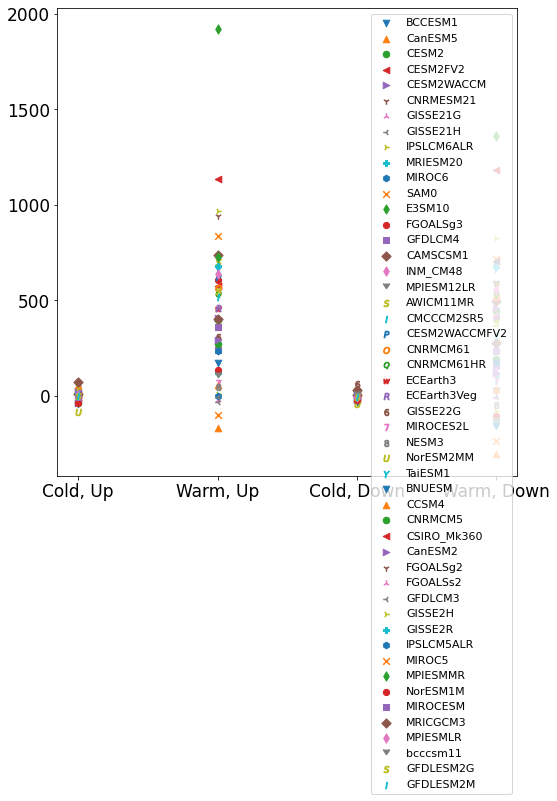

In [18]:
# coefs: 4 lrm
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2  = plt.subplots(1, 1, figsize =(8.24, 8.6))  # (16.2, 9.3))


b = "4 LRM"
x_15yr = linspace(0.0005, 0.018, 50) *1000.  #..15 yr
y_15yr = x_15yr
x   = linspace(0.002, 0.034, 50) *1000.   # for all 150yr
y   = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D', 'd', 7, 
     '$S$', '$I$', '$P$', '$O$', '$Q$', '$W$', '$R$', '$6$', '$7$', '$8$', '$U$', '$Y$', 
              'v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D', 'd', 7, 
     '$S$', '$I$']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:

stcoef_albedo1 = []

stcoef_sst11 = []
stcoef_sst12 = []
stcoef_sst13 = []
stcoef_sst14 = []

stcoef_qcon11 = []
stcoef_qcon12 = []
stcoef_qcon13 = []
stcoef_qcon14 = []

stcoef_stabil11 = []
stcoef_stabil12 = []
stcoef_stabil13 = []
stcoef_stabil14 = []

stcoef_sub50011 = []
stcoef_sub50012 = []
stcoef_sub50013 = []
stcoef_sub50014 = []
print(output_4lrm_coef_LWP[deck_nas2[9]])

for i in arange(len(deck_nas2)):
    
    stcoef_albedo1.append(output_4lrm_coef_albedo[deck_nas2[i]][0])

    stcoef_sst11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][0])
    stcoef_sst12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][0])
    stcoef_sst13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][0])
    stcoef_sst14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][0])

    stcoef_qcon11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][1])
    stcoef_qcon12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][1])
    stcoef_qcon13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][1])
    stcoef_qcon14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][1])

    stcoef_stabil11.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][2])
    stcoef_stabil12.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][2])
    stcoef_stabil13.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][2])
    stcoef_stabil14.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][2])

    stcoef_sub50011.append(output_4lrm_coef_LWP[deck_nas2[i]][0][0][3])
    stcoef_sub50012.append(output_4lrm_coef_LWP[deck_nas2[i]][1][0][3])
    stcoef_sub50013.append(output_4lrm_coef_LWP[deck_nas2[i]][2][0][3])
    stcoef_sub50014.append(output_4lrm_coef_LWP[deck_nas2[i]][3][0][3])

stcoef_albedo1 = asarray(stcoef_albedo1) * 100.

stcoef_sst11 = asarray(stcoef_sst11) * 1000.
stcoef_sst12 = asarray(stcoef_sst12) * 1000.
stcoef_sst13 = asarray(stcoef_sst13) * 1000.
stcoef_sst14 = asarray(stcoef_sst14) * 1000.

stcoef_qcon11 = asarray(stcoef_qcon11) * 1000.
stcoef_qcon12 = asarray(stcoef_qcon12) * 1000.
stcoef_qcon13 = asarray(stcoef_qcon13) * 1000.
stcoef_qcon14 = asarray(stcoef_qcon14) * 1000.
print(stcoef_qcon12)

stcoef_stabil11 = asarray(stcoef_stabil11) * 1000.
stcoef_stabil12 = asarray(stcoef_stabil12) * 1000.
stcoef_stabil13 = asarray(stcoef_stabil13) * 1000.
stcoef_stabil14 = asarray(stcoef_stabil14) * 1000.

stcoef_sub50011 = asarray(stcoef_sub50011) * 1000.
stcoef_sub50012 = asarray(stcoef_sub50012) * 1000.
stcoef_sub50013 = asarray(stcoef_sub50013) * 1000.
stcoef_sub50014 = asarray(stcoef_sub50014) * 1000.

# d1 = {'col1': arange(0, 50), 'value': stcoef_albedo1.ravel(), 'Regimes': array(['All REGIME avg']*50)}
# data1  = pd.DataFrame(data=d1, index=arange(0, 50*1))

# print(asarray([stcoef2, stcoef1]).reshape(2, 30))

for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2, 3, 4], [stcoef_stabil11[j], stcoef_stabil12[j], stcoef_stabil13[j], stcoef_stabil14[j]], marker = deck_marker[j], label = deck_nas2[j], s= 43)
plt.xticks([1,2, 3, 4], ['Cold, Up', 'Warm, Up', 'Cold, Down', 'Warm, Down'])
plt.legend()
# plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_4lrm_Jandalbedodlwp", dpi = 250)

## Box plot

In [16]:
## PLot 3: coefficient plot for 0k(1-LRM) OR 2-lrm

# calc data (monthly) standard deviation:

sigma1 = full((len(deck2), 4), 0.0)
sigma2 = full((len(deck2), 4), 0.0)

coef1 =  []
coef2 =  []
stcoef1 = full((len(deck2), 4), 0)
stcoef2 = full((len(deck2), 4), 0)
itcp1 =  []
itcp2 =  []

dX_dTg1  = full((len(deck2), 4), 0.000)
dX_dTg2  = full((len(deck2), 4), 0.000)

dX_dTg_modelresponse = full(len(deck2), 0.000)
f5yr_index = [0*12*730, 5*12*730]
l5yr_index = [145*12*730+1, 150*12*730]

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_' +'*' +'_dats.npz')
    if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
        folder_best2lrm = folder_2lrm[1]
    else:
        folder_best2lrm = folder_2lrm[0]
    print(folder_best2lrm)
    
    index_st_sst = str(folder_best2lrm).index('fit') +4
    index_ed_sst = str(folder_best2lrm).index('_dats')
    print(list(folder_best2lrm)[index_st_sst], list(folder_best2lrm)[index_ed_sst])
    
    TR_sst = float(str(folder_best2lrm)[index_st_sst:index_ed_sst])
    print('TR_sst =', TR_sst)
    # TR_sub = 0.0
    '''
    
    # start calculating SD of CCFs on monthly scale:

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)
    

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])])

    sigma2[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    
    
    # Calc the Change of Standard deviation of CCFs in each regime with/ to the per degree change of air temperature changes
    # print(sigma1[i,:].shape)
    
    
    delta_LWP_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LWP'][f5yr_index[0]:f5yr_index[1]])
    
    delta_SST_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SST'][f5yr_index[0]:f5yr_index[1]])
    delta_p_e_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['p_e'][f5yr_index[0]:f5yr_index[1]])
    delta_LTS_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['LTS'][f5yr_index[0]:f5yr_index[1]])
    delta_SUB_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][l5yr_index[0]:l5yr_index[1]]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['SUB'][f5yr_index[0]:f5yr_index[1]])
    
    delta_gmt_l5_f5  = nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][l5yr_index[0]:l5yr_index[1]:730]) - nanmean(output_2lrm_flavra_abr[deck_nas2[i]]['gmt'][f5yr_index[0]:f5yr_index[1]:730])
    # print(delta_SST_l5_f5, delta_gmt_l5_f5)
    
    dX_dTg1[i,:]   =  array([delta_SST_l5_f5/delta_gmt_l5_f5, delta_p_e_l5_f5/delta_gmt_l5_f5, 
                            delta_LTS_l5_f5/delta_gmt_l5_f5, delta_SUB_l5_f5/delta_gmt_l5_f5]).flatten() /sigma1[i,:]
    
    # dX_dTg2[i,:]  =  
    
    
    # Calc the True model response of CLOUD LWP changes with/ to change of air temperature changes
    dX_dTg_modelresponse[i]  = 1000.*  delta_LWP_l5_f5 / delta_gmt_l5_f5


# print(dX_dTg1.shape, dX_dTg1)

## switch 'nan' points to 0
ind_sg1 = isnan(sigma2)== True
ind_sgtrue = nonzero(ind_sg1==True)
sigma2[ind_sgtrue] = 0.0
# print(sigma1, sigma2)


# Retrieved the 1/2-lrm coefficients:

for j in range(len(deck2)):
    a_le  = output_LRM_le[deck_nas2[j]][0].copy()
    a_lt  = output_LRM_lt[deck_nas2[j]][0].copy()
    
    a0_le = output_LRM_le[deck_nas2[j]][1]
    a0_lt = output_LRM_lt[deck_nas2[j]][1]
    
    coef1.append(array(a_le))
    coef2.append(array(a_lt))
    itcp1.append(array(a0_le))
    itcp2.append(array(a0_lt))
    
print(array(coef1), array(coef2), array(itcp1))

# product of monthly variations and coefficients
stcoef1 = ( 1000. * array(coef1))  * sigma1[i,:] 
stcoef2 = ( 1000. * array(coef2))  * sigma2[i,:] 
#print(stcoef2.shape, stcoef1)



# #Test d(SST)_d(gmt)
# regr2 = linear_model.LinearRegression()
# # re_SST = regr2.fit(output_2lrm_flavra_abr[deck_nas2[0]]['gmt'].reshape(-1,1), output_2lrm_flavra_abr[deck_nas2[0]]['SST'])
# re_SST = regr2.fit(gmt_per10yr.reshape(-1,1), sst_per10yr)
# print(re_SST.intercept_, re_SST.coef_)


# Calc the CCF- Driven Change in Low Cloud LWP:
##.. Per Cloud Properties(lwp) changes to per degree change of air temperature changes for each Cloud Controling Factors: 
dC_dg_Cs =  stcoef1 * dX_dTg1

dC_dg_Cs_sum  = sum(dC_dg_Cs, axis = 1)

# print(dC_dg_Cs, dC_dg_Cs_sum)


CC_ccfdriven = append(dC_dg_Cs_sum.reshape(-1,1), dC_dg_Cs, axis =1)
# print(CC_ccfdriven)
# print(dX_dTg_modelresponse)

CC_ccfdriven_withtruemodel  = append(dX_dTg_modelresponse.reshape(-1, 1), CC_ccfdriven, axis=1)
# print(CC_ccfdriven_withtruemodel[:,:2], sum((CC_ccfdriven_withtruemodel[:,0] - nanmean(CC_ccfdriven_withtruemodel[:,0]))**2) /18.)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[[ 2.37869544e-03  4.55390993e-02 -1.16072581e-03  8.12036901e-02]
 [ 1.58170067e-03  1.56069538e-02 -6.09283028e-04  3.32025522e-01]
 [ 2.47831802e-03  1.10754505e-02 -3.64025957e-04  1.82281643e-01]
 [ 2.17016405e-03  9.26951549e-03  6.79100862e-06  2.52433709e-01]
 [ 2.47129850e-03  1.10215750e-02 -3.41560476e-04  1.89853173e-01]
 [ 1.11396849e-03  1.22503763e-02  1.78066239e-04  1.96797846e-01]
 [ 2.06429065e-03  3.30420044e-02  5.32799196e-04 -4.99667571e-02]
 [ 2.09684390e-03  3.18582868e-02  9.25242821e-04 -8.41494952e-02]
 [ 2.27198240e-03  1.84610488e-02 -9.62166505e-04  2.05959206e-01]
 [ 2.31556117e-03  2.69833941e-02  1.13371918e-04  1.57887695e-01]
 [ 3.88325351e-03  4.25354358e-02  3.32612906e-04  4.60245841e-01]
 [ 1.07629404e-03  6.16173315e-03  5.86881373e-04  2.98022877e-01]
 [ 1.34420072e-03  1.20536151e-02  1.52319105e-05  5.11894149e-02]
 [ 2.18991795e-03  1.07119511e-02  3.06750193e-04  3.59495827e-02]
 [ 1.54855165e-03  1.34949077e-02  3.13790456e-05  2.57031690e

In [15]:
# calc annually data standard Deviation for 1/2-lrm:

sigma1_yr = full((len(deck2), 4), 0.0)
sigma2_yr = full((len(deck2), 4), 0.0)


stcoef1_yr = full((len(deck2), 4), 0)
stcoef2_yr = full((len(deck2), 4), 0)

# print(output_2lrm_yr_bin_abr[deck_nas2[1]])

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test3)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4

    index_ed_sst = folder_4lrm[0].index('K')
    print(list(folder_4lrm[0])[index_st_sst +4], list(folder_4lrm[0])[index_ed_sst])
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')

    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))

    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0     # only for 1-lrm
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] <  TR_sst)
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind7]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind7])])

    sigma2_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind8]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind8])])


## switch 'nan' points to 0
ind_sg1_yr = isnan(sigma2_yr)== True
ind_sgtrue_yr = nonzero(ind_sg1_yr==True)
sigma2_yr[ind_sgtrue_yr] = 0.0

# print(sigma1_yr, sigma2_yr)

# product of interannual variations and coefficients
stcoef1_yr = (1000.*array(coef1)) * sigma1_yr[i,:]
stcoef2_yr = (1000.*array(coef2)) * sigma2_yr[i,:]

# print(stcoef1_yr.shape, stcoef1_yr)

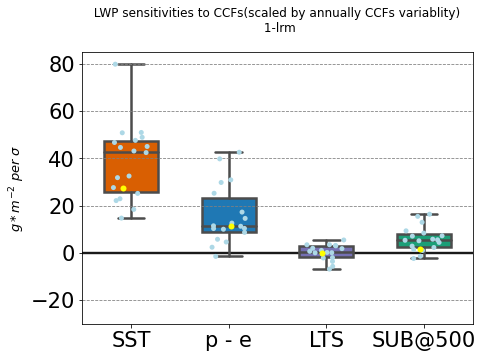

In [13]:
## PLot 3: seaborn coefficience plot for 1-lrm:
fig = plt.figure(figsize = (7, 5))
ax  = fig.add_subplot(111)

parameters = {'axes.labelsize': 23, 'legend.fontsize': 13,
          'axes.titlesize': 12, 'xtick.labelsize':17, 'ytick.labelsize':17}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*4), 'value': stcoef1.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*4))

d2 = {'col1': arange(0, 18*4), 'value': stcoef2.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

d_specGCM = {'col1': arange(0, 4), 'value': stcoef1[12,:].ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500'])}
# sns.boxplot(data=[d for d in stcoef1.T])

# plot1 = sns.boxplot(data=[f for f in stcoef1.T])
# sns.boxplot(data=[[stcoef1[:,0], stcoef1[:,1], stcoef1[:,2], stcoef1[:,3]], ['dLWP/d(SST)', 'dLWP/d(p-e)','dLWP/d(LTS)', 'dLWP/d(SUB)']])
# plot2 = sns.boxplot(data=[y for y in stcoef1_yr.T])


sns.set_theme(style="whitegrid")
bplot = sns.boxplot(x='CCFs', y='value', data=d1, width = 0.55, linewidth = 2.5, whis =2.0)
stplot = sns.stripplot(x='CCFs',  y ='value', data=d1, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM = sns.stripplot(x='CCFs', y='value', data = d_specGCM, color='yellow', size = 6)
# print(d1, d2)
# print(stcoef1)
# Plot setting
plt.ylim(-30., 85.)
ax.axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax.axhline(-20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(40., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(60., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(80., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_ylabel(r"$ g*m^{-2}\ per\ \sigma $", fontsize = 13)

at = ax.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[CCFs[i]])

# tips = sns.load_dataset("tips")

# print(tips)

# plt.savefig("plot3_1lrm_Coefficients(monthly)", dpi= 500)



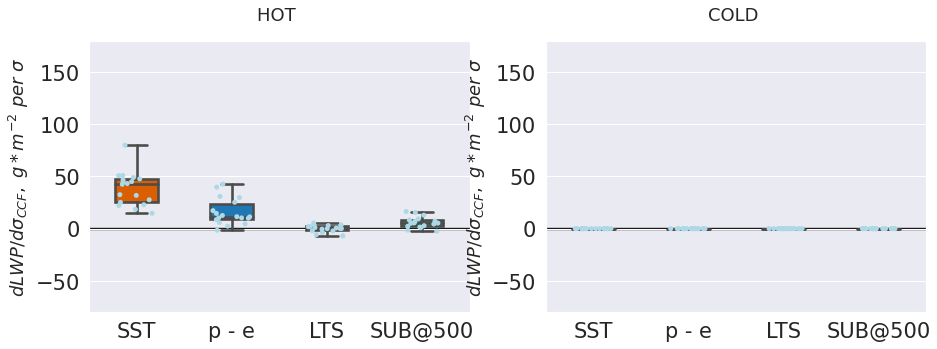

In [85]:
## PLot3: 2-lrm best fit Coefficients plot

fig3, ax3 =  plt.subplots(1,2, figsize = (15, 5))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 11, 'xtick.labelsize':15, 'ytick.labelsize':16}
plt.rcParams.update(parameters)

# Data Frame:

d01 = {"col1": arange(0, 18*4), "value": stcoef1.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d01, index=arange(0, 18*4))

d02 = {"col1": arange(0, 18*4), "value": stcoef2.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d02, index=arange(0, 18*4))


bplot1 = sns.boxplot(ax=ax3[0], x ="CCFs", y="value", data=d01, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax3[0], x="CCFs", y ="value", data=d01, color="lightblue", jitter=0.2,size = 5)
ax3[0].set_title("HOT ", loc = 'center', fontsize = 18, pad =20)
ax3[0].set_ylim(-80., 180.)

bplot2 = sns.boxplot(ax=ax3[1], x ="CCFs", y="value", data=d02, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax3[1], x="CCFs", y ="value", data=d02,  color="lightblue", jitter=0.2,size = 5)
ax3[1].set_title("COLD ", loc = 'center', fontsize = 18, pad =20)
ax3[1].set_ylim(-80., 180.)


# Plot setting
ax3[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax3[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)

ax3[0].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
# ax3[0].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax3[1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
# ax3[1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)

# at = ax3.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])


# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox1 = bplot1.artists[i]
    mybox1.set_facecolor(color_dict[CCFs[i]])
    
    mybox2 = bplot2.artists[i]
    mybox2.set_facecolor(color_dict[CCFs[i]])

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
# plt.savefig("plot3_bestfit5_Coefficients( Annually)", dpi= 5

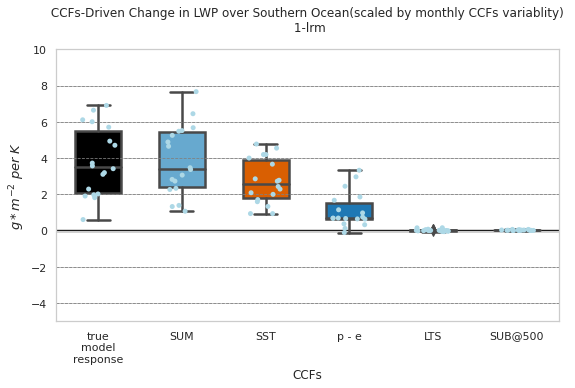

In [24]:
## PLot 3_Alternate: seaborn ccf-driven cloud LWP changes_plot for 1-lrm:
fig = plt.figure(figsize = (9, 5))
ax  = fig.add_subplot(111)

parameters = {'axes.labelsize': 23, 'legend.fontsize': 13,
          'axes.titlesize': 12, 'xtick.labelsize':17, 'ytick.labelsize':17}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*6), 'value': CC_ccfdriven_withtruemodel.ravel(), 'CCFs': array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*6))

# d2 = {'col1': arange(0, 18*5), 'value': .ravel(), 'CCFs': array(['SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
# data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

# sns.boxplot(data=[d for d in stcoef1.T])

# plot1 = sns.boxplot(data=[f for f in stcoef1.T])
# sns.boxplot(data=[[stcoef1[:,0], stcoef1[:,1], stcoef1[:,2], stcoef1[:,3]], ['dLWP/d(SST)', 'dLWP/d(p-e)','dLWP/d(LTS)', 'dLWP/d(SUB)']])
# plot2 = sns.boxplot(data=[y for y in stcoef1_yr.T])


bplot = sns.boxplot(x='CCFs', y='value', data=data1, whis =2.0, width = 0.55, linewidth = 2.5)
stplot = sns.stripplot(x='CCFs',  y ='value', data=data1, color="lightblue", jitter=0.2, size = 5)
sns.set_theme(style="darkgrid")

plt.ylim(-5., 10.)
ax.axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax.axhline(-2., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(2., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(-4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(4.0, c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(10., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(6., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(8., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_ylabel(r"$ g*m^{-2}\ per\ K $", fontsize = 13)

at = ax.set_title(" CCFs-Driven Change in LWP over Southern Ocean(scaled by monthly CCFs variablity) \n 1-lrm", pad = 18)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["black", "#67a9cf", "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0 ,5):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[CCFs[i]])

# tips = sns.load_dataset("tips")
# print(tips)

# plt.savefig("plot3_1lrm_CCFs-Driven_LWPchanges(monthly)", dpi= 500)


# 

NameError: name 'stcoef3_withtruemodel' is not defined

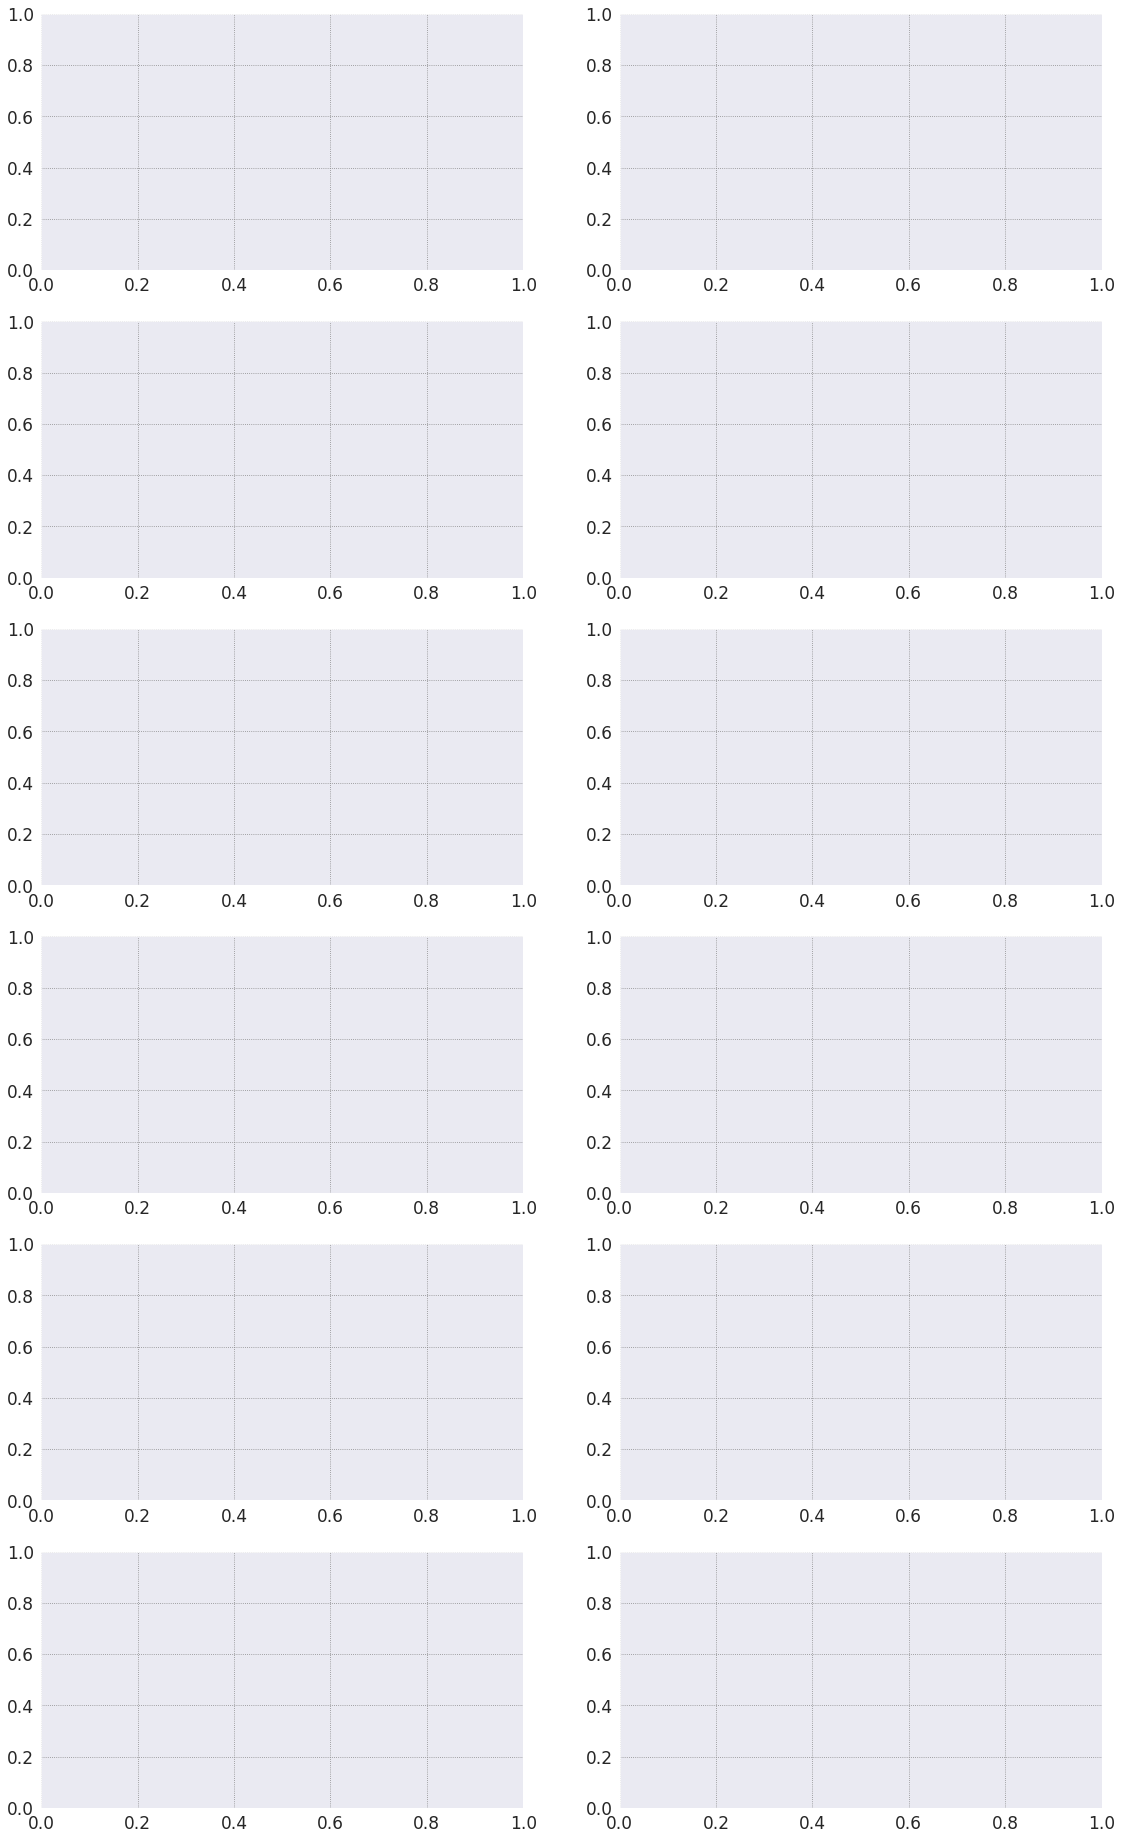

In [13]:
1## PLot3(AsZelinkaplot): Coefficient plot + Temperature-mediated CCFS change + CCF-Drivens CLoud changes for best 4-lrm:

fig72, ax72 = plt.subplots(6, 2, figsize = (19, 33))

parameters = {'axes.labelsize': 16, 'legend.fontsize': 13,
          'axes.titlesize': 14, 'xtick.labelsize':14, 'ytick.labelsize':14}
plt.rcParams.update(parameters)

# Data Frame:

d1 = {'col1': arange(0, 18*6), 'value': stcoef3_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data1  = pd.DataFrame(data=d1, index=arange(0, 18*6))
d_specGCM1 = {'col1': arange(0, 4), 'value': stcoef3_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d2 = {'col1': arange(0, 18*6), 'value': stcoef4_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*6))
d_specGCM2 = {'col1': arange(0, 4), 'value': stcoef4_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d3 = {'col1': arange(0, 18*6), 'value': stcoef5_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data3  = pd.DataFrame(data=d3, index=arange(0, 18*6))
d_specGCM3 = {'col1': arange(0, 4), 'value': stcoef5_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d4 = {'col1': arange(0, 18*6), 'value': stcoef6_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data4  = pd.DataFrame(data=d4, index=arange(0, 18*6))
d_specGCM4 = {'col1': arange(0, 4), 'value': stcoef6_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}


d5 = {'col1': arange(0, 18*6), 'value': dX_dTg1_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data5  = pd.DataFrame(data=d5, index=arange(0, 18*6))
d_specGCM5 = {'col1': arange(0, 4), 'value': dX_dTg1_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d6 = {'col1': arange(0, 18*6), 'value': dX_dTg2_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data6  = pd.DataFrame(data=d6, index=arange(0, 18*6))
d_specGCM6 = {'col1': arange(0, 4), 'value': dX_dTg2_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d7 = {'col1': arange(0, 18*6), 'value': dX_dTg3_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data7  = pd.DataFrame(data=d7, index=arange(0, 18*6))
d_specGCM7 = {'col1': arange(0, 4), 'value': dX_dTg3_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d8 = {'col1': arange(0, 18*6), 'value': dX_dTg4_withtruemodel.ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data8  = pd.DataFrame(data=d8, index=arange(0, 18*6))
d_specGCM8 = {'col1': arange(0, 4), 'value': dX_dTg4_withtruemodel[2,:].ravel(), 'CCFs': array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}


d9 = {'col1': arange(0, 18*6), 'value': CC_ccfdriven_withtruemodel1.ravel(), 'CCFs': array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data9  = pd.DataFrame(data=d9, index=arange(0, 18*6))
d_specGCM9 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel1[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d10 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel2.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data10  = pd.DataFrame(data=d10, index=arange(0, 18*6))
d_specGCM10 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel2[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d11 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel3.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data11  = pd.DataFrame(data=d11, index=arange(0, 18*6))
d_specGCM11 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel3[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}
d12 = {"col1": arange(0, 18*6), "value": CC_ccfdriven_withtruemodel4.ravel(), "CCFs": array(['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']*18)}
data12  = pd.DataFrame(data=d12, index=arange(0, 18*6))
d_specGCM12 = {'col1': arange(0, 4), 'value': CC_ccfdriven_withtruemodel4[2,:].ravel(), 'CCFs':array([' '*8, ' '*4, 'SST', 'p - e', 'LTS', 'SUB@500'])}

#Coefficient plot
bplot1 = sns.boxplot(ax=ax72[0,1], x ="CCFs", y="value", data= d1, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax72[0,1], x="CCFs", y ="value", data= d1, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM1 = sns.stripplot(ax=ax72[0,1], x="CCFs", y ="value", data= d_specGCM1, color="yellow", jitter=0.2, size =8)
ax72[0,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad =12)
ax72[0,1].set_ylim([-25, 65])

bplot2 = sns.boxplot(ax=ax72[0,0], x ="CCFs", y="value", data =d2, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax72[0,0], x="CCFs", y ="value", data =d2,  color="lightblue", jitter=0.2,size = 5)
stplot_specGCM1 = sns.stripplot(ax=ax72[0,0], x="CCFs", y ="value", data= d_specGCM2, color="yellow", jitter=0.2, size =8)
ax72[0,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad =12)
ax72[0,0].text(-0.29, 83., "(A) Cloud LWP Sensitivities with SD_CCFs ", fontsize = 16, horizontalalignment = 'left')
ax72[0,0].set_ylim([-25, 65])

bplot3 = sns.boxplot(ax=ax72[1,1], x ="CCFs", y="value", data= d3, width = 0.45, linewidth = 2.6, whis =2.0)
stplot3 = sns.stripplot(ax=ax72[1,1], x="CCFs", y ="value", data= d3, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM3 = sns.stripplot(ax=ax72[1,1], x="CCFs", y ="value", data= d_specGCM3, color="yellow", jitter=0.2, size =8)
ax72[1,1].set_ylim([-25, 65])

bplot4 = sns.boxplot(ax=ax72[1,0], x ="CCFs", y="value", data= d4, width = 0.45, linewidth = 2.6, whis =2.0)
stplot4 = sns.stripplot(ax=ax72[1,0], x="CCFs", y ="value", data= d4, color="lightblue",jitter=0.2, size = 5)
stplot_specGCM4 = sns.stripplot(ax=ax72[1,0], x="CCFs", y ="value", data= d_specGCM4, color="yellow", jitter=0.2, size =8)
ax72[1,0].set_ylim([-25, 65])


#Temperature-mediated CCFS changes

bplot5 = sns.boxplot(ax=ax72[2,1], x ="CCFs", y="value", data= d5, width = 0.45, linewidth = 2.6, whis =2.0)
stplot5 = sns.stripplot(ax=ax72[2,1], x="CCFs", y ="value", data= d5, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM5 = sns.stripplot(ax=ax72[2,1], x="CCFs", y ="value", data= d_specGCM5, color="yellow", jitter=0.2, size =8)
ax72[2,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax72[2,1].set_ylim([-0.15, 0.28])

bplot6 = sns.boxplot(ax=ax72[2,0], x ="CCFs", y="value", data= d6, width = 0.45, linewidth = 2.6, whis =2.0)
stplot6 = sns.stripplot(ax=ax72[2,0], x="CCFs", y ="value", data= d6, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM6 = sns.stripplot(ax=ax72[2,0], x="CCFs", y ="value", data= d_specGCM6, color="yellow", jitter=0.2, size =8)
ax72[2,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad =12)
ax72[2,0].text(-0.29, 0.36, "(B) Temperature-mediated CCFs Change ", fontsize = 16, horizontalalignment = 'left')
ax72[2,0].set_ylim([-0.15, 0.28])

bplot7 = sns.boxplot(ax=ax72[3,1], x ="CCFs", y="value", data = d7, width = 0.45, linewidth = 2.6, whis =2.0)
stplot7 = sns.stripplot(ax=ax72[3,1], x="CCFs", y ="value", data = d7, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM7 = sns.stripplot(ax=ax72[3,1], x="CCFs", y ="value", data= d_specGCM7, color="yellow", jitter=0.2, size =8)
ax72[3,1].set_ylim([-0.15, 0.28])

bplot8 = sns.boxplot(ax=ax72[3,0], x ="CCFs", y="value", data= d8, width = 0.45, linewidth = 2.6, whis =2.0)
stplot8 = sns.stripplot(ax=ax72[3,0], x="CCFs", y ="value", data= d8, color="lightblue",jitter=0.2,size = 5)
stplot_specGCM8 = sns.stripplot(ax=ax72[3,0], x="CCFs", y ="value", data= d_specGCM8, color="yellow", jitter=0.2, size =8)
ax72[3,0].set_ylim([-0.15, 0.28])

#CCF-Driven CLoud changes
bplot9 = sns.boxplot(ax=ax72[4,1], x ="CCFs", y="value", data= d9, width = 0.45, linewidth = 2.6, whis =2.0)
stplot9 = sns.stripplot(ax=ax72[4,1], x="CCFs", y ="value", data= d9, color="lightblue", jitter=0.2,size = 5)
stplot_specGCM9 = sns.stripplot(ax = ax72[4,1], x="CCFs", y ="value", data=d_specGCM9, color="yellow", jitter=0.2, size =8)  ## 
ax72[4,1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax72[4,1].set_ylim([-7.5, 12.57])
R2_Totalccfsdriven_LWP1 =  r2_score(CC_ccfdriven_withtruemodel1[:, 0], CC_ccfdriven_withtruemodel1[:, 1])
r_Totalccfsdriven_LWP1, p_value1 = pearsonr(CC_ccfdriven_withtruemodel1[:, 1], CC_ccfdriven_withtruemodel1[:, 0]) 
ax72[4,1].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP1, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.08, 0.82), fontsize =14)


bplot10 = sns.boxplot(ax=ax72[4,0], x ="CCFs", y="value", data= d10, width = 0.45, linewidth = 2.6, whis =2.0)
stplot10 = sns.stripplot(ax=ax72[4,0], x="CCFs", y ="value", data= d10,  color="lightblue", jitter=0.2, size = 5)
stplot_specGCM10 = sns.stripplot(ax = ax72[4,0], x="CCFs", y ="value", data=d_specGCM10, color="yellow", jitter=0.2, size =7)
ax72[4,0].set_title(" Hot ", loc = 'center', fontsize = 18, pad = 12)
ax72[4,0].text(-0.29, 15.2,  "(C) CCFs-Driven LWP Changes over SO \n    (sclaed by monthly SD_CCFs) ", fontsize =16, horizontalalignment = 'left')
ax72[4,0].set_ylim([-7.5, 12.5])
R2_Totalccfsdriven_LWP2 =  r2_score(CC_ccfdriven_withtruemodel2[:, 0], CC_ccfdriven_withtruemodel2[:, 1])
r_Totalccfsdriven_LWP2, p_value2 = pearsonr(CC_ccfdriven_withtruemodel2[:, 1], CC_ccfdriven_withtruemodel2[:, 0]) 
ax72[4,0].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP2, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.10, 0.78), fontsize =14)


bplot11 = sns.boxplot(ax=ax72[5,1], x ="CCFs", y="value", data= d11, width = 0.45, linewidth = 2.6, whis =2.0)
stplot11 = sns.stripplot(ax=ax72[5,1], x="CCFs", y ="value", data= d11, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM11 = sns.stripplot(ax = ax72[5,1], x="CCFs", y ="value", data=d_specGCM11, color="yellow", jitter=0.2, size =7)
ax72[5,1].set_ylim([-7.5, 12.51])
R2_Totalccfsdriven_LWP3 =  r2_score(CC_ccfdriven_withtruemodel3[:, 0], CC_ccfdriven_withtruemodel3[:, 1])
r_Totalccfsdriven_LWP3, p_value3 = pearsonr(CC_ccfdriven_withtruemodel3[:, 1], CC_ccfdriven_withtruemodel3[:, 0]) 
ax72[5,1].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP3, xy=(0.45, 2.16), textcoords = 'axes fraction', xytext=(0.10, 0.78), fontsize =14)

bplot12 = sns.boxplot(ax=ax72[5,0], x ="CCFs", y="value", data= d12, width = 0.45, linewidth = 2.6, whis =2.0)
stplot12 = sns.stripplot(ax=ax72[5,0], x="CCFs", y ="value", data= d12, color="lightblue",jitter=0.2,size = 5)
stplot_specGCM12 = sns.stripplot(ax = ax72[5,0], x="CCFs", y ="value", data=d_specGCM12, color="yellow", jitter=0.2, size =7)
ax72[5,0].set_ylim([-7.5, 12.5])
R2_Totalccfsdriven_LWP4 =  r2_score(CC_ccfdriven_withtruemodel4[:, 0], CC_ccfdriven_withtruemodel4[:, 1])
r_Totalccfsdriven_LWP4, p_value4 = pearsonr(CC_ccfdriven_withtruemodel4[:, 1], CC_ccfdriven_withtruemodel4[:, 0]) 
ax72[5,0].annotate(r"$r\ =\ %4f$"%r_Totalccfsdriven_LWP4, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.10, 0.82), fontsize =14)

print(p_value1, p_value2, p_value3, p_value4)

# Plot setting
ax72[0,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[0,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[1,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[1,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[2,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[2,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[3,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[3,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[4,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[4,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[5,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)
ax72[5,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.5, zorder=0)

ax72[4,0].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[4,1].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[5,0].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax72[5,1].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)

ax72[0,0].set_ylabel("Up \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax72[1,0].set_ylabel("Down \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
# ax72[0,1].set_ylabel(r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
# ax72[1,1].set_ylabel(r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax72[2,0].set_ylabel("Up \n" + r"$\ \sigma\ per\ K $", fontsize = 17)
ax72[3,0].set_ylabel("Down \n" + r"$\ \sigma\ per\ K $", fontsize = 17)
# ax72[2,1].set_ylabel(r"$\ \sigma\ per\ K $", fontsize = 17)
# ax72[3,1].set_ylabel(r"$\ \sigma\ per\ K $", fontsize = 17)
ax72[4,0].set_ylabel("Up \n" + r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
ax72[5,0].set_ylabel("Down \n" + r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
# ax72[4,1].set_ylabel(r"$\ g*m^{-2}\ per\ K $", fontsize = 17)
# ax72[5,1].set_ylabel(r"$\ g*m^{-2}\ per\ K $", fontsize = 17)





# Hex code for each CCF's color
CCFs = ['true\nmodel\nresponse', 'SUM', 'SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["black", "#67a9cf", "#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

CCFs2 = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors2 = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict =  dict(zip(CCFs, CCFs_colors))
color_dict2 = dict(zip(CCFs2, CCFs_colors2))

for i in range(0, 6):
    if i < 4:
        mybox1 = bplot1.artists[i]
        mybox1.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox2 = bplot2.artists[i]
        mybox2.set_facecolor(color_dict2[CCFs2[i]])
        mybox3 = bplot3.artists[i]
        mybox3.set_facecolor(color_dict2[CCFs2[i]])
        mybox4 = bplot4.artists[i]
        mybox4.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox5 = bplot5.artists[i]
        mybox5.set_facecolor(color_dict2[CCFs2[i]])
        
        mybox6 = bplot6.artists[i]
        mybox6.set_facecolor(color_dict2[CCFs2[i]])
        mybox7 = bplot7.artists[i]
        mybox7.set_facecolor(color_dict2[CCFs2[i]])
        mybox8 = bplot8.artists[i]
        mybox8.set_facecolor(color_dict2[CCFs2[i]])
    
    
    mybox9 = bplot9.artists[i]
    mybox9.set_facecolor(color_dict[CCFs[i]] )
    mybox10 = bplot10.artists[i]
    mybox10.set_facecolor(color_dict[CCFs[i]])
    mybox11 = bplot11.artists[i]
    mybox11.set_facecolor(color_dict[CCFs[i]])
    mybox12 = bplot12.artists[i]
    mybox12.set_facecolor(color_dict[CCFs[i]])
    

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# set the spacing between subplots and plot 
plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.78, wspace = 0.14, hspace = 0.470)

# plt.savefig("plot7_bestfit5_CCFsDrivenLWPchanges_(monthly)", dpi = 500)

# plt.subplot_tool()
# plt.show()
# plt.clf()

# plt.savefig("plotCESM2_Best4lrm_asZelinkaPLot(monthly, r)", dpi= 100)
# plt.savefig("plot7_bestfit6", dpi = 500)

## SZA 

NameError: name 'SZA_PI' is not defined

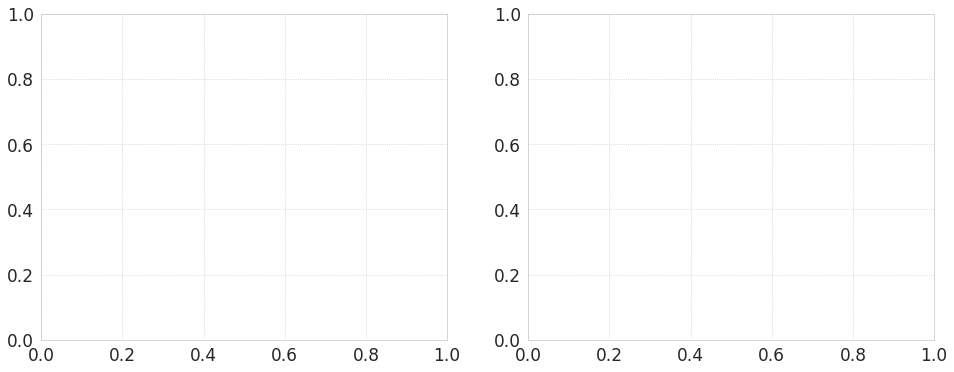

In [24]:
# plt.figure(figsize = (12, 9))

parameters = {'axes.labelsize': 14, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig7, ax7  = plt.subplots(1, 2, figsize =(16, 6.))  # (16.2, 9.3))

x1 = SZA_PI.flatten()
y1 = LWP_PI.flatten()
z1 = albedo_PI.flatten()
print(x1.shape, y1.shape)
x2 = SZA_abr.flatten()
z2 = albedo_abr.flatten()

# PI
S_binned_PI, xedge_PI, yedge_PI, binnumber_1 = binned_statistic_2d(x1, y1, values = z1, statistic ='mean', bins=[17, 17], expand_binnumbers =True)

# abrupt-4x
S_binned_abr, xedge_abr, yedge_abr, binnumber_2 = binned_statistic_2d(x2, y2, values = z2, statistic ='mean', bins=[17, 17], expand_binnumbers =True)

CP1 = ax7[0].contour(xedge_PI[:-1], yedge_PI[:-1], S_binned_PI)
ax7[0].clabel(CP1, inline=1, fontsize=10)
ax7[0].set_xlabel("Solar zenith angle (in degree)")
ax7[0].set_ylabel("Liquid water path (g)")
ax7[0].set_title("(a): Albedo: piControl")

CP2 = ax7[1].contour(xedge_abr[:-1], yedge_abr[:-1], S_binned_abr)
ax7[1].clabel(CP2, inline=1, fontsize=10)
ax7[1].set_xlabel("Solar zenith angle (in degree)")
ax7[1].set_ylabel("Liquid water path (g)")
ax7[1].set_title("(b): Albedo: abrupt-4xCO2")


ax7[0].set_yscale('log')
ax7[1].set_yscale('log')

In [48]:
output_2lrm_flavra_PI = {}
output_2lrm_flavra_abr = {}

output_ind_Cold_PI[deck_nas2[i]]
output_ind_Hot_PI[deck_nas2[i]]

# the predicted albedo when only consider the "LWP" changes, 
output_rsuta1_PI = {}
output_rsuta1_abr = {}

# flatten array of predicted LWP
output_flatten_predi_PI = {}
output_flatten_predi_abr = {}

output_flatten_predi_PI[deck_nas2[i]+'2lrm_Jan'] = output_intermedia[deck_nas2[i]+'2lrm_Jan'][()]['LWP_predi_bin_PI'].flatten()
output_flatten_predi_abr[deck_nas2[i]+'2lrm_Jan'] = output_intermedia[deck_nas2[i]+'2lrm_Jan'][()]['LWP_predi_bin_abr'].flatten()
M_PI = output_flatten_predi_PI[deck_nas2[i]+'2lrm_Jan'] * 1.
M_abr = output_flatten_predi_abr[deck_nas2[i]+'2lrm_Jan'] * 1.
M_PI[logical_not(logical_or(output_ind_Cold_PI[deck_nas2[i]], output_ind_Hot_PI[deck_nas2[i]]))] = nan
M_abr[logical_not(logical_or(output_ind_Cold_abr[deck_nas2[i]], output_ind_Hot_abr[deck_nas2[i]]))] = nan

for regime in range(2):
    if regime == 0: # Cold
        M_PI[output_ind_Cold_PI[deck_nas2[i]]] = M_PI[output_ind_Cold_PI[deck_nas2[i]]] * output_coef_albedo[deck_nas2[i]+'2lrm_Jan'][0][0][0]
        M_abr[output_ind_Cold_abr[deck_nas2[i]]] = M_abr[output_ind_Cold_abr[deck_nas2[i]]] * output_coef_albedo[deck_nas2[i]+'2lrm_Jan'][0][0][0]

    else: # Hot
        M_PI[output_ind_Hot_PI[deck_nas2[i]]] = M_PI[output_ind_Hot_PI[deck_nas2[i]]] * output_coef_albedo[deck_nas2[i]+'2lrm_Jan'][1][0][0]
        M_abr[output_ind_Hot_abr[deck_nas2[i]]] = M_abr[output_ind_Hot_abr[deck_nas2[i]]] * output_coef_albedo[deck_nas2[i]+'2lrm_Jan'][1][0][0]

output_rsuta1_PI[deck_nas2[i]+'2lrm_Jan'] = M_PI.reshape(output_mon_bin_PI[deck_nas2[i]+'2lrm_Jan']['SST_mon_bin'].shape)
output_rsuta1_abr[deck_nas2[i]+'2lrm_Jan'] = M_abr.reshape(output_mon_bin_abr[deck_nas2[i]+'2lrm_Jan']['SST_mon_bin'].shape)

output_mon_bin_LWPpredi_PI[deck_nas2[i]+'2lrm_Jan'] = output_rsuta1_PI[deck_nas2[i]+'2lrm_Jan'] - output_mon_bin_PI[deck_nas2[i]+'2lrm_Jan']['rsutcs_mon_bin']
output_mon_bin_LWPpredi_abr[deck_nas2[i]+'2lrm_Jan'] = output_rsuta1_abr[deck_nas2[i]+'2lrm_Jan'] - output_mon_bin_abr[deck_nas2[i]+'2lrm_Jan']['rsutcs_mon_bin']


KeyError: 'SAM02lrm_Jan'

In [17]:
##PLot 6: scatter plot for 18 GCMs regressed_bias of diff lrm (INCLUDING BESTFIT5/ BESTFIT6):

output_GMT = {}
output_ARRAY = {}
output_intermedia = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_mon_bin_abr={}
output_mon_bin_PI ={}
output_mon_bin_LWPactual_abr = {}
output_mon_bin_LWPactual_PI = {}

output_mon_bin_LWPpredi_PI =  {}
output_mon_bin_LWPpredi_abr = {}
# output_LRM_st =  {}
# output_LRM_le = {}
shape_mon_modelPI =  {}
shape_mon_modelabr = {}

for i in range(len(deck2)):

    #.. 2-lrm
    folder_2lrm = glob.glob(path1+deck2[i]['modn']+'_r2r1_hotcold(Jan)_(largestpiR2)_Aug30th' +'*' +'_dats.npz')  # '_swrpredi(largestpiR2)_'
    # print(folder_2lrm)
    print(i)
    # if len(folder_2lrm[1]) < len(folder_2lrm[0]):
    #     folder_best2lrm = folder_2lrm[1]
    # else:
    #     folder_best2lrm = folder_2lrm[0]
    # print(folder_best2lrm)
    
    output_ARRAY[deck_nas2[i]+'_2lrm_hotcold'] = load(str(folder_2lrm[0]), allow_pickle=True)
    
    output_intermedia[deck_nas2[i]+'_2lrm_hotcold'] = output_ARRAY[deck_nas2[i]+'_2lrm_hotcold']['rawdata_dict']
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]+'_2lrm_hotcold'][()]['GMT']
    output_dict0_PI[deck_nas2[i]+'_2lrm_hotcold'] = output_intermedia[deck_nas2[i]+'_2lrm_hotcold'][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]+'_2lrm_hotcold'] = output_intermedia[deck_nas2[i]+'_2lrm_hotcold'][()]['dict1_abr_var']

    output_mon_bin_abr[deck_nas2[i]+'_2lrm_hotcold'] = output_dict0_abr[deck_nas2[i]+'_2lrm_hotcold']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'_2lrm_hotcold'] = output_dict0_PI[deck_nas2[i]+'_2lrm_hotcold']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_abr[deck_nas2[i]+'_2lrm_hotcold']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_PI[deck_nas2[i]+'_2lrm_hotcold']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_2lrm_hotcold'] = output_intermedia[deck_nas2[i]+'_2lrm_hotcold'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'] = output_intermedia[deck_nas2[i]+'_2lrm_hotcold'][()]['LWP_predi_bin_abr']


    #.... 0K -1lrm
    print(glob.glob(path1+deck2[i]['modn']+'_r1r1_(Jan)_(largestpiR2)_'+ '0.0K' +'_dats.npz'))

    output_ARRAY[deck_nas2[i]+'_1lrm'] = load(path1+deck2[i]['modn']+'_r1r1_(Jan)_(largestpiR2)_'+ '0.0K' +'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]+'_1lrm'] = output_ARRAY[deck_nas2[i]+'_1lrm']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'_1lrm'] = output_intermedia[deck_nas2[i]+'_1lrm'][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]+'_1lrm'] = output_intermedia[deck_nas2[i]+'_1lrm'][()]['dict1_abr_var']
    
    output_mon_bin_abr[deck_nas2[i]+'_1lrm'] = output_dict0_abr[deck_nas2[i]+'_1lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'_1lrm'] = output_dict0_PI[deck_nas2[i]+'_1lrm']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'] = output_mon_bin_abr[deck_nas2[i]+'_1lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'_1lrm'] = output_mon_bin_PI[deck_nas2[i]+'_1lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_1lrm'] = output_intermedia[deck_nas2[i]+'_1lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'] = output_intermedia[deck_nas2[i]+'_1lrm'][()]['LWP_predi_bin_abr']

    '''
    #.... Best fit 5, least abr abs(bias):
    
    folder_bestfit5_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit5_4lrm[0])

    output_ARRAY[deck_nas2[i]+'Bestfit5'] =  load(folder_bestfit5_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'Bestfit5']  = output_ARRAY[deck_nas2[i]+'Bestfit5']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]+'Bestfit5']  =   output_intermedia[deck_nas2[i]+'Bestfit5'][()]['dict0_abr_var']
    

    output_mon_bin_abr[deck_nas2[i]+'Bestfit5']   =  output_dict0_abr[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'Bestfit5']    =  output_dict0_PI[deck_nas2[i]+'Bestfit5']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_abr[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'Bestfit5']   =  output_mon_bin_PI[deck_nas2[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'Bestfit5'] =  output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'Bestfit5'] = output_intermedia[deck_nas2[i]+'Bestfit5'][()]['LWP_predi_bin_abr']
    '''

    #.... Best fit 6, largest_pi_R_2:
    
    folder_4lrm = glob.glob(path1+deck2[i]['modn'] +'_r4r1(Jan)_(largestpiR2)_Aug30th' + '*K'+'_ud'+ '*' +'_dats.npz')
    # if len(folder_4lrm[1]) < len(folder_4lrm[0]):
    #     folder_best4lrm = folder_4lrm[0]
    # else:
    #     folder_best4lrm = folder_4lrm[1]
    # print(folder_best4lrm)
    

    output_ARRAY[deck_nas2[i]+'_4lrm'] =  load(folder_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas2[i]+'_4lrm']  = output_ARRAY[deck_nas2[i]+'_4lrm']['rawdata_dict']

    output_dict0_PI[deck_nas2[i]+'_4lrm']  =   output_intermedia[deck_nas2[i]+'_4lrm'][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]+'_4lrm']  =   output_intermedia[deck_nas2[i]+'_4lrm'][()]['dict1_abr_var']
    # shape_mon_modelPI[deck_nas2[i]+'Bestfit6']   =  output_dict0_PI[deck_nas2[i]+'Bestfit6']['shape_yr']
    # shape_mon_modelabr[deck_nas2[i]+'Bestfit6']   =  output_dict0_abr[deck_nas2[i]+'Bestfit6']['shape_yr']

    output_mon_bin_abr[deck_nas2[i]+'_4lrm'] =  output_dict0_abr[deck_nas2[i]+'_4lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas2[i]+'_4lrm']  =  output_dict0_PI[deck_nas2[i]+'_4lrm']['dict1_mon_bin_PI']

    output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'] =  output_mon_bin_abr[deck_nas2[i]+'_4lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas2[i]+'_4lrm'] =  output_mon_bin_PI[deck_nas2[i]+'_4lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_4lrm'] =  output_intermedia[deck_nas2[i]+'_4lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'] = output_intermedia[deck_nas2[i]+'_4lrm'][()]['LWP_predi_bin_abr']

    print('tt')

0
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/AWI-CM-1-1-MR_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
1
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
2
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
3
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
4
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
5
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
6
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM-FV2_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
7
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CMCC-CM2-SR5_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
8
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r1r1_(Jan)_(largestpiR2)_0.0K_dats.npz']
tt
9
['/glade/scratch

In [8]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    print(len(folder_2lrm))
    if len(folder_2lrm) >3:
        if (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])) & (len(folder_2lrm[0]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])) & (len(folder_2lrm[1]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.35_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-4.57_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r2r1_hotcold(Jan)_(la

In [9]:
print(output_2lrm_dict_Albedo[deck_nas2[13]]['15.0'][0])

1.1752370653399664


## '$\Delta LWP/ \Delta GMT$'   

In [7]:
output_bias = {}
output_mean_LWP =  {}
output_meandelta_LWP   = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}
output_rmse_delta_LWP = {}

for i in range(len(deck2)):

    #.... bestfit5, 2LRM Jan
    output_bias[deck_nas2[i]+'_2lrm_hotcold'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_273K'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_273K'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_273K'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_273K'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_2lrm_hotcold'])
    output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_2lrm_hotcold'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_273K'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_273K'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_273K'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_273K'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:])
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_273K'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:].reshape(-1,1)))


    #.... 0K, 1LRM
    output_bias[deck_nas2[i]+'_1lrm'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_0K'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_0K'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_0K'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_0K'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'_1lrm'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_1lrm'])
    output_dabrpi_predict[deck_nas2[i]+'_1lrm'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_1lrm'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_0K'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_0K'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_1lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_0K'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_1lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_0K'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_1lrm'][:12*150,:,:])
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_0K'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1)))


    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM data_Annually mean
    #..least_abs(abr-bias)
    '''
    output_bias[deck_nas2[i]+'_Bestfit5_an'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_Bestfit5_an'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_Bestfit5_an'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_Bestfit5_an'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'_Bestfit5_an'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an'] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_Bestfit5_an'])
    output_dabrpi_predict[deck_nas2[i]+'_Bestfit5_an'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_Bestfit5_an'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_Bestfit5_an'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_leastabrbias'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_Bestfit5_an'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_leastabrbias'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_Bestfit5_an'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_leastabrbias'] =  nanmean(output_dabrpi_actual[deck_nas2[i]+'_Bestfit5_an'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_leastabrbias'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_Bestfit5_an'][:12*150,:,:])
    '''

    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM data (Jan)
    #..largest_pi R_2
    output_bias[deck_nas2[i]+'_4lrm'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'].flatten()) 
    output_mean_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2'] = nanmean(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2'] = nanmean(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas2[i]+'_4lrm'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_4lrm'])
    output_dabrpi_predict[deck_nas2[i]+'_4lrm'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_4lrm'])
    
    output_meandelta_LWP[deck_nas2[i]+'_predict_15yrs_largestpiR2'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_4lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2'] = nanmean(output_dabrpi_predict[deck_nas2[i]+'_4lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_15yrs_largestpiR2'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_4lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2'] = nanmean(output_dabrpi_actual[deck_nas2[i]+'_4lrm'][:12*150,:,:])
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit6_Jan'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit6_Jan'][:12*150,:,:].reshape(-1,1)))
    
    print(output_bias[deck_nas2[i]+'_2lrm_hotcold'])
    print(len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'].flatten()))
    print(output_meandelta_LWP[deck_nas2[i]+'_actual_150yrs_largestpiR2'], output_meandelta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2'])

0.01563139558609853
1166400
0.017453649587408672 0.018677989394483584
0.023334869330180728
1167696
0.022718358177243648 0.017741306833103668
0.015535093604656913
1167696
0.01999231832115025 0.02011485455885286
nan
1167696
0.015384586939990067 0.015632959964926408
nan
1166400
0.013134025101278961 0.01338293527241303
nan
1166400
0.013248022701359118 0.013980073879729518
nan
1166400
0.012205687956762652 0.012102155696240798
0.014692643475291896
1167696
0.008883409203380344 0.008479964632114683
nan
1166400
0.01329134069092479 0.013933809618224059
nan
1166400
0.014580744479851238 0.01557600039381282
nan
1166400
0.015481185741239004 0.015946880599558132
nan
1166400
0.0075078800575045564 0.007877546598017348
0.0171819801224572
1166400
0.008525815016021267 0.025410727132889506
0.005175440337694755
1166400
0.008522055111809115 0.009064327132074352
nan
1167696
0.007668627501958204 0.011092712565670442
nan
1166400
0.013740649869134142 0.01384576574968139
0.015495088912655572
1166400
0.01371803221

#  d LWP/ dGMT

In [18]:
output_bias = {}
output_mean_LWP = {}
output_meandelta_gmt = {}
output_meandelta_dLWPdGMT = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}
output_rmse_delta_LWP = {}

x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

for i in range(len(deck2)):
    
    output_meandelta_gmt[deck_nas2[i]] = nanmean(output_GMT[deck_nas2[i]][234:249]) - nanmean(output_GMT[deck_nas2[i]][0:99])
    print(deck_nas2[i], "mean_GMT ", output_meandelta_gmt[deck_nas2[i]])
    #.... bestfit5, 2LRM Jan
    output_bias[deck_nas2[i]+'_2lrm_hotcold'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'].flatten()) 
    
    output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'][:] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_2lrm_hotcold'], axis = (0))  # 3-D structure
    output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'][:] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_2lrm_hotcold'], axis = (0))
    # print(1000.* nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_2lrm_hotcold'], axis = (0)))
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_15yrs_273K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:], y_range, x_range), axis=(0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_150yrs_273K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_15yrs_273K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:], y_range, x_range), axis = (0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_150yrs_273K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_273K'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*150,:,:].reshape(-1,1)))


    #.... 0K, 1LRM
    output_bias[deck_nas2[i]+'_1lrm'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'].flatten()) 
    
    output_dabrpi_actual[deck_nas2[i]+'_1lrm'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'][:] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_1lrm'], axis = (0))  # 3-D structure
    output_dabrpi_predict[deck_nas2[i]+'_1lrm'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_1lrm'][:] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_1lrm'], axis = (0))
    
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_15yrs_0K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_1lrm'][:12*15,:,:], y_range, x_range), axis=(0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_150yrs_0K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_1lrm'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_15yrs_0K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_1lrm'][:12*15,:,:], y_range, x_range), axis = (0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_150yrs_0K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_1lrm'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_0K'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'1lrm'][:12*150,:,:].reshape(-1,1)))


    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM data_Annually mean
    #..least_abs(abr-bias): need to adjust the notation!!!
    '''
    output_bias[deck_nas2[i]+'_Bestfit5_an'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_Bestfit5_an'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_Bestfit5_an'].flatten()) 
    
    output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_2lrm_hotcold'][:] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_2lrm_hotcold'], axis = (0))  # 3-D structure
    output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_2lrm_hotcold'][:] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_2lrm_hotcold'], axis = (0))
    
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_15yrs_273K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:], y_range, x_range), axis=(0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_150yrs_273K'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_2lrm_hotcold'][12*135:12*150,:,:], y_range, x_range), axis = (0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_15yrs_273K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][:12*15,:,:], y_range, x_range), axis = (0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_150yrs_273K'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_2lrm_hotcold'][12*135:12*150,:,:], y_range, x_range), axis = (0))
    
    '''

    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM data (Jan)
    #..largest_pi R_2
    output_bias[deck_nas2[i]+'_4lrm'] = sum(array(abs(output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'] - output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'].flatten()) 
    
    output_dabrpi_actual[deck_nas2[i]+'_4lrm'] = output_mon_bin_LWPactual_abr[deck_nas2[i]+'_4lrm'][:] - nanmean(output_mon_bin_LWPactual_PI[deck_nas2[i]+'_4lrm'], axis = (0))  # 3-D structure
    output_dabrpi_predict[deck_nas2[i]+'_4lrm'] = output_mon_bin_LWPpredi_abr[deck_nas2[i]+'_4lrm'][:] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas2[i]+'_4lrm'], axis = (0))
    
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_15yrs_largestpiR2'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_4lrm'][:12*15,:,:], y_range, x_range), axis=(0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_150yrs_largestpiR2'] = nanmean(area_mean(output_dabrpi_predict[deck_nas2[i]+'_4lrm'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_15yrs_largestpiR2'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_4lrm'][:12*15,:,:], y_range, x_range), axis = (0))
    output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_150yrs_largestpiR2'] = nanmean(area_mean(output_dabrpi_actual[deck_nas2[i]+'_4lrm'][12*135:12*150,:,:], y_range, x_range), axis = (0)) / output_meandelta_gmt[deck_nas2[i]]
    # output_rmse_delta_LWP[deck_nas2[i]+'_predict_150yrs_largestpiR2'] = sqrt(mean_squared_error(output_dabrpi_actual[deck_nas2[i]+'Bestfit6_Jan'][:12*150,:,:].reshape(-1,1), output_dabrpi_predict[deck_nas2[i]+'Bestfit6_Jan'][:12*150,:,:].reshape(-1,1)))
    
    print(output_bias[deck_nas2[i]+'_2lrm_hotcold'])
    # print(len(output_mon_bin_LWPactual_abr[deck_nas2[i]+'_1lrm'].flatten()))
    print(output_meandelta_dLWPdGMT[deck_nas2[i]+'_actual_150yrs_largestpiR2'], output_meandelta_dLWPdGMT[deck_nas2[i]+'_predict_150yrs_largestpiR2'])

AWICM11MR mean_GMT  5.490739581196863
0.015618489814610738
0.004286951649341415 0.004413090635657205
BCCESM1 mean_GMT  4.973833155507862
0.023509158902227583
0.004508463626749911 0.0034355859293111663
CanESM5 mean_GMT  8.014166447026412
0.016737014710975336
0.0028439560798261924 0.00333717888862051
CESM2 mean_GMT  7.6618733337036815


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


nan
0.0016471633435184568 0.0016242264859914776
CESM2FV2 mean_GMT  6.748062832429923
nan
0.001596492802800389 0.001759798487324388
CESM2WACCM mean_GMT  6.752343754552157
nan
0.0014151448841826062 0.0015709720847017685
CESM2WACCMFV2 mean_GMT  6.273853196741129
nan
0.001410442767929469 0.0015712617541678595
CMCCCM2SR5 mean_GMT  5.9974153076154835
0.014694328724736694
0.0015502256545016186 0.0017117714990138018
CNRMESM2 mean_GMT  6.145442398771365
nan
0.0028263551469292327 0.0028597720901670748
CNRMCM61 mean_GMT  6.802528156146707
nan
0.002840168017357556 0.0030330121119635078
CNRMCM61HR mean_GMT  6.730578993579172
nan
0.003036241176586359 0.0031826320357339053
E3SM10 mean_GMT  8.777737401093304
nan
0.000648108436083045 0.0005286306002444244
ECEarth3 mean_GMT  7.016745064177826
0.005213036688214624
0.0016839499443795686 0.001840527293726309
ECEarth3Veg mean_GMT  7.352171922584034
0.005187033263241334
0.001614812208736613 0.0017397381360598485
FGOALSg3 mean_GMT  4.615421913642194
nan
0.001

In [9]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m*x + k
    return y


def calc_r2(Y_pre, Y):

    residual_ydata = array(Y).reshape(-1,1) - array(Y_pre).reshape(-1,1)
    
    ss_res_bar  = (residual_ydata**2).sum()
    ss_tot_bar  = ((Y - Y.mean())**2).sum()
    R_square = 1. - (ss_res_bar/ss_tot_bar)

    return R_square

KeyError: 'AWICM11MR'

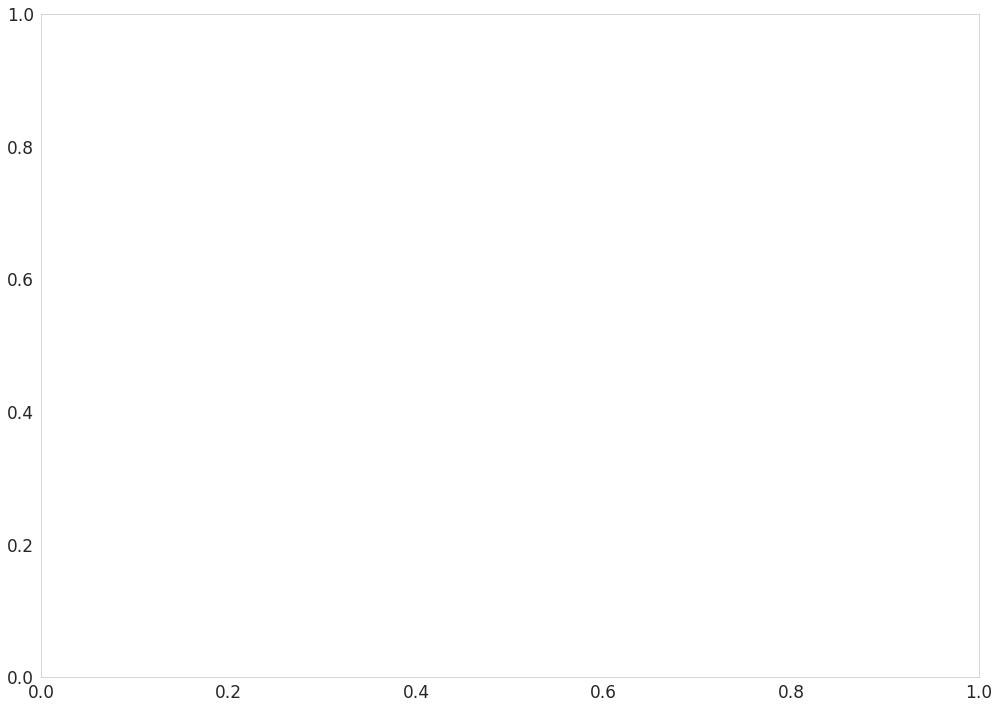

In [14]:
## Test PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 14, 
       'axes.titlesize': 16, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6  = plt.figure(figsize =(16.8, 12.2))  # (16.2, 9.3))
ax6  = plt.axes()

# x = arange(0.003, 0.018, 0.001)   #..15 yr
# x = arange(0.006, 0.032, 0.001)   #..150yrs
x   = linspace(0.002, 0.031, 18) * 1000.   # for all
y   = linspace(0.003, 0.032, 18) * 1000.
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

output_mons = {}
regr_data_0K =   []
report_data_0K =   []

regr_data_273K = []
report_data_273K = []

regr_data_leastabrbias = []
report_data_leastabrbias = []

regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
# plt.gcf()

plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []


for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]]  = arange(shape_mon_modelabr[deck_nas2[a]])   #..how many years for collected 'abr-4x' data

    scp1 = ax6.scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(0, 2.17 - random.rand(1)), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K, report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = plt.plot(y, POPT_0K[0] * y + POPT_0K[1], label="1 lrm fit_scipy: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)
print(POPT_0K[0], POPT_0K[1], R_square_0K)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(regr_data_0K.reshape(-1,1), report_data_0K.reshape(-1,1))
print(result1.coef_, result1.intercept_)

fitp2 = plt.plot(x, (x * 1.046 + 1.90315), linestyle = '--', linewidth=3, label="1 lrm fit_sklearn: "+r"$y = %.3f * x + %.4f,\ R^{2}=%.5f(linear\ fit)$" % (regr_skk.coef_, regr_skk.intercept_, r2_score(report_data_0K.reshape(-1,1), regr_data_0K.reshape(-1,1))))
# Add Reference line:
# Refp  = plt.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth = 3.8, zorder = 5)  # Blue

# sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})
plt.legend()
# print(linspace(0.002, 0.031, 18)*1000. * result1.coef_)

0.6276889807567183  * x +  1.6868791488104105
1.1717216619020558  * x +  -0.34785022131803944


'\nfor a in range(len(deck2)): \n\n    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+\'_predict_15yrs_0K\'], 1000.*output_meandelta_LWP[deck_nas2[a]+\'_actual_15yrs_0K\'], s=86, marker =\'o\', color="black") # black\n    regr_data_0K_15yr = append(regr_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+\'_predict_15yrs_0K\'])\n    report_data_0K_15yr = append(report_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+\'_actual_15yrs_0K\'])\n    # scatter group1\n    plot_scat1_15yr.append(scp1_15yr)\n\n    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+\'_predict_15yrs_273K\'], 1000.*output_meandelta_LWP[deck_nas2[a]+\'_actual_15yrs_273K\'], s=86, marker =\'o\', color="#f1a340") # yellow\n    regr_data_273K_15yr = append(regr_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+\'_predict_15yrs_273K\'])\n    report_data_273K_15yr = append(report_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+\'_actual_15yrs_273K\'])\n    # scatt

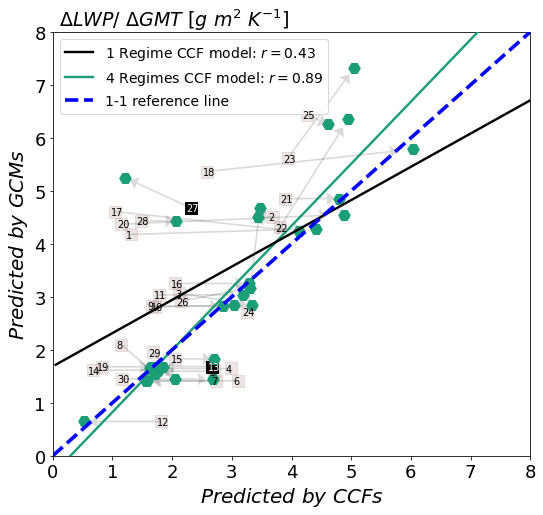

In [20]:
## PLot6:
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 20, 'legend.fontsize': 14, 
       'axes.titlesize': 23, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 1, figsize =(21.4 /2.5, 15.6 /2))  # (16.2, 9.3))

# x_15yr = linspace(0.0005, 0.008, 30) * 1000.  #..15 yr
# y_15yr = x_15yr
x = linspace(0.00005, 0.008, 30) * 1000.   # for all 150yr
y = x
x1 = linspace(0.00000, 0.0975, 60) * 1000.
y1 = x1

# deck_marker= [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D',
#      '$S$', '$I$', '$P$', '$O$', '$Q$', '$W$', '$R$', '$6$', '$7$', '$8$', '$$', '$Y$']
n_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []

# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1 = 150
yr2 = 15
# plt.gcf()
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []
ind_bad = [12, 26]
ind = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,  13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,  27, 28, 29]  # 13, 15, 27
# 150 yr
for a in range(len(deck2)):

    scp1 = ax6.scatter(1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'], s = 133, marker ='s', color="tab:brown", alpha = 0.15, zorder = 1) # black
    regr_data_0K = append(regr_data_0K, 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)

    # scp2 = ax6.scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    # regr_data_273K = append(regr_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    # report_data_273K = append(report_data_273K, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # # scatter group2
    # plot_scat2.append(scp2)

    # scp3 = ax6[1].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    # regr_data_leastabrbias = append(regr_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    # report_data_leastabrbias = append(report_data_leastabrbias, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # # scatter group3
    # plot_scat3.append(scp3)

    scp4 = ax6.scatter(1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s = 133, marker = 'H', color="#1b9e77", zorder = 2) # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)


    
    # Add line/Arrows between scatter Point
    ax6.quiver(1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'], 
               1000.*(output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_largestpiR2'] - output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K']),
               1000.*(output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_largestpiR2'] - output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K']),
                  units='width', angles='xy', scale_units='xy', width=0.0034, scale = 1.08, color = "black", headwidth=8, alpha = 0.15, zorder = 0)

    # Add annotate to the first point of each GCM
    ax6.annotate(n_name[a], xy=(1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'], 1000.*output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K']), 
                 xytext=(-4.60, -3.42), textcoords = "offset points", color = 'black', fontsize = 9.8, zorder = 98)
                #  horizontalalignment= "left" if output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")

# NoteS the weird two model:
scp1 = ax6.scatter(regr_data_0K[ind_bad], report_data_0K[ind_bad], s = 133, marker ='s', color="black", alpha = 1.0, zorder = 1) # black
ax6.annotate(n_name[12], xy=(regr_data_0K[12], report_data_0K[12]), xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 98)
ax6.annotate(n_name[26], xy=(regr_data_0K[26], report_data_0K[26]), xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 98)

    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K = curve_fit(target_func, regr_data_0K[ind], report_data_0K[ind])
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K[ind], *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
pearsonr_0K = pearsonr(regr_data_0K[ind], report_data_0K[ind])[0]
R_square_0K = calc_r2(regr_data_0K[ind], report_data_0K[ind])
fitp1 = ax6.plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 Regime CCF model: "+r"$r = %.2f$" % ( pearsonr_0K), color="black", linewidth = 2.4, zorder = 5)
print(POPT_0K[0], ' * x + ', POPT_0K[1])
# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
# POPT_273K, POCV_273K = curve_fit(target_func, regr_data_273K[ind], report_data_273K[ind])
# # Calc the R square, plot the fit line:
# calced_ydata_273K = target_func(regr_data_273K[ind], *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_273K = calc_r2(regr_data_273K[ind], report_data_273K[ind])
# fitp2 = ax6.plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
# POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# # Calc the R square, plot the fit line:
# calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
# fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="4lrm (least abr4x_MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2 = curve_fit(target_func, regr_data_largestpiR2[ind], report_data_largestpiR2[ind])
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2[ind], *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
pearsonr_largestpiR2 = pearsonr(regr_data_largestpiR2[ind], report_data_largestpiR2[ind])[0]
R_square_largestpiR2 = calc_r2(regr_data_largestpiR2[ind], report_data_largestpiR2[ind])
fitp3 = ax6.plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "4 Regimes CCF model: "+r"$r = %.2f$"% ( pearsonr_largestpiR2), color="#1b9e77", linewidth = 2.4, zorder = 4)
print(POPT_largestpiR2[0], ' * x + ', POPT_largestpiR2[1])
    
# Add Reference line:
Refp  = ax6.plot(x1, y1, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue

# Plot settings:
ax6.set_xlim([0., 8.])
ax6.set_ylim([0., 8.])
# ax6.set_xticks(arange(0., 8., 8))
# ax6.set_yticks(arange(0., 8., 8))
ax6.set_xlabel(r"$ Predicted\ by\ CCFs $") # r"$ Mean\ \Delta LWP\ Predicted\ by\ CCFs,\ $" + r"$g\ m^{-2}$"
ax6.set_ylabel(r"$ Predicted\ by\ GCMs $") # Mean\ \Delta LWP\ Predicted\ by\ GCMs,\ $" + r"$g\ m^{-2}$"

ax6.set_title( r"$\ \Delta LWP/\ \Delta GMT\ [g\ m^{2}\ K^{-1}]$", loc ='left', fontsize =19) # r"$%d\ yrs\ mean\ \frac{\Delta LWP}{\Delta GMT}\ in\ 'abrupt-4xCO2'$"%(yr1)
# legend61 = ax6.legend([scp1, scp4], ['1 lrm', 'the best 4-lrm with largest PI_R^2'], 
#                     loc='lower right', bbox_to_anchor=(0.975, 0.093), fontsize= 13)

ax6.legend()
# ax6.add_artist(legend61)

sns.set_style("whitegrid", {"grid.linestyle": ":"})


# 15yr:
'''
for a in range(len(deck2)): 

    scp1_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)

    scp2_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)

    # scp3_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    # regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    # report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # # scatter group3
    # plot_scat3_15yr.append(scp3_15yr)

    scp4_15yr = ax6[0].scatter(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    

    
    # Add line/Arrows between scatter Point(S)
    # print()
    ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
               1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
              units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(1.3, 2.37), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom") #  arrowprops=dict(facecolor='black', shrink=0.95)

    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm: "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f(regr&actual)$" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
# POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# # Calc the R square, plot the fit line:
# R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="4 lrm (least abr4x_MAE): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "4 lrm (largest PI_R^2): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 1.2, zorder = 4)

    
# Add Reference line:
Refp = ax6[0].plot(x_15yr, y_15yr, label = "1-1 reference line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue

# PLot settings:
ax6[0].set_xlim([0., 20.])
ax6[0].set_ylim([0., 20.])

ax6[0].set_xlabel(r"$ Predicted\ mean\ \Delta LWP|_{(abrupt-4xCO{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")
ax6[0].set_ylabel(r"$ True\ (GCMs)\ mean\ \Delta LWP|_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$g*m^{-2}$")

ax6[0].set_title( r"$\ first\ %d\ yrs\ mean\ \Delta LWP\ in\ 'abrupt-4xCO2'$"%(yr2) , loc ='left', fontsize =15)
legend62 = ax6[0].legend([scp1_15yr, scp2_15yr, scp4_15yr], ['1 lrm', 'the best 2-lrm', 'the best 4-lrm with largest PI_R^2'], 
    loc='lower right', bbox_to_anchor=(0.965, 0.093), fontsize= 13)

ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)
'''

# plt.savefig(path6+'plot_deltaLWPScatters_0K&4lrm.jpg', bbox_inches = 'tight', dpi = 400)
# plt.savefig(path6+"plot_deltaLWP_deltaGMTScatters_0K&4lrm_bad_July15.jpg", bbox_inches = 'tight', dpi = 500)

NameError: name 'output_meandelta_LWP' is not defined

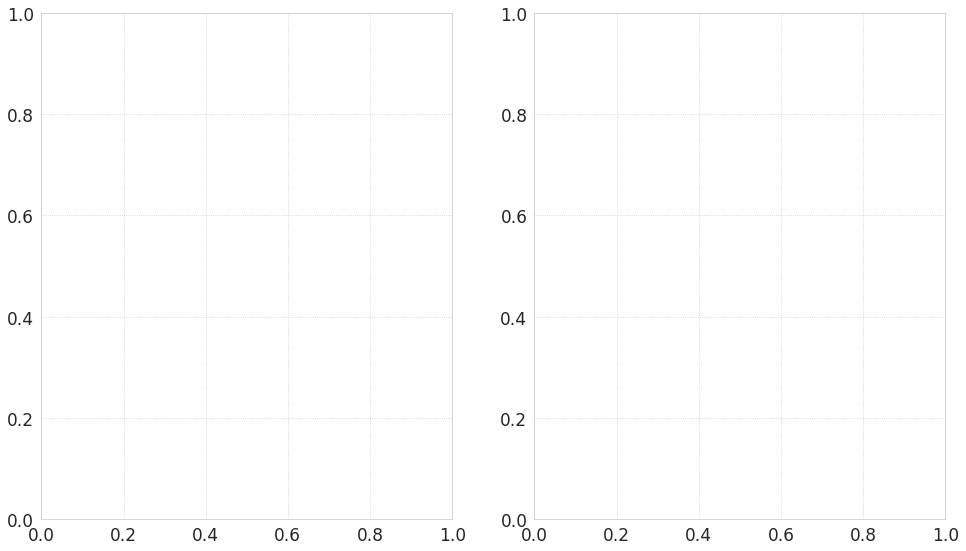

In [10]:
## PLot6:
###  GCM output and LRM regressed: d(SWCRE)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize = (16.2, 9.3))  # (21.6, 11.1))

x_15yr = linspace(-0., 22.5, 18)  #..15 yr
y_15yr = x_15yr
x   = linspace(-0., 22.5, 18)  # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15

output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]] = arange(151)   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    # scp4 = ax6[1].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    # regr_data_largestpiR2 = append(regr_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    # report_data_largestpiR2 = append(report_data_largestpiR2, output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # # scatter group4
    # plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point
#     ax6[1].quiver(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
#                100.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
#                100.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
#               units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

#     # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=( output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                    xytext=(7.29*random.rand(1), 0.677), textcoords = "offset points", 
                     horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm (hotcold_Jan): "+r"$y = %.3f * x  + %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="4 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
# POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# # Calc the R square, plot the fit line:
# calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
# R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
# fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "2 lrm (updown_Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# ax6[1].set_xlim([-4., 2.5])
# ax6[1].set_ylim([-4., 2.5])

ax6[1].set_xlabel(r"$ Predicted\ \Delta SWCRE_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$ W\ m^{-2} $")
ax6[1].set_ylabel(r"$ Report\ \Delta SWCRE_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$ W\ m^{-2} $")

ax6[1].set_title( r"$\ \ %d\ yrs\ mean\ of\ \Delta SWCRE\ in\ 'abrupt-4xCO2'$"%(yr1) , loc ='left', fontsize =15)
# legend61 = ax6[1].legend([scp2, scp3, scp4], [' Largest piControl_R2 2lrm (Jan)', ' Largest piControl_R2 4lrm (Annually mean)', ' Largest piControl_R2 4lrm (Jan)'], 
#                   loc='lower right', bbox_to_anchor=(0.975, 0.036), fontsize= 13)
ax6[1].legend(loc='upper left')
# ax6[1].add_artist(legend61)




# 15yr:

for a in range(len(deck2)):    
    
    scp1_15yr = ax6[0].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
#     scp4_15yr = ax6[0].scatter(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
#     regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
#     report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
#     # scatter group4
#     plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
#     ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
#                1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
#                1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
#               units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

#     # Add annotate to the first point of each GCM
#     ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
#                  xytext=(1.3, 2.37), textcoords = "offset points", 
#                  horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")  # arrowprops=dict(facecolor='black', shrink=0.95)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                     xytext=(2.6, 2.37), textcoords = "offset points", 
                      horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")  # arrowprops=dict(facecolor='black', shrink=0.95)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm (hotcold_Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="4 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
# POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# # Calc the R square, plot the fit line:
# R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "2 lrm (updown_Jan): "+r"$y = %.3f * x %.2f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot
# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

# ax6[0].set_xlim([-4., 2.5])
# ax6[0].set_ylim([-4., 2.5])


ax6[0].set_xlabel(r"$ Predicted\ \Delta SWCRE_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$ W\ m^{-2} $")
ax6[0].set_ylabel(r"$ Report\ \Delta SWCRE_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$ W\ m^{-2} $")

ax6[0].set_title(r"$\ first\ %d\ yrs\ mean\ of\ \Delta SWCRE\ in\ 'abrupt-4xCO2'$"%(yr2) , loc ='left', fontsize =15)
# legend61 = ax6[0].legend([scp2_15yr, scp3_15yr, scp4_15yr], [' Largest piControl_R2 2lrm (Jan)', ' Largest piControl_R2 4lrm (Annually mean)', ' Largest piControl_R2 4lrm (Jan)']
#                          , loc='lower right', bbox_to_anchor=(0.985, 0.086), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.savefig(path6 + 'plot_june3rd_SWCRE(a1*LWP*rsdt)_Scatters', bbox_inches='tight', dpi = 175)

In [64]:
print(regr_data_273K_15yr, report_data_273K_15yr)

[ 6.56658164 13.28473603  9.43099685 11.14893305  8.09166797 10.00524048
  2.48196623  2.83962124  6.00497655  6.67223604  6.24411857 10.38157539] [ 6.35266207 13.88036494 10.29683851  9.01388546  9.70396808  5.7805438
  4.55491322  5.29929222  7.60121877  8.69188954  7.24402999 12.0073925 ]


In [97]:
print(1000.*regr_data_0K)
print(1000.*report_data_0K)

x = array([20.31969288, 16.42245359, 19.49929039, 15.27522641, 17.75969895,  9.51465783,
 15.94579419 , 17.55826368, 17.21027466, 16.65799056, 15.5973086,   7.3153503, 13.83997309,  8.53506344,  9.8733702,   3.73919073,  2.95396728,  4.40829008]) *(1./1000)

y = array([24.39877929, 19.85377042, 16.03064902, 14.07887328, 13.88738618, 13.82360605,
 19.10723209, 17.77672482, 29.278003,   18.77615813, 21.04546457,  9.86254724, 7.67339088,  8.84114473, 14.13177421,  13.29088098,  4.82944001, 12.76356024 ]) *(1./1000)

x = regr_data_0K
y = report_data_0K
popt, pocv = curve_fit(target_func, x ,y)
print(popt)

# sklearn-liner regression 
regr_skk  = linear_model.LinearRegression()

result1 = regr_skk.fit(x.reshape(-1,1), y.reshape(-1,1))
print(regr_skk.coef_, regr_skk.intercept_ , r2_score(y.reshape(-1,1),x.reshape(-1,1)))

[20319.69288483 16422.45359475 19499.29038735 15275.22641057
 17759.69894507  9514.65782656 15945.79419191 17558.26368307
 17210.27466096 16657.99055837 15597.30860014  7315.35030326
 13839.97308984  8535.06344272  9873.3701958   3739.1907333
  2953.96727937  4408.29008058]
[24398.77929157 19853.77042408 16030.64901707 14078.8732788
 13887.38617743 13823.60605399 19107.23208543 17776.72482239
 29278.00300434 18776.15812618 21045.46457308  9862.54724272
  7673.3908781   8841.14472732 14131.77420522 13290.88098478
  4829.44001401 12763.56023633]
[0.73339819 6.05492678]
[[0.73339819]] [6.05492678] 0.20658021595794296


NameError: name 'output_meandelta_LWP' is not defined

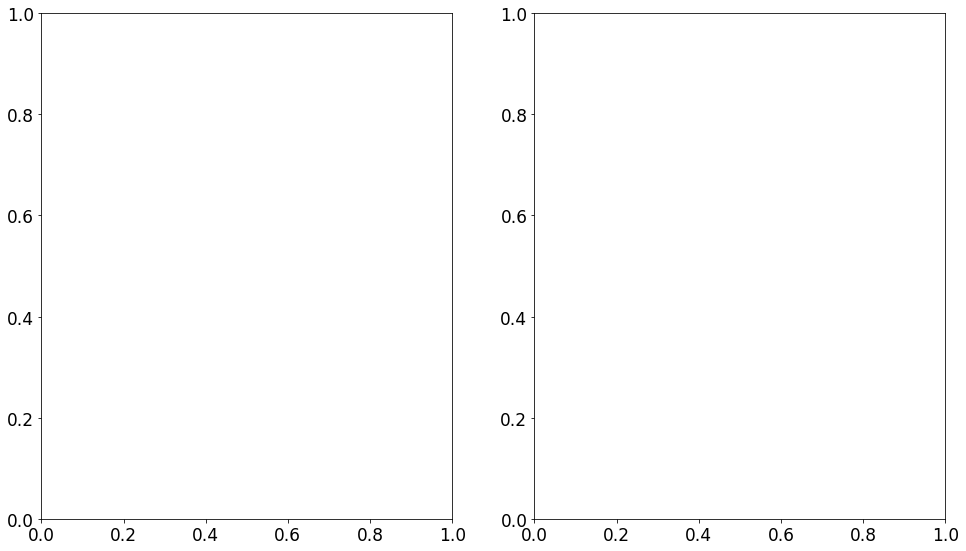

In [101]:
## PLot6:
###  GCM output and LRM regressed: d(albedo)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


fig6, ax6  = plt.subplots(1, 2, figsize = (16.2, 9.3))  # (21.6, 11.1))

x_15yr = linspace(-0.052, 0.037, 18) *100.  #..15 yr
y_15yr = x_15yr
x   = linspace(-0.053, 0.037, 18) * 100.  # for all 150yr
y   = x

# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# output_dabr_pi_obspredi  = {}

# 15yr 
regr_data_0K_15yr =   []
report_data_0K_15yr =   []
regr_data_273K_15yr = []
report_data_273K_15yr = []
regr_data_leastabrbias_15yr = []
report_data_leastabrbias_15yr = []
regr_data_largestpiR2_15yr = []
report_data_largestpiR2_15yr = []


# 150 yr
regr_data_0K =   []
report_data_0K =   []
regr_data_273K = []
report_data_273K = []
regr_data_leastabrbias = []
report_data_leastabrbias = []
regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr1   =  150
yr2   =  15
# plt.gcf()
output_mons   =  {}
plot_scat1 = []
plot_scat2 = []
plot_scat3 = []
plot_scat4 = []

plot_scat1_15yr = []
plot_scat2_15yr = []
plot_scat3_15yr = []
plot_scat4_15yr = []

# 150 yr
for a in range(len(deck2)):    
    
    output_mons[deck_nas2[a]] = arange(151)   #..how many years for collected 'abr-4x' data

    scp1 = ax6[1].scatter(100*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K = append(regr_data_0K, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'])
    # scatter group1
    plot_scat1.append(scp1)
    
    scp2 = ax6[1].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K = append(regr_data_273K, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'])
    # scatter group2
    plot_scat2.append(scp2)
    
    scp3 = ax6[1].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias = append(regr_data_leastabrbias, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_leastabrbias'])
    # scatter group3
    plot_scat3.append(scp3)
    
    scp4 = ax6[1].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2 = append(regr_data_largestpiR2, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_largestpiR2'])
    # scatter group4
    plot_scat4.append(scp4)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point
#     ax6[1].quiver(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'], 
#                100.*(output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K']),
#                100.*(output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_273K']),
#               units='width', angles='xy', scale_units='xy', width=0.0017, scale = 1.10, color = "black", headwidth=8, zorder=2)

#     # Add annotate to the first point of each GCM
    ax6[1].annotate(n_name[a], xy=(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'], 100.* output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K']), 
                   xytext=(7.29*random.rand(1), 0.677), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")


#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K , report_data_0K)
# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_0K  = calc_r2(regr_data_0K, report_data_0K)
fitp1 = ax6[1].plot(y, POPT_0K[0] * x + POPT_0K[1], label="1 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K[0], POPT_0K[1], R_square_0K), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)
# Calc the R square, plot the fit line:
calced_ydata_273K  = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_273K  = calc_r2(regr_data_273K, report_data_273K)
fitp2 = ax6[1].plot(y, POPT_273K[0] * x + POPT_273K[1], label="2 lrm (hotcold_Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K[0], POPT_273K[1], R_square_273K), color="#f1a340", linewidth = 1.2, zorder = 4)

# #.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)
# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_leastabrbias  = calc_r2(regr_data_leastabrbias, report_data_leastabrbias)
fitp3 = ax6[1].plot(y, POPT_leastabrbias[0] * x + POPT_leastabrbias[1], label="4 lrm (Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)
# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
R_square_largestpiR2  = calc_r2(regr_data_largestpiR2, report_data_largestpiR2)
fitp3 = ax6[1].plot(y, POPT_largestpiR2[0] * x + POPT_largestpiR2[1], label= "2 lrm (updown_Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), color="#1b9e77", linewidth = 1.2, zorder = 4)

###### end fitting_line plot

# Add Reference line:
Refp  = ax6[1].plot(x, y, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.8, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
ax6[1].set_xlim([-4., 2.5])
ax6[1].set_ylim([-4., 2.5])

ax6[1].set_xlabel(r"$ Predicted\ \Delta albedo_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$\%$")
ax6[1].set_ylabel(r"$ Report\ \Delta albedo_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$\%$")

ax6[1].set_title( r"$\ \ %d\ yrs\ mean\ of\ \Delta albedo\ in\ 'abrupt-4xCO2'$"%(yr1) , loc ='left', fontsize =15)
# legend61 = ax6[1].legend([scp2, scp3, scp4], [' Largest piControl_R2 2lrm (Jan)', ' Largest piControl_R2 4lrm (Annually mean)', ' Largest piControl_R2 4lrm (Jan)'], 
#                   loc='lower right', bbox_to_anchor=(0.975, 0.036), fontsize= 13)
ax6[1].legend(loc='upper left')
# ax6[1].add_artist(legend61)




# 15yr:

for a in range(len(deck2)):    
    
    scp1_15yr = ax6[0].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], s=86, marker ='o', color="black") # black
    regr_data_0K_15yr = append(regr_data_0K_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'])
    report_data_0K_15yr = append(report_data_0K_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'])
    # scatter group1
    plot_scat1_15yr.append(scp1_15yr)
    
    scp2_15yr = ax6[0].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'], s=86, marker ='o', color="#f1a340") # yellow
    regr_data_273K_15yr = append(regr_data_273K_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'])
    report_data_273K_15yr = append(report_data_273K_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'])
    # scatter group2
    plot_scat2_15yr.append(scp2_15yr)
    
    scp3_15yr = ax6[0].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'], s=86, marker = 'o', color="#d95f02")# red
    regr_data_leastabrbias_15yr = append(regr_data_leastabrbias_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_leastabrbias'])
    report_data_leastabrbias_15yr = append(report_data_leastabrbias_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_leastabrbias'])
    # scatter group3
    plot_scat3_15yr.append(scp3_15yr)
    
    scp4_15yr = ax6[0].scatter(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'], s=86, marker ='o', color="#1b9e77") # green
    regr_data_largestpiR2_15yr = append(regr_data_largestpiR2_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_largestpiR2'])
    report_data_largestpiR2_15yr = append(report_data_largestpiR2_15yr, 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_largestpiR2'])
    # scatter group4
    plot_scat4_15yr.append(scp4_15yr)
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas2[a]]  = output_obsercoef_predi[deck_nas2[a]][shape_yr_modelPI[deck_nas2[a]]:] - mean(output_obsercoef_predi[deck_nas2[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas2[a]][yr],  output_dabr_pi_report[deck_nas2[a]][yr] , s = 125., label = deck_nas2[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas2[a]])
    
    # Add line/Arrows between scatter Point(S)
    # print()
#     ax6[0].quiver(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'], 
#                1000.*(output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K']),
#                1000.*(output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K'] - output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_273K']),
#               units='width', angles='xy', scale_units='xy', width=0.0019, scale = 1.10, color = "black", headwidth=8, zorder=2)

#     # Add annotate to the first point of each GCM
#     ax6[0].annotate(n_name[a], xy=(1000.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 1000.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
#                  xytext=(1.3, 2.37), textcoords = "offset points", 
#                  horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")  # arrowprops=dict(facecolor='black', shrink=0.95)

    # Add annotate to the first point of each GCM
    ax6[0].annotate(n_name[a], xy=(100.*output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'], 100.*output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K']), 
                 xytext=(2.6, 2.37), textcoords = "offset points", 
                 horizontalalignment= "left" if output_meandelta_LWP[deck_nas2[a]+'_predict_15yrs_0K'] > output_meandelta_LWP[deck_nas2[a]+'_actual_15yrs_0K'] else "right", verticalalignment = "bottom")  # arrowprops=dict(facecolor='black', shrink=0.95)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K_15yr, POCV_0K_15yr  = curve_fit(target_func, regr_data_0K_15yr , report_data_0K_15yr)
# Calc the R square, plot the fit line:
R_square_0K_15yr  = calc_r2(regr_data_0K_15yr, report_data_0K_15yr)
fitp1_15yr = ax6[0].plot(y_15yr, POPT_0K_15yr[0] * x_15yr + POPT_0K_15yr[1], label="1 lrm (Jan): "+r"$y = %.3f * x + %.4f,\ R^{2}= %.2f $" % (POPT_0K_15yr[0], POPT_0K_15yr[1], R_square_0K_15yr), color="black", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K_15yr, POCV_273K_15yr  = curve_fit(target_func, regr_data_273K_15yr, report_data_273K_15yr)
# Calc the R square, plot the fit line:
R_square_273K_15yr  = calc_r2(regr_data_273K_15yr, report_data_273K_15yr)
fitp2_15yr = ax6[0].plot(y_15yr, POPT_273K_15yr[0] * x_15yr + POPT_273K_15yr[1], label="2 lrm (hotcold_Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_273K_15yr[0], POPT_273K_15yr[1], R_square_273K_15yr), color="#f1a340", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model
POPT_leastabrbias_15yr, POCV_leastabrbias_15yr  = curve_fit(target_func, regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
# Calc the R square, plot the fit line:
R_square_leastabrbias_15yr  = calc_r2(regr_data_leastabrbias_15yr, report_data_leastabrbias_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_leastabrbias_15yr[0] * x_15yr + POPT_leastabrbias_15yr[1], label="4 lrm (Jan): "+r"$y = %.3f * x %.4f,\ R^{2}= %.2f$"% (POPT_leastabrbias_15yr[0], POPT_leastabrbias_15yr[1], R_square_leastabrbias_15yr), color="#d95f02", linewidth = 1.2, zorder = 4)

#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2_15yr, POCV_largestpiR2_15yr  = curve_fit(target_func, regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
# Calc the R square, plot the fit line:
R_square_largestpiR2_15yr  = calc_r2(regr_data_largestpiR2_15yr, report_data_largestpiR2_15yr)
fitp3_15yr = ax6[0].plot(y_15yr, POPT_largestpiR2_15yr[0] * x_15yr + POPT_largestpiR2_15yr[1], label= "2 lrm (updown_Jan): "+r"$y = %.3f * x %.2f,\ R^{2}= %.2f$"% (POPT_largestpiR2_15yr[0], POPT_largestpiR2_15yr[1], R_square_largestpiR2_15yr), color="#1b9e77", linewidth = 1.2, zorder = 4)


###### end fitting_line plot
# Add Reference line:
Refp  = ax6[0].plot(x_15yr, y_15yr, label = "1-1 line", c='blue', linestyle= '--', linewidth = 3.6, zorder = 5)  # Blue


# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

ax6[0].set_xlim([-4., 2.5])
ax6[0].set_ylim([-4., 2.5])


ax6[0].set_xlabel(r"$ Predicted\ \Delta albedo_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$\%$")
ax6[0].set_ylabel(r"$ Report\ \Delta albedo_{(abrupt-4xCO_{2}\ -\ piControl)},\ $" + r"$\%$")

ax6[0].set_title(r"$\ first\ %d\ yrs\ mean\ of\ \Delta albedo\ in\ 'abrupt-4xCO2'$"%(yr2) , loc ='left', fontsize =15)
# legend61 = ax6[0].legend([scp2_15yr, scp3_15yr, scp4_15yr], [' Largest piControl_R2 2lrm (Jan)', ' Largest piControl_R2 4lrm (Annually mean)', ' Largest piControl_R2 4lrm (Jan)']
#                          , loc='lower right', bbox_to_anchor=(0.985, 0.086), fontsize= 13)
ax6[0].legend(loc='upper left')
# ax6[0].add_artist(legend62)

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.savefig(path6 + 'plot_may27th_Scatters', bbox_inches='tight', dpi = 175)

In [28]:
output_dswcre = {}
output_dalbedo_report = {}
output_dalbedo_predicted = {}

str_yr = arange(99, 99+5, 1)
print(str_yr)
end_yr = arange(99+145, 99+145+5, 1)
# print(output_report[deck_nas2[9]+'1lrm']['rsutcs'].shape)
# print(output_GMT[deck_nas2[9]+'1lrm'].shape)
for j in arange(len(deck_nas2)):

    # read data, calc the SWCRE('rsut' - 'rsutcs') for report, alpha (albedo) for both report and predicted
    output_dswcre[deck_nas2[j]+'1lrm'] = ( nanmean((output_report[deck_nas2[j]+'1lrm']['rsut'] - output_report[deck_nas2[j]+'1lrm']['rsutcs'])[end_yr]) 
                                           - nanmean((output_report[deck_nas2[j]+'1lrm']['rsut'] - output_report[deck_nas2[j]+'1lrm']['rsutcs'])[str_yr]) ) / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_report[deck_nas2[j]+'1lrm'] = 100.* ( nanmean((output_report[deck_nas2[j]+'1lrm']['albedo'])[end_yr]) 
                                           - nanmean((output_report[deck_nas2[j]+'1lrm']['albedo'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_report[deck_nas2[j]+'Bestfit6_Jan'] = 100.* ( nanmean((output_report[deck_nas2[j]+'Bestfit6_Jan']['albedo'])[end_yr]) 
                                           - nanmean((output_report[deck_nas2[j]+'Bestfit6_Jan']['albedo'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_report[deck_nas2[j]+'2lrm_Jan'] = 100.* ( nanmean((output_report[deck_nas2[j]+'2lrm_Jan']['albedo'])[end_yr]) 
                                           - nanmean((output_report[deck_nas2[j]+'2lrm_Jan']['albedo'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_report[deck_nas2[j]+'Bestfit5_an'] = 100.* ( nanmean((output_report[deck_nas2[j]+'Bestfit5_an']['albedo'])[end_yr]) 
                                           - nanmean((output_report[deck_nas2[j]+'Bestfit5_an']['albedo'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    
    output_dalbedo_predicted[deck_nas2[j]+'1lrm'] = 100.* ( nanmean((output_predicted[deck_nas2[j]+'1lrm']['albedo_lL'])[end_yr]) 
                                           - nanmean((output_predicted[deck_nas2[j]+'1lrm']['albedo_lL'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_predicted[deck_nas2[j]+'Bestfit6_Jan'] = 100.* ( nanmean((output_predicted[deck_nas2[j]+'Bestfit6_Jan']['albedo_lL'])[end_yr]) 
                                           - nanmean((output_predicted[deck_nas2[j]+'Bestfit6_Jan']['albedo_lL'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_predicted[deck_nas2[j]+'2lrm_Jan'] = 100.* ( nanmean((output_predicted[deck_nas2[j]+'2lrm_Jan']['albedo_lL'])[end_yr]) 
                                           - nanmean((output_predicted[deck_nas2[j]+'2lrm_Jan']['albedo_lL'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))
    
    output_dalbedo_predicted[deck_nas2[j]+'Bestfit5_an'] = 100.* ( nanmean((output_predicted[deck_nas2[j]+'Bestfit5_an']['albedo_lL'])[end_yr]) 
                                           - nanmean((output_predicted[deck_nas2[j]+'Bestfit5_an']['albedo_lL'])[str_yr]) )  / (mean(output_GMT[deck_nas2[j]+'1lrm'][end_yr]) - mean(output_GMT[deck_nas2[j]+'1lrm'][str_yr]))

print(output_dswcre)
# print(output_dalbedo_report)
# print(output_dalbedo_predicted)

[ 99 100 101 102 103]
{'BCCESM11lrm': 0.4399551823395535, 'CanESM51lrm': 1.6638392957456576, 'CESM21lrm': -0.5575716949353688, 'CESM2FV21lrm': -1.4597186009445535, 'CESM2WACCM1lrm': -0.9326603559569929, 'CNRMESM21lrm': 0.9305309379413598, 'GISSE21G1lrm': 0.9646573585109747, 'GISSE21H1lrm': 0.09382944992744728, 'IPSLCM6ALR1lrm': 1.081442440780361, 'MRIESM201lrm': 1.8014149153842658, 'MIROC61lrm': 1.9007813124477155, 'SAM01lrm': 1.2368432320032565}


Text(0.5, 1.0, 'SWCRE v.s. albedo')

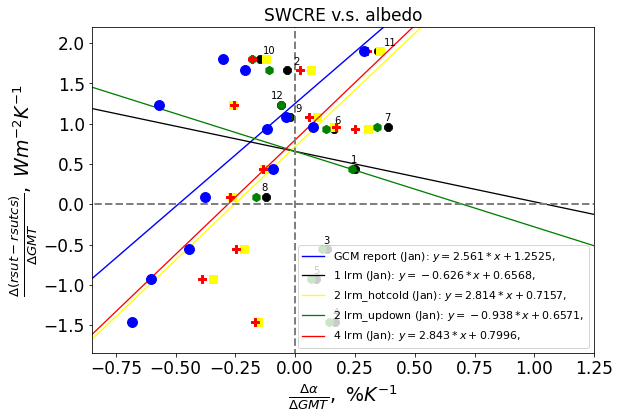

In [41]:
# rsut-rsutcs v.s. ALBEDO

y = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []

X = linspace(-1.25, 1.25, 24)

# plotting:
# deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D']
n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

plt.figure(figsize = (9, 6))

for t in range(len(deck_nas2)):
    
    plt.scatter(output_dalbedo_report[deck_nas2[t]+'1lrm'], output_dswcre[deck_nas2[t]+'1lrm'], c = 'b', marker = 'o', s= 98, zorder = 98)
    x1.append(output_dalbedo_report[deck_nas2[t]+'1lrm'])
    y.append(output_dswcre[deck_nas2[t]+'1lrm'])

    
    plt.scatter(output_dalbedo_predicted[deck_nas2[t]+'1lrm'], output_dswcre[deck_nas2[t]+'1lrm'], c = 'black', marker = '8', s = 69, zorder =1)
    x2.append(output_dalbedo_predicted[deck_nas2[t]+'1lrm'])

    plt.scatter(output_dalbedo_predicted[deck_nas2[t]+'2lrm_Jan'], output_dswcre[deck_nas2[t]+'1lrm'], c = 'yellow', marker = 's', s = 69, zorder =2)
    x3.append(output_dalbedo_predicted[deck_nas2[t]+'2lrm_Jan'])
    
    plt.scatter(output_dalbedo_predicted[deck_nas2[t]+'Bestfit6_Jan'], output_dswcre[deck_nas2[t]+'1lrm'], c = 'green', marker = 'h', s = 69, zorder =3)
    x4.append(output_dalbedo_predicted[deck_nas2[t]+'Bestfit6_Jan'])

    plt.scatter(output_dalbedo_predicted[deck_nas2[t]+'Bestfit5_an'], output_dswcre[deck_nas2[t]+'1lrm'], c = 'red', marker = 'P', s = 70, zorder =4)
    x5.append(output_dalbedo_predicted[deck_nas2[t]+'Bestfit5_an'])

    plt.annotate(n_name[t], xy=(output_dalbedo_predicted[deck_nas2[t]+'1lrm'], output_dswcre[deck_nas2[t]+'1lrm']), 
                   xytext=(7.29*random.rand(1), 3.77), textcoords = "offset points", 
                 horizontalalignment= "left" if output_dalbedo_predicted[deck_nas2[t]+'2lrm_Jan'] > output_dalbedo_predicted[deck_nas2[t]+'1lrm'] else "right", verticalalignment = "bottom")
y = asarray(y)
x1 = asarray(x1)
x2 = asarray(x2)
x3 = asarray(x3)

x4 = asarray(x4)
x5 = asarray(x5)
# print(y)

# POLY (linear) fit:
POPT_REPORT, POCV_REPORT  = curve_fit(target_func, x1 , y)
fitp11 = plt.plot(X, POPT_REPORT[0] * X + POPT_REPORT[1], c = 'b', linewidth = 1.4, label="GCM report (Jan): "+r"$y = %.3f * x + %.4f, $" % (POPT_REPORT[0], POPT_REPORT[1]))

POPT_0K, POCV_0K  = curve_fit(target_func, x2 , y)
fitp12 = plt.plot(X, POPT_0K[0] * X + POPT_0K[1], c = 'black', linewidth = 1.3, label="1 lrm (Jan): "+r"$y = %.3f * x + %.4f, $" % (POPT_0K[0], POPT_0K[1]))

POPT_HC, POCV_HC  = curve_fit(target_func, x3 , y)
fitp13 = plt.plot(X, POPT_HC[0] * X + POPT_HC[1], c = 'yellow', linewidth = 1.3, label="2 lrm_hotcold (Jan): "+r"$y = %.3f * x + %.4f, $" % (POPT_HC[0], POPT_HC[1]))

POPT_UD, POCV_UD  = curve_fit(target_func, x4 , y)
fitp14 = plt.plot(X, POPT_UD[0] * X + POPT_UD[1], c = 'green', linewidth = 1.3, label="2 lrm_updown (Jan): "+r"$y = %.3f * x + %.4f, $" % (POPT_UD[0], POPT_UD[1]))

POPT_UDHC, POCV_UDHC  = curve_fit(target_func, x5 , y)
fitp15 = plt.plot(X, POPT_UDHC[0] * X + POPT_UDHC[1], c = 'red', linewidth = 1.3, label="4 lrm (Jan): "+r"$y = %.3f * x + %.4f, $" % (POPT_UDHC[0], POPT_UDHC[1]))

# Plot setting:

plt.xlim(-0.85, 1.25)
plt.ylim(-1.85, 2.2)
plt.legend()
plt.axhline(0.0, -0.85, 1.25, linestyle = '--', linewidth = 2, color = 'gray')
plt.axvline(0.0, -1.85, 2.2, linestyle = '--', linewidth = 2, color = 'gray')
plt.xlabel(r"$\frac{\Delta \alpha}{\Delta GMT},\ \% K^{-1}$", fontsize = 19)
plt.ylabel(r"$\frac{\Delta (rsut - rsutcs)}{\Delta GMT},\ W m^{-2} K^{-1}$", fontsize  = 19)
plt.title("SWCRE v.s. albedo")
# plt.savefig(path6 +"plot_dSWCRE_dALBEDO", bbox_inches='tight', dpi = 250)

In [10]:
# import numpy as np
from scipy.stats import *

# define the curve function which you intend to fit:
def target_func_poly1(x, a, b):
    
    '''
    linear fit
    '''
    y = a* x + b
    return y

def target_func_poly2(x, a, b, c):
    
    '''
    2d polynomial fit
    '''
    y = a* x**2 + b* x**1 + c
    return y

def target_func_expo(x, a, b, c):

    '''
    exponential fitting
    '''
    y = a * b**x + c
    return y

# # fit curves:
# # Let's say we have some data points, and we wants to fit a line to get their trend.
# X_data = mean_Hot_LWP  # The data you want to fit, independant variable: X
# Y_data = Coef_albedo_lwp[:,1] # The data you want to fit, dependant variable: Y 

# # you could define the curve model which you intend to fit, below is a linear model:
# def target_func_poly1(x, a, b):
    
#     '''
#     linear fit
#     '''
#     y = a* x + b
#     return y

# def target_func_powerlaw(x, a, b, c):
    
#     '''
#     power law fitting
#     '''
#     y = a * x**b + c
#     return y

# # Give the scipy curve_fit function: 1: the function model you wants to fit (X, Y), let's say: a linear func target_func_poly1; 2: X data; 3: Y data;
# popt_Hot, pocv_Hot = curve_fit(target_func_powerlaw, mean_Hot_LWP, Coef_albedo_lwp[:,1], p0 = [1, 1.5, 0], maxfev=5000)

# # The two output of curve_fit function are: popt_Hot: the optimized parameter, popt_Hot[0] = a, popt_Hot[1] = b; pocv_Hot: The estimated covariance of popt_Hot parameter a and b
# print(popt_Hot)
# print(pocv_Hot)

# # Then, you could plot the fitting line with those data points
# plt.figure()
# x1 = linspace(0., 190., 100)

# l1  =  plt.scatter(mean_Hot_LWP, Coef_albedo_lwp[:,1], c = 'b', marker = '*', s = 60, label = ' original data')

# fitp1 = plt.plot(x1, target_func_powerlaw(x1, *popt_Hot), c = 'r', label = ' fitting curve')
# plt.legend()

[186.59065841  91.45703453 140.52842234 114.4622174  141.21504253
  55.84845339 128.39286677 122.29939672 119.40745121 116.72652548
 159.70818252  55.02442864]
[49.93691973  1.17807543 55.24612817 41.32621939 57.05507265  8.17958694
 67.96480455 66.14567039  1.20333297  1.94141366  1.1979773   7.14280199]
[[69.85649326 44.00003356]
 [ 3.91599902 24.72316404]
 [47.15351558 11.78392269]
 [28.95904781 12.44015349]
 [47.5089477  11.47996274]
 [ 8.88995723 14.72398101]
 [43.838575   25.92466086]
 [39.88822878 21.82192156]
 [ 8.11130332 29.47373264]
 [15.20678238 32.16232707]
 [ 3.87477675 49.96820058]
 [ 5.16604748  9.2989689 ]]
[ 0.01307357 -1.84961641]
[0.00284608 0.13178021]


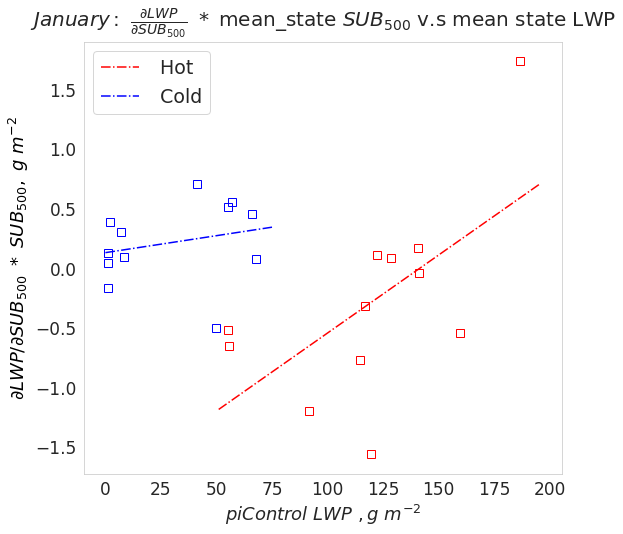

In [21]:
# Plot: Mean_state LWP v.s. coef(s):
# Number of models currently
N = 12

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 19, 
       'axes.titlesize': 20, 'xtick.labelsize': 17, 'ytick.labelsize': 17}

plt.rcParams.update(parameters)

fig3 =  plt.figure(figsize=( 9.5, 6))

ax31 = fig3.add_axes([0,0,0.7,1])

# calc values:
mean_Hot_albedo = []
mean_Cold_albedo = []
mean_Cold_LWP = []
mean_Hot_LWP = []
Coef_albedo_lwp = []
layover_Hot_PI = {}
layover_Cold_PI = {}
rd_Hot = {}
rd_Cold = {}

mean_Cold_sst = []
mean_Hot_sst = []
Coef_LWP_sst = []
mean_Cold_p_e = []
mean_Hot_p_e = []
Coef_LWP_p_e = []
mean_Cold_lts = []
mean_Hot_lts = []
Coef_LWP_lts = []
mean_Cold_sub = []
mean_Hot_sub = []
Coef_LWP_sub = []
# area mean:
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9

variables_nas = ['albedo', 'LWP', 'SST', 'p_e', 'LTS', 'SUB']
for i in range(len(deck2)):
    # Save into regime-dependent mean_state LWP AREA_MEAN VALUES
    shape_of_3dPImd = output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'].shape
    
    for k in range(len(variables_nas)):
        
        layover_Hot_PI[variables_nas[k]] = output_2lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_PI[variables_nas[k]] = output_2lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Hot_PI[variables_nas[k]][logical_not(output_ind_Hot_PI[deck_nas2[i]])] = nan
        layover_Cold_PI[variables_nas[k]][logical_not(output_ind_Cold_PI[deck_nas2[i]])] = nan
        rd_Hot[variables_nas[k]] = layover_Hot_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_Cold[variables_nas[k]] = layover_Cold_PI[variables_nas[k]].reshape(shape_of_3dPImd)
    
    mean_Hot_albedo.append(nanmean(area_mean(rd_Hot['albedo'], y_range, x_range)))
    mean_Cold_albedo.append(nanmean(area_mean(rd_Cold['albedo'], y_range, x_range)))
    mean_Hot_LWP.append(nanmean(area_mean(rd_Hot['LWP'], y_range, x_range)))
    mean_Cold_LWP.append(nanmean(area_mean(rd_Cold['LWP'], y_range, x_range)))
    
    mean_Hot_sst.append(nanmean(area_mean(rd_Hot['SST'], y_range, x_range)))
    mean_Cold_sst.append(nanmean(area_mean(rd_Cold['SST'], y_range, x_range)))
    mean_Hot_p_e.append(nanmean(area_mean(rd_Hot['p_e'], y_range, x_range)))
    mean_Cold_p_e.append(nanmean(area_mean(rd_Cold['p_e'], y_range, x_range)))
    mean_Hot_lts.append(nanmean(area_mean(rd_Hot['LTS'], y_range, x_range)))
    mean_Cold_lts.append(nanmean(area_mean(rd_Cold['LTS'], y_range, x_range)))
    mean_Hot_sub.append(nanmean(area_mean(rd_Hot['SUB'], y_range, x_range)))
    mean_Cold_sub.append(nanmean(area_mean(rd_Cold['SUB'], y_range, x_range)))
    
    # Save Coefs
    Coef_albedo_lwp.append([stcoef1[i], stcoef2[i]])
    Coef_LWP_sst.append([stcoef_sst1[i], stcoef_sst2[i]])
    Coef_LWP_p_e.append([stcoef_qcon1[i], stcoef_qcon2[i]])
    Coef_LWP_lts.append([stcoef_stabil1[i], stcoef_stabil2[i]])
    Coef_LWP_sub.append([stcoef_sub5001[i], stcoef_sub5002[i]])

mean_Hot_LWP = 1000.* asarray(mean_Hot_LWP)
mean_Cold_LWP = 1000.* asarray(mean_Cold_LWP)
mean_Hot_albedo = 100.* asarray(mean_Hot_albedo)
mean_Cold_albedo = 100.* asarray(mean_Cold_albedo)
Coef_albedo_lwp = asarray(Coef_albedo_lwp).reshape(N, 2)/ 1000.

Coef_LWP_sst = asarray(Coef_LWP_sst).reshape(N, 2)
Coef_LWP_p_e = asarray(Coef_LWP_p_e).reshape(N, 2) 
Coef_LWP_lts = asarray(Coef_LWP_lts).reshape(N, 2)
Coef_LWP_sub = asarray(Coef_LWP_sub).reshape(N, 2)

print(mean_Hot_LWP)
print(mean_Cold_LWP)
print(Coef_LWP_p_e)

# Plotting:

# d_albedo_d_lwp
# Hot
# ax31.plot(mean_Hot_albedo, Coef_albedo_lwp[:,1] * mean_Hot_LWP, marker = 'o', c = 'r', linestyle='None')
# ax31.set_xlabel(r"$ piControl\ albedo, \ $" +r"$\%$")
# ax31.set_ylabel(r"$ \partial \alpha/\partial LWP\ *\ LWP,\ $" +r"$\% $", c = 'k')
# # # Cold
# ax31.plot(mean_Cold_albedo, Coef_albedo_lwp[:,0] * mean_Cold_LWP, marker = 'o', c = 'b', linestyle = 'None')
# # ax31.set_ylabel(r"$ Cold,\ \partial \alpha/\partial LWP \ _{Jan},\ $" +r"$\%\ m^{2}\ g^{-1}$", c ='b', label = 'Cold)

# plt.title(r"$January:\ \frac{\partial \alpha}{\partial LWP}\ *\ $"+"mean_state LWP" + " v.s mean_state "+r"$\alpha $", pad = 13.7925)

# ax32 = ax31.twinx()

# d_lwp_d_p_e
# Hot
ax31.plot(mean_Hot_LWP, Coef_LWP_sub[:,1] * mean_Hot_sub, marker = 's', c = 'r', markerfacecolor = 'None', markersize = 8, linestyle='None')
ax31.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$g\ m^{-2} $")
ax31.set_ylabel(r"$ \partial LWP/\partial SUB_{500}\ *\ SUB_{500},\ $" +r"$g\ m^{-2} $", c ='k')
# Cold
ax31.plot(mean_Cold_LWP, Coef_LWP_sub[:,0] * mean_Cold_sub, marker = 's', c = 'b', markerfacecolor = 'None', markersize = 8, linestyle = 'None')
# ax31.set_ylabel(r"$ Cold,\ \partial LWP/\partial q_{conv}\ _{Jan},\ $" +r"$g\ m^{-2}\ unit p-e $", c ='b')

plt.title(r"$January:\ \frac{\partial LWP}{\partial SUB_{500}}\ *\ $"+"mean_state "+r"$SUB_{500}$" + " v.s mean state LWP ", pad = 13.7925)


# fit curves:
# # d_albedo_d_lwp
# POPT_Hot, POCV_Hot = curve_fit(target_func_poly1, mean_Hot_albedo, Coef_albedo_lwp[:,1] * mean_Hot_LWP)
# POPT_Cold, POCV_Cold = curve_fit(target_func_poly1, mean_Cold_albedo, Coef_albedo_lwp[:,0] * mean_Cold_LWP)

# print(POPT_Hot)
# print(POPT_Cold)

# plot the fit line:
x1 = linspace(0., 75., 90)
x2 = linspace(51., 196., 90)

# # fitp1 = ax31.plot(x2, POPT_Hot[0] * x2**2 + POPT_Hot[1] * x2**1 + POPT_Hot[2] , c = 'r', label = ' Hot')
# # fitp2 = ax31.plot(x1, POPT_Cold[0] * x1**2 + POPT_Cold[1] * x1**1 + POPT_Cold[2], c = 'b', label = ' Cold')

# fitp1 = ax31.plot(x2, POPT_Hot[0] * x2 + POPT_Hot[1], c = 'r', label = ' Hot')
# fitp2 = ax31.plot(x1, POPT_Cold[0] * x1 + POPT_Cold[1], c = 'b', label = ' Cold')

# # fitp1 = ax31.plot(x2, (POPT_Hot[0] * POPT_Hot[1]**x2 + POPT_Hot[2]), c = 'r', label = ' Hot')
# # fitp2 = ax31.plot(x1, (POPT_Cold[0] * POPT_Cold[1]**x1 + POPT_Cold[2]), c = 'b', label = ' Cold')
# plt.legend()

# d_lwp_d_p_e
POPT_qcon_Hot, POCV_qcon_Hot = curve_fit(target_func_poly1, mean_Hot_LWP, Coef_LWP_sub[:,1] * mean_Hot_sub)
POPT_qcon_Cold, POCV_qcon_Cold = curve_fit(target_func_poly1, mean_Cold_LWP, Coef_LWP_sub[:,0] * mean_Cold_sub)
print(POPT_qcon_Hot)
print(POPT_qcon_Cold)

# plot the fit line:

# fitp1_Qcon = ax31.plot(x2, POPT_qcon_Hot[0] * x2**2 + POPT_qcon_Hot[1] * x2**1 + POPT_qcon_Hot[2] , linestyle = '-.', c = 'r', label = ' Hot')
# fitp2_Qcon = ax31.plot(x1, POPT_qcon_Cold[0] * x1**2 + POPT_qcon_Cold[1] * x1**1 + POPT_qcon_Cold[2], linestyle = '-.', c = 'b', label = ' Cold')

fitp1_Qcon = ax31.plot(x2, (POPT_qcon_Hot[0] * x2 + POPT_qcon_Hot[1]), linestyle = '-.', c = 'r', label = ' Hot')
fitp2_Qcon = ax31.plot(x1, (POPT_qcon_Cold[0] * x1 + POPT_qcon_Cold[1]), linestyle = '-.', c = 'b', label = ' Cold')

# fitp1_Qcon = ax31.plot(x2, (POPT_qcon_Hot[0] * POPT_qcon_Hot[1]**x2 + POPT_qcon_Hot[2]), linestyle = '-.', c = 'r', label = ' Hot')
# fitp2_Qcon = ax31.plot(x1, (POPT_qcon_Cold[0] * POPT_qcon_Cold[1]**x1 + POPT_qcon_Cold[2]) linestyle = '-.',, c= 'b', label = ' Cold')
plt.legend()

# plt.savefig(path6 +"plot_meanstatelwp_lwpsub*sub_2lrm.jpg", bbox_inches='tight', dpi = 150)

Text(0.5, 1.0, '$January: \\frac{\\partial \\alpha}{\\partial LWP}\\ $ v.s mean state LWP ')

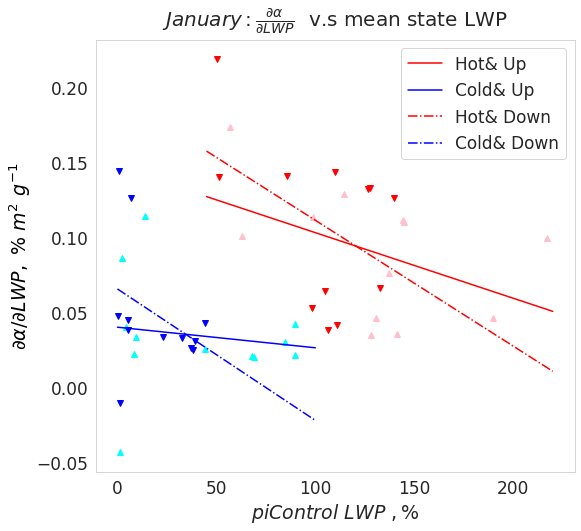

In [57]:
# Plotting: # d_lwp_d_ccf(s)
# Number of models currently
N = 12
# plot settings:
parameters = {'axes.labelsize': 19, 'legend.fontsize': 17,
       'axes.titlesize': 20, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig3 =  plt.figure(figsize=( 9.5, 6))

ax33 = fig3.add_axes([0,0,0.7,1])

mean_coldup_albedo = []
mean_hotup_albedo = []
mean_colddown_albedo = []
mean_hotdown_albedo = []

mean_coldup_LWP = []
mean_hotup_LWP = []
mean_colddown_LWP = []
mean_hotdown_LWP = []
layover_Hot_Up_PI = {}
layover_Cold_Up_PI = {}
layover_Hot_Down_PI = {}
layover_Cold_Down_PI = {}
rd_HotUp = {}
rd_ColdUp = {}
rd_HotDown = {}
rd_ColdDown = {}

Coef_albedo_lwp = []

mean_coldup_sst = []
mean_hotup_sst = []
mean_colddown_sst = []
mean_hotdown_sst = []
Coef_LWP_sst = []
mean_coldup_p_e = []
mean_hotup_p_e = []
mean_colddown_p_e = []
mean_hotdown_p_e = []
Coef_LWP_p_e = []
mean_coldup_lts = []
mean_hotup_lts = []
mean_colddown_lts = []
mean_hotdown_lts = []
Coef_LWP_lts = []
mean_coldup_sub = []
mean_hotup_sub = []
mean_colddown_sub = []
mean_hotdown_sub = []
Coef_LWP_sub = []

# area mean:
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9

# calc values:
variables_nas = ['albedo', 'LWP', 'SST', 'p_e', 'LTS', 'SUB']
for i in range(len(deck2)):
    # Save into regime-dependent mean_state LWP AREA_MEAN VALUES
    shape_of_3dPImd = output_4lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'].shape

    for k in range(len(variables_nas)):
        layover_Hot_Up_PI[variables_nas[k]] = output_4lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_Up_PI[variables_nas[k]] = output_4lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Hot_Down_PI[variables_nas[k]] = output_4lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_Down_PI[variables_nas[k]] = output_4lrm_flavra_PI[deck_nas2[i]][variables_nas[k]] * 1.
        
        layover_Hot_Up_PI[variables_nas[k]][logical_not(output_ind_Hot_Up_PI[deck_nas2[i]])] = nan
        layover_Cold_Up_PI[variables_nas[k]][logical_not(output_ind_Cold_Up_PI[deck_nas2[i]])] = nan
        layover_Hot_Down_PI[variables_nas[k]][logical_not(output_ind_Hot_Down_PI[deck_nas2[i]])] = nan
        layover_Cold_Down_PI[variables_nas[k]][logical_not(output_ind_Cold_Down_PI[deck_nas2[i]])] = nan

        rd_HotUp[variables_nas[k]] = layover_Hot_Up_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_ColdUp[variables_nas[k]] = layover_Cold_Up_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_HotDown[variables_nas[k]] = layover_Hot_Down_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_ColdDown[variables_nas[k]] = layover_Cold_Down_PI[variables_nas[k]].reshape(shape_of_3dPImd)
    
    # Save mean_state VARIABLES
    mean_hotup_albedo.append(nanmean(area_mean(rd_HotUp['albedo'], y_range, x_range)))
    mean_coldup_albedo.append(nanmean(area_mean(rd_ColdUp['albedo'], y_range, x_range)))
    mean_hotdown_albedo.append(nanmean(area_mean(rd_HotDown['albedo'], y_range, x_range)))
    mean_colddown_albedo.append(nanmean(area_mean(rd_ColdDown['albedo'], y_range, x_range)))
    mean_hotup_LWP.append(nanmean(area_mean(rd_HotUp['LWP'], y_range, x_range)))
    mean_coldup_LWP.append(nanmean(area_mean(rd_ColdUp['LWP'], y_range, x_range)))
    mean_hotdown_LWP.append(nanmean(area_mean(rd_HotDown['LWP'], y_range, x_range)))
    mean_colddown_LWP.append(nanmean(area_mean(rd_ColdDown['LWP'], y_range, x_range)))
    
    mean_hotup_sst.append(nanmean(area_mean(rd_HotUp['SST'], y_range, x_range)))
    mean_coldup_sst.append(nanmean(area_mean(rd_ColdUp['SST'], y_range, x_range)))
    mean_hotdown_sst.append(nanmean(area_mean(rd_HotDown['SST'], y_range, x_range)))
    mean_colddown_sst.append(nanmean(area_mean(rd_ColdDown['SST'], y_range, x_range)))
    mean_hotup_p_e.append(nanmean(area_mean(rd_HotUp['p_e'], y_range, x_range)))
    mean_coldup_p_e.append(nanmean(area_mean(rd_ColdUp['p_e'], y_range, x_range)))
    mean_hotdown_p_e.append(nanmean(area_mean(rd_HotDown['p_e'], y_range, x_range)))
    mean_colddown_p_e.append(nanmean(area_mean(rd_ColdDown['p_e'], y_range, x_range)))
    
    mean_hotup_lts.append(nanmean(area_mean(rd_HotUp['LTS'], y_range, x_range)))
    mean_coldup_lts.append(nanmean(area_mean(rd_ColdUp['LTS'], y_range, x_range)))
    mean_hotdown_lts.append(nanmean(area_mean(rd_HotDown['LTS'], y_range, x_range)))
    mean_colddown_lts.append(nanmean(area_mean(rd_ColdDown['LTS'], y_range, x_range)))
    mean_hotup_sub.append(nanmean(area_mean(rd_HotUp['SUB'], y_range, x_range)))
    mean_coldup_sub.append(nanmean(area_mean(rd_ColdUp['SUB'], y_range, x_range)))
    mean_hotdown_sub.append(nanmean(area_mean(rd_HotDown['SUB'], y_range, x_range)))
    mean_colddown_sub.append(nanmean(area_mean(rd_ColdDown['SUB'], y_range, x_range)))
    
    # Save Coef(s):
    Coef_albedo_lwp.append([stcoef11[i], stcoef12[i], stcoef13[i], stcoef14[i]])
    Coef_LWP_sst.append([stcoef_sst11[i], stcoef_sst12[i], stcoef_sst13[i], stcoef_sst14[i]])
    Coef_LWP_p_e.append([stcoef_qcon11[i], stcoef_qcon12[i], stcoef_qcon13[i], stcoef_qcon14[i]])
    Coef_LWP_lts.append([stcoef_stabil11[i], stcoef_stabil12[i], stcoef_stabil13[i], stcoef_stabil14[i]])
    Coef_LWP_sub.append([stcoef_sub50011[i], stcoef_sub50012[i], stcoef_sub50013[i], stcoef_sub50014[i]])

mean_hotup_LWP = 1000.* asarray(mean_hotup_LWP)
mean_coldup_LWP = 1000.* asarray(mean_coldup_LWP)
mean_hotdown_LWP = 1000.* asarray(mean_hotdown_LWP)
mean_colddown_LWP = 1000.* asarray(mean_colddown_LWP)

mean_hotup_albedo = 100.* asarray(mean_hotup_albedo)
mean_coldup_albedo = 100.* asarray(mean_coldup_albedo)
mean_hotdown_albedo = 100.* asarray(mean_hotdown_albedo)
mean_colddown_albedo = 100.* asarray(mean_colddown_albedo)

Coef_albedo_lwp = asarray(Coef_albedo_lwp).reshape(N, 4)/ 1000.
Coef_LWP_sst = asarray(Coef_LWP_sst).reshape(N, 4)
Coef_LWP_p_e = asarray(Coef_LWP_p_e).reshape(N, 4)
Coef_LWP_lts = asarray(Coef_LWP_lts).reshape(N, 4)
Coef_LWP_sub = asarray(Coef_LWP_sub).reshape(N, 4)

# print(mean_hotdown_p_e)


# d_albedo_d_lwp
# Hot
# ax33.plot(mean_hotup_LWP, Coef_albedo_lwp[:,1], marker = '^', c = 'pink', linestyle='None')
# ax33.plot(mean_hotdown_LWP, Coef_albedo_lwp[:,3], marker = 'v', c = 'r', linestyle='None')
# ax33.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$ \%$")
# # ax33.set_ylabel(r"$ Hot,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='r')

# # ax34 = ax33.twinx()
# # Cold
# ax33.plot(mean_coldup_LWP, Coef_albedo_lwp[:,0], marker = '^', c = 'cyan', linestyle = 'None')
# ax33.plot(mean_colddown_LWP, Coef_albedo_lwp[:,2], marker = 'v', c = 'b', linestyle = 'None')
# ax33.set_ylabel(r"$ \partial \alpha / \partial LWP,\ $" +r"$ \%\ m^{2}\ g^{-1}$", c = 'k')


# # d_lwp_d_sst
# # Hot
ax33.plot(mean_hotup_LWP, Coef_LWP_sst[:,1], marker = '^', c = 'pink', linestyle='None')
ax33.plot(mean_hotdown_LWP, Coef_LWP_sst[:,3], marker = 'v', c = 'r', linestyle='None')
ax33.set_xlabel(r"$ piControl\ LWP\ ,$" +r"$ g\ m^{-2}$")
# ax33.set_ylabel(r"$ Hot,\ \partial LWP/\partial SST \ _{Jan},$" +r"$ g\ m^{-2}\ K^{-1}$", c ='r')

# ax32 = ax33.twinx()
# Cold
ax33.plot(mean_coldup_LWP, Coef_LWP_sst[:,0], marker = '^', c = 'cyan', linestyle = 'None')
ax33.plot(mean_colddown_LWP, Coef_LWP_sst[:,2], marker = 'v', c = 'b', linestyle = 'None')
ax33.set_ylabel(r"$ \partial LWP/\partial SST,\ $"+r"$g\ m^{-2}\ K^{-1} $", c = 'k')


# fit curves:
# # d_albedo_d_lwp
# POPT_HotUp, POCV_HotUp = curve_fit(target_func_poly1, mean_hotup_LWP, Coef_albedo_lwp[:,1])
# POPT_ColdUp, POCV_ColdUp = curve_fit(target_func_poly1, mean_coldup_LWP, Coef_albedo_lwp[:,0])
# POPT_HotDown, POCV_HotDown = curve_fit(target_func_poly1, mean_hotdown_LWP, Coef_albedo_lwp[:,3])
# POPT_ColdDown, POCV_ColdDown = curve_fit(target_func_poly1, mean_colddown_LWP, Coef_albedo_lwp[:,2])

# # plot the fit line:
# # x = linspace(0., 190., 20)
# x1 = linspace(0., 100., 90)
# x2 = linspace(45., 220., 90)

# # fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2**2 + POPT_HotUp[1] * x2**1 + POPT_Hot[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1**2 + POPT_ColdUp[1] * x1**1 + POPT_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2**2 + POPT_HotDown[1] * x2**1 + POPT_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1**2 + POPT_ColdDown[1] * x1**1 + POPT_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

# fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2 + POPT_HotUp[1], c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1 + POPT_ColdUp[1], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2 + POPT_HotDown[1], c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1 + POPT_ColdDown[1], c = 'b', linestyle = '-.', label = 'Cold& Down')

# # fitp1 = ax33.plot(x2, (POPT_HotUp[0] * POPT_HotUp[1]**x2 + POPT_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, (POPT_ColdUp[0] * POPT_ColdUp[1]**x1 + POPT_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, (POPT_HotDown[0] * POPT_HotDown[1]**x2 + POPT_HotDown[2]), c = 'r', c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, (POPT_ColdDown[0] * POPT_ColdDown[1]**x1 + POPT_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')

# plt.legend()
# plt.title(r"$January: \frac{\partial \alpha}{\partial LWP}\ $" +" v.s mean state "+ "LWP ", pad = 14)


# d_albedo_d_lwp
POPT_ccf_HotUp, POCV_ccf_HotUp = curve_fit(target_func_poly1, mean_hotup_LWP, Coef_LWP_sst[:,1])
POPT_ccf_ColdUp, POCV_ccf_ColdUp = curve_fit(target_func_poly1, mean_coldup_LWP, Coef_LWP_sst[:,0])
POPT_ccf_HotDown, POCV_ccf_HotDown = curve_fit(target_func_poly1, mean_hotdown_LWP, Coef_LWP_sst[:,3])
POPT_ccf_ColdDown, POCV_ccf_ColdDown = curve_fit(target_func_poly1, mean_colddown_LWP, Coef_LWP_sst[:,2])

# plot the fit line:
# x = linspace(0., 190., 20)

x1 = linspace(0., 100., 90)
x12 = linspace(0., 55., 90)
x2 = linspace(45., 220, 90)
x22 = linspace(45., 150, 90)


# fitp1 = ax33.plot(x2, POPT_ccf_HotUp[0] * x2**2 + POPT_ccf_HotUp[1] * x2**1 + POPT_ccf_HotUp[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, POPT_ccf_ColdUp[0] * x1**2 + POPT_ccf_ColdUp[1] * x1**1 + POPT_ccf_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, POPT_ccf_HotDown[0] * x2**2 + POPT_ccf_HotDown[1] * x2**1 + POPT_ccf_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, POPT_ccf_ColdDown[0] * x**2 + POPT_ccf_ColdDown[1] * x1**1 + POPT_ccf_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

fitp1 = ax33.plot(x2, POPT_ccf_HotUp[0] * x2 + POPT_ccf_HotUp[1], c = 'r', linestyle = '-', label = ' Hot& Up')
fitp2 = ax33.plot(x1, POPT_ccf_ColdUp[0] * x1 + POPT_ccf_ColdUp[1], c = 'b', linestyle = '-', label = ' Cold& Up')
fitp3 = ax33.plot(x22, POPT_ccf_HotDown[0] * x22 + POPT_ccf_HotDown[1], c = 'r', linestyle = '-.', label = ' Hot& Down')
fitp4 = ax33.plot(x12, POPT_ccf_ColdDown[0] * x12 + POPT_ccf_ColdDown[1], c = 'b', linestyle = '-.', label = ' Cold& Down')

# fitp1 = ax33.plot(x2, (POPT_ccf_HotUp[0] * POPT_ccf_HotUp[1]**x2 + POPT_ccf_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, (POPT_ccf_ColdUp[0] * POPT_ccf_ColdUp[1]**x1 + POPT_ccf_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, (POPT_ccf_HotDown[0] * POPT_ccf_HotDown[1]**x2 + POPT_ccf_HotDown[2]), c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, (POPT_ccf_ColdDown[0] * POPT_ccf_ColdDown[1]**x1 + POPT_ccf_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')

plt.legend()
plt.title(r"$January: \frac{\partial LWP}{\partial SST}\ v.s\ mean\ state\ LWP $", pad = 14)

# plt.savefig(path6 +"plot_meanstatelwp_LWPqconv_4lrm.jpg", bbox_inches='tight', dpi = 150)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[ 21.60982071 145.07728596  66.00728229 102.20177108  86.03256366
 102.00187661  83.60137999  36.20901245  42.80596673  41.06247267
  41.81937602  67.4646742   27.4812142   27.25280199  73.4963239
  56.16912299  13.2237975   87.56201521  31.27095993  12.66671432
 100.74221509  98.91800984 122.73139403  97.60421744 147.10523886
  62.15437124  97.15699145 101.3359882   25.59738433  34.1133416 ]


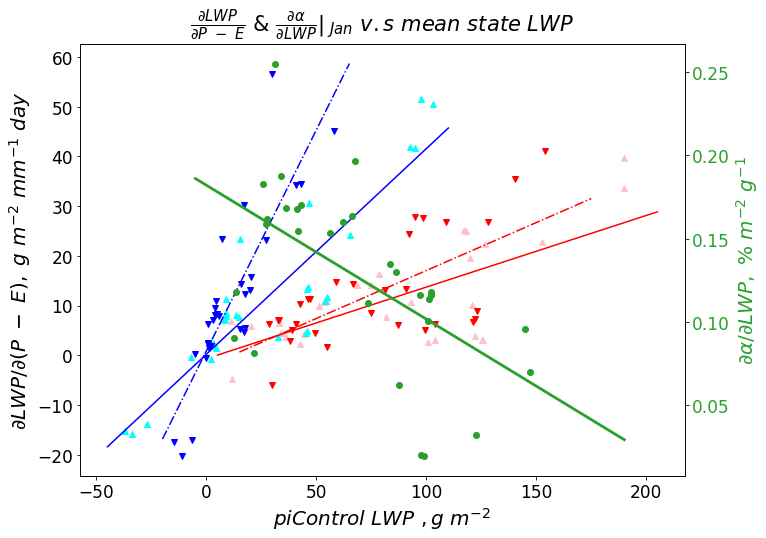

In [28]:
# mean_state_LWP v.s partial_alpha / partial_lwp & d_LWP/ d_ q_conv

# Plotting: # d_lwp_d_ccf(s)
# Number of models currently
N = 50
# plot settings:
parameters = {'axes.labelsize': 20, 'legend.fontsize': 18,
       'axes.titlesize': 21, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig3 =  plt.figure(figsize=(12, 6))

ax33 = fig3.add_axes([0,0,0.7,1])

mean_coldup_albedo = []
mean_hotup_albedo = []
mean_colddown_albedo = []
mean_hotdown_albedo = []

mean_coldup_LWP = []
mean_hotup_LWP = []
mean_colddown_LWP = []
mean_hotdown_LWP = []
layover_Hot_Up_PI = {}
layover_Cold_Up_PI = {}
layover_Hot_Down_PI = {}
layover_Cold_Down_PI = {}
rd_HotUp = {}
rd_ColdUp = {}
rd_HotDown = {}
rd_ColdDown = {}

Coef_albedo_lwp = []
mean_state_LWP = []

mean_coldup_sst = []
mean_hotup_sst = []
mean_colddown_sst = []
mean_hotdown_sst = []
Coef_LWP_sst = []
mean_coldup_p_e = []
mean_hotup_p_e = []
mean_colddown_p_e = []
mean_hotdown_p_e = []
Coef_LWP_p_e = []
mean_coldup_lts = []
mean_hotup_lts = []
mean_colddown_lts = []
mean_hotdown_lts = []
Coef_LWP_lts = []
mean_coldup_sub = []
mean_hotup_sub = []
mean_colddown_sub = []
mean_hotdown_sub = []
Coef_LWP_sub = []

# area mean:
x_range = arange(-180., 180., 5.)   #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9

# calc values:
variables_nas = ['albedo', 'LWP', 'SST', 'p_e', 'LTS', 'SUB']
for i in range(len(deck2)):
    # Save into regime-dependent mean_state LWP AREA_MEAN VALUES
    shape_of_3dPImd = shape_mon_pi[deck_nas2[i]]

    for k in range(len(variables_nas)):
        layover_Hot_Up_PI[variables_nas[k]] = output_4lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_Up_PI[variables_nas[k]] = output_4lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Hot_Down_PI[variables_nas[k]] = output_4lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_Down_PI[variables_nas[k]] = output_4lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        
        layover_Hot_Up_PI[variables_nas[k]][logical_not(output_ind_Hot_Up_PI[deck_nas2[i]])] = nan
        layover_Cold_Up_PI[variables_nas[k]][logical_not(output_ind_Cold_Up_PI[deck_nas2[i]])] = nan
        layover_Hot_Down_PI[variables_nas[k]][logical_not(output_ind_Hot_Down_PI[deck_nas2[i]])] = nan
        layover_Cold_Down_PI[variables_nas[k]][logical_not(output_ind_Cold_Down_PI[deck_nas2[i]])] = nan

        rd_HotUp[variables_nas[k]] = layover_Hot_Up_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_ColdUp[variables_nas[k]] = layover_Cold_Up_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_HotDown[variables_nas[k]] = layover_Hot_Down_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_ColdDown[variables_nas[k]] = layover_Cold_Down_PI[variables_nas[k]].reshape(shape_of_3dPImd)
    
    # Save mean_state VARIABLES
    mean_hotup_albedo.append(nanmean(area_mean(rd_HotUp['albedo'], y_range, x_range)))
    mean_coldup_albedo.append(nanmean(area_mean(rd_ColdUp['albedo'], y_range, x_range)))
    mean_hotdown_albedo.append(nanmean(area_mean(rd_HotDown['albedo'], y_range, x_range)))
    mean_colddown_albedo.append(nanmean(area_mean(rd_ColdDown['albedo'], y_range, x_range)))
    
    mean_state_LWP.append(nanmean(area_mean(output_4lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'], y_range, x_range)))
    mean_hotup_LWP.append(nanmean(area_mean(rd_HotUp['LWP'], y_range, x_range)))
    mean_coldup_LWP.append(nanmean(area_mean(rd_ColdUp['LWP'], y_range, x_range)))
    mean_hotdown_LWP.append(nanmean(area_mean(rd_HotDown['LWP'], y_range, x_range)))
    mean_colddown_LWP.append(nanmean(area_mean(rd_ColdDown['LWP'], y_range, x_range)))
    
    mean_hotup_sst.append(nanmean(area_mean(rd_HotUp['SST'], y_range, x_range)))
    mean_coldup_sst.append(nanmean(area_mean(rd_ColdUp['SST'], y_range, x_range)))
    mean_hotdown_sst.append(nanmean(area_mean(rd_HotDown['SST'], y_range, x_range)))
    mean_colddown_sst.append(nanmean(area_mean(rd_ColdDown['SST'], y_range, x_range)))
    mean_hotup_p_e.append(nanmean(area_mean(rd_HotUp['p_e'], y_range, x_range)))
    mean_coldup_p_e.append(nanmean(area_mean(rd_ColdUp['p_e'], y_range, x_range)))
    mean_hotdown_p_e.append(nanmean(area_mean(rd_HotDown['p_e'], y_range, x_range)))
    mean_colddown_p_e.append(nanmean(area_mean(rd_ColdDown['p_e'], y_range, x_range)))
    
    mean_hotup_lts.append(nanmean(area_mean(rd_HotUp['LTS'], y_range, x_range)))
    mean_coldup_lts.append(nanmean(area_mean(rd_ColdUp['LTS'], y_range, x_range)))
    mean_hotdown_lts.append(nanmean(area_mean(rd_HotDown['LTS'], y_range, x_range)))
    mean_colddown_lts.append(nanmean(area_mean(rd_ColdDown['LTS'], y_range, x_range)))
    mean_hotup_sub.append(nanmean(area_mean(rd_HotUp['SUB'], y_range, x_range)))
    mean_coldup_sub.append(nanmean(area_mean(rd_ColdUp['SUB'], y_range, x_range)))
    mean_hotdown_sub.append(nanmean(area_mean(rd_HotDown['SUB'], y_range, x_range)))
    mean_colddown_sub.append(nanmean(area_mean(rd_ColdDown['SUB'], y_range, x_range)))
    
    # Save Coef(s):
    Coef_albedo_lwp.append([stcoef_albedo1[i]])
    Coef_LWP_sst.append([stcoef_sst11[i], stcoef_sst12[i], stcoef_sst13[i], stcoef_sst14[i]])
    Coef_LWP_p_e.append([stcoef_qcon11[i], stcoef_qcon12[i], stcoef_qcon13[i], stcoef_qcon14[i]])
    Coef_LWP_lts.append([stcoef_stabil11[i], stcoef_stabil12[i], stcoef_stabil13[i], stcoef_stabil14[i]])
    Coef_LWP_sub.append([stcoef_sub50011[i], stcoef_sub50012[i], stcoef_sub50013[i], stcoef_sub50014[i]])

mean_state_LWP = 1000.* asarray(mean_state_LWP)
print(mean_state_LWP)
mean_hotup_LWP = 1000.* asarray(mean_hotup_LWP)
mean_coldup_LWP = 1000.* asarray(mean_coldup_LWP)
mean_hotdown_LWP = 1000.* asarray(mean_hotdown_LWP)
mean_colddown_LWP = 1000.* asarray(mean_colddown_LWP)

mean_hotup_albedo = 100.* asarray(mean_hotup_albedo)
mean_coldup_albedo = 100.* asarray(mean_coldup_albedo)
mean_hotdown_albedo = 100.* asarray(mean_hotdown_albedo)
mean_colddown_albedo = 100.* asarray(mean_colddown_albedo)

Coef_albedo_lwp = asarray(Coef_albedo_lwp).reshape(N)/ 1000.

Coef_LWP_sst = asarray(Coef_LWP_sst).reshape(N, 4)
Coef_LWP_p_e = asarray(Coef_LWP_p_e).reshape(N, 4)
Coef_LWP_lts = asarray(Coef_LWP_lts).reshape(N, 4)
Coef_LWP_sub = asarray(Coef_LWP_sub).reshape(N, 4)

# print(mean_hotdown_p_e)


# d_albedo_d_lwp
# Hot
# ax33.plot(mean_hotup_LWP, Coef_albedo_lwp[:,1], marker = '^', c = 'pink', linestyle='None')
# ax33.plot(mean_hotdown_LWP, Coef_albedo_lwp[:,3], marker = 'v', c = 'r', linestyle='None')
# ax33.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$ \%$")
# # ax33.set_ylabel(r"$ Hot,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='r')

# # ax34 = ax33.twinx()
# # Cold
# ax33.plot(mean_coldup_LWP, Coef_albedo_lwp[:,0], marker = '^', c = 'cyan', linestyle = 'None')
# ax33.plot(mean_colddown_LWP, Coef_albedo_lwp[:,2], marker = 'v', c = 'b', linestyle = 'None')
# ax33.set_ylabel(r"$ \partial \alpha / \partial LWP,\ $" +r"$ \%\ m^{2}\ g^{-1}$", c = 'k')


# # d_lwp_d_sst
# # Hot
ax33.plot(mean_hotup_LWP, Coef_LWP_p_e[:,1], marker = '^', c = 'pink', linestyle='None')
ax33.plot(mean_hotdown_LWP, Coef_LWP_p_e[:,3], marker = 'v', c = 'r', linestyle='None')
ax33.set_xlabel(r"$ piControl\ LWP\ ,$" +r"$ g\ m^{-2}$")
# ax33.set_ylabel(r"$ Hot,\ \partial LWP/\partial SST \ _{Jan},$" +r"$ g\ m^{-2}\ K^{-1}$", c ='r')

# ax32 = ax33.twinx()
# Cold
ax33.plot(mean_coldup_LWP, Coef_LWP_p_e[:,0], marker = '^', c = 'cyan', linestyle = 'None')
ax33.plot(mean_colddown_LWP, Coef_LWP_p_e[:,2], marker = 'v', c = 'b', linestyle = 'None')
ax33.set_ylabel(r"$ \partial LWP/\partial (P\ -\ E),\ $"+r"$g\ m^{-2}\ mm^{-1}\ day $", c = 'k')

ax34 = ax33.twinx()
color = 'tab:green'
ax34.set_ylabel(r"$ \partial \alpha/ \partial LWP,\ \%\ m^{-2}\ g^{-1}$", color=color)  # we already handled the x-label with ax1
ax34.plot(mean_state_LWP, Coef_albedo_lwp, marker = 'o', c = 'tab:green', linestyle = 'None')
ax34.tick_params(axis='y', labelcolor=color)
# fit curves:
# # d_albedo_d_lwp
# POPT_HotUp, POCV_HotUp = curve_fit(target_func_poly1, mean_hotup_LWP, Coef_albedo_lwp[:,1])
# POPT_ColdUp, POCV_ColdUp = curve_fit(target_func_poly1, mean_coldup_LWP, Coef_albedo_lwp[:,0])
# POPT_HotDown, POCV_HotDown = curve_fit(target_func_poly1, mean_hotdown_LWP, Coef_albedo_lwp[:,3])
# POPT_ColdDown, POCV_ColdDown = curve_fit(target_func_poly1, mean_colddown_LWP, Coef_albedo_lwp[:,2])

# # plot the fit line:
# # x = linspace(0., 190., 20)
# x1 = linspace(0., 100., 90)
# x2 = linspace(45., 220., 90)

# # fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2**2 + POPT_HotUp[1] * x2**1 + POPT_Hot[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1**2 + POPT_ColdUp[1] * x1**1 + POPT_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2**2 + POPT_HotDown[1] * x2**1 + POPT_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1**2 + POPT_ColdDown[1] * x1**1 + POPT_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

# fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2 + POPT_HotUp[1], c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1 + POPT_ColdUp[1], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2 + POPT_HotDown[1], c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1 + POPT_ColdDown[1], c = 'b', linestyle = '-.', label = 'Cold& Down')

# # fitp1 = ax33.plot(x2, (POPT_HotUp[0] * POPT_HotUp[1]**x2 + POPT_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, (POPT_ColdUp[0] * POPT_ColdUp[1]**x1 + POPT_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, (POPT_HotDown[0] * POPT_HotDown[1]**x2 + POPT_HotDown[2]), c = 'r', c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, (POPT_ColdDown[0] * POPT_ColdDown[1]**x1 + POPT_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')

# plt.legend()
# plt.title(r"$January: \frac{\partial \alpha}{\partial LWP}\ $" +" v.s mean state "+ "LWP ", pad = 14)


# d_lwp_d_CCF
POPT_ccf_HotUp, POCV_ccf_HotUp = curve_fit(target_func_poly1, mean_hotup_LWP, Coef_LWP_p_e[:,1])
POPT_ccf_ColdUp, POCV_ccf_ColdUp = curve_fit(target_func_poly1, mean_coldup_LWP, Coef_LWP_p_e[:,0])
POPT_ccf_HotDown, POCV_ccf_HotDown = curve_fit(target_func_poly1, mean_hotdown_LWP, Coef_LWP_p_e[:,3])
POPT_ccf_ColdDown, POCV_ccf_ColdDown = curve_fit(target_func_poly1, mean_colddown_LWP, Coef_LWP_p_e[:,2])

# a_albedo_a_lwp
POPT_alphalwp, POCV_alphalwp = curve_fit(target_func_poly1, mean_state_LWP, Coef_albedo_lwp)

# partial_albedo_partial_LWP
# plot the fit line:

x1 = linspace(-45., 110., 90)
x12 = linspace(-20., 65., 90)
x2 = linspace(5., 205, 90)
x22 = linspace(15., 175., 90)

x = linspace(-5., 190., 40)
# fitp1 = ax33.plot(x2, POPT_ccf_HotUp[0] * x2**2 + POPT_ccf_HotUp[1] * x2**1 + POPT_ccf_HotUp[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, POPT_ccf_ColdUp[0] * x1**2 + POPT_ccf_ColdUp[1] * x1**1 + POPT_ccf_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, POPT_ccf_HotDown[0] * x2**2 + POPT_ccf_HotDown[1] * x2**1 + POPT_ccf_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, POPT_ccf_ColdDown[0] * x**2 + POPT_ccf_ColdDown[1] * x1**1 + POPT_ccf_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

fitp1 = ax33.plot(x2, POPT_ccf_HotUp[0] * x2 + POPT_ccf_HotUp[1], c = 'r', linestyle = '-', label = ' Hot& Up')
fitp2 = ax33.plot(x1, POPT_ccf_ColdUp[0] * x1 + POPT_ccf_ColdUp[1], c = 'b', linestyle = '-', label = ' Cold& Up')
fitp3 = ax33.plot(x22, POPT_ccf_HotDown[0] * x22 + POPT_ccf_HotDown[1], c = 'r', linestyle = '-.', label = ' Hot& Down')
fitp4 = ax33.plot(x12, POPT_ccf_ColdDown[0] * x12 + POPT_ccf_ColdDown[1], c = 'b', linestyle = '-.', label = ' Cold& Down')
# plt.legend()
fitt1 = ax34.plot(x, POPT_alphalwp[0] * x + POPT_alphalwp[1], c = 'tab:green', linestyle = '-', linewidth = 2.8, label = r'$ \partial \alpha / \partial LWP$')
# fitp1 = ax33.plot(x2, (POPT_ccf_HotUp[0] * POPT_ccf_HotUp[1]**x2 + POPT_ccf_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, (POPT_ccf_ColdUp[0] * POPT_ccf_ColdUp[1]**x1 + POPT_ccf_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, (POPT_ccf_HotDown[0] * POPT_ccf_HotDown[1]**x2 + POPT_ccf_HotDown[2]), c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, (POPT_ccf_ColdDown[0] * POPT_ccf_ColdDown[1]**x1 + POPT_ccf_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')
# 
# plt.legend()
plt.title(r"$ \frac{\partial LWP}{\partial P\ -\ E}$"+' & '+r"$ \frac{\partial \alpha}{\partial LWP}|_{\ Jan}\ v.s\ mean\ state\ LWP $", pad = 14)

# plt.savefig(path6+"plot_meanstatelwp_LWPqconv_RE_4lrm.jpg", bbox_inches='tight', dpi = 400)

In [11]:
# Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Hot

sigmaalbedo_r1 = full((len(deck2)), 0.00) # Cold
sigmaalbedo_r2 = full((len(deck2)), 0.00) # Hot

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Hot
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

sigmaalbedo_ALL = full((len(deck2)), 0.00) # Southern Ocean as a whole

In [12]:

for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaalbedo_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Cold_PI])
    sigmaalbedo_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    sigmaalbedo_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][logical_or(ind_Hot_PI, ind_Cold_PI)])

print(sigmaXi_r1.shape)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


(50, 4)


(50,)


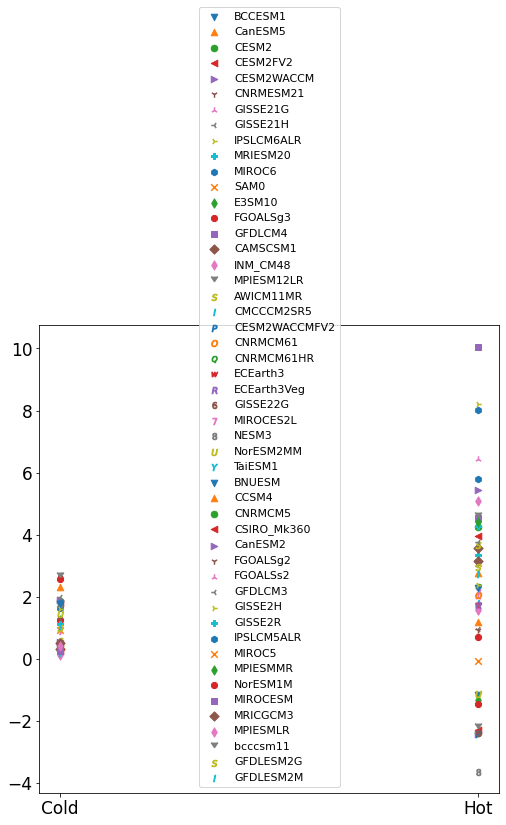

In [14]:
# coefs: 2 lrm
###  GCM output and LRM regressed: d(LWP)|abr - mean(pi)

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig2, ax2 = plt.subplots(1, 1, figsize =(8.24, 8.6))  # (16.2, 9.3))


b = "2 LRM"
x_15yr = linspace(0.0005, 0.018, 50) *1000.  #..15 yr
y_15yr = x_15yr
x = linspace(0.002, 0.034, 50) *1000.   # for all 150yr
y = x

deck_marker = ['v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D', 'd', 7, 
     '$S$', '$I$', '$P$', '$O$', '$Q$', '$W$', '$R$', '$6$', '$7$', '$8$', '$U$', '$Y$', 
              'v', '^', 'o', '<', '>', '1', '2', '3', '4', 'P', 'h', 'x', 'd', '8', 's', 'D', 'd', 7, 
     '$S$', '$I$']
# n_name  =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# put into pandas DataFrame structure:

stcoef_albedo1 = []

stcoef_sst11 = []
stcoef_sst12 = []

stcoef_qcon11 = []
stcoef_qcon12 = []

stcoef_stabil11 = []
stcoef_stabil12 = []

stcoef_sub50011 = []
stcoef_sub50012 = []

# print(output_2lrm_coef_LWP[deck_nas2[9]])

for i in arange(len(deck_nas2)):

    stcoef_albedo1.append(output_2lrm_dict_Albedo[deck_nas2[i]]['15.0'][0])

    stcoef_sst11.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][0])
    stcoef_sst12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][0]) 

    stcoef_qcon11.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][1])
    stcoef_qcon12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][1])

    stcoef_stabil11.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][2])
    stcoef_stabil12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][2])

    stcoef_sub50011.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][3])
    stcoef_sub50012.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][3])
    
stcoef_albedo1 = asarray(stcoef_albedo1) * 100.#  * sigmaLWP_ALL
print(stcoef_albedo1.shape)

stcoef_sst11 = asarray(stcoef_sst11) * 1000. # * sigmaXi_r1[:,0]
stcoef_sst12 = asarray(stcoef_sst12) * 1000. # * sigmaXi_r2[:,0]

stcoef_qcon11 = asarray(stcoef_qcon11) * 1000. # * sigmaXi_r1[:,1]
stcoef_qcon12 = asarray(stcoef_qcon12) * 1000. # * sigmaXi_r2[:,1]
# print(stcoef_qcon12)

stcoef_stabil11 = asarray(stcoef_stabil11) * 1000. # * sigmaXi_r1[:,2]
stcoef_stabil12 = asarray(stcoef_stabil12) * 1000. # * sigmaXi_r2[:,2]

stcoef_sub50011 = asarray(stcoef_sub50011) * 1000. # * sigmaXi_r1[:,3]
stcoef_sub50012 = asarray(stcoef_sub50012) * 1000. # * sigmaXi_r2[:,3]

# d1 = {'col1': arange(0, 50), 'value': stcoef_albedo1.ravel(), 'Regimes': array(['All REGIME avg']*50)}
# data1  = pd.DataFrame(data=d1, index=arange(0, 50*1))

# print(asarray([stcoef2, stcoef1]).reshape(2, 30))

for j in arange(len(deck_nas2)):
    
    plt.scatter([1, 2], [stcoef_sst11[j], stcoef_sst12[j]], marker = deck_marker[j], label = deck_nas2[j], s= 43)
plt.xticks([1,2], ['Cold', 'Hot'])
plt.legend()

plt.show()
# plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

# plt.savefig(path6+ "plot_Coef_4lrm_Jandalbedodlwp", dpi = 250)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


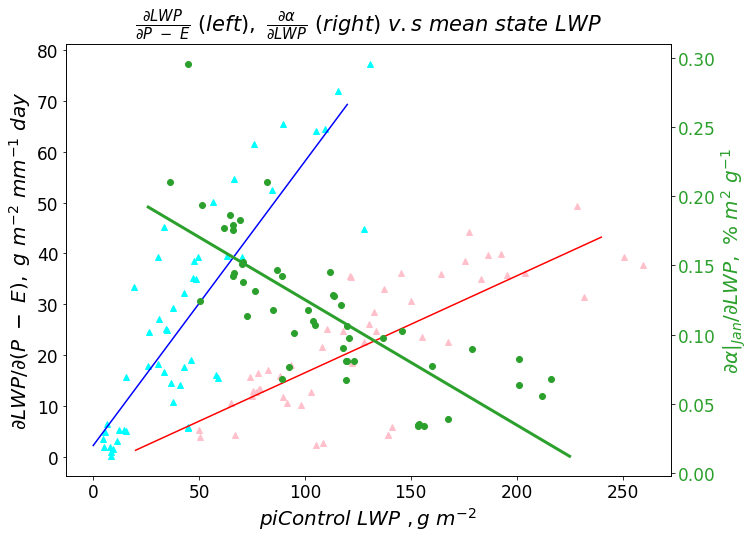

In [15]:
# mean_state_LWP v.s partial_alpha / partial_lwp & d_LWP/ d_ q_conv

# Plotting: # d_lwp_d_ccf(s)
# Number of models currently
N = 50
# plot settings:
parameters = {'axes.labelsize': 20, 'legend.fontsize': 18,
       'axes.titlesize': 21, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig3 =  plt.figure(figsize=(12, 6))

ax33 = fig3.add_axes([0,0,0.7,1])
Coef_albedo_lwp = []
mean_Cold_albedo = []
mean_Hot_albedo = []
mean_Cold_LWP = []
mean_Hot_LWP = []
mean_state_albedo = []
mean_state_LWP = []
mean_state_sst = []
mean_state_P_E = []
mean_state_lts = []
mean_state_sub500 = []

layover_Cold_PI = {}
layover_Hot_PI = {}

rd_Cold = {}
rd_Hot = {}

mean_Cold_sst = []
mean_Hot_sst = []
Coef_LWP_sst = []

mean_Cold_p_e = []
mean_Hot_p_e = []
Coef_LWP_p_e = []

mean_Cold_lts = []
mean_Hot_lts = []
Coef_LWP_lts = []

mean_Cold_sub = []
mean_Hot_sub = []
Coef_LWP_sub = []

# area mean:
x_range = arange(-180., 180., 5.)   #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9

# calc values:
variables_nas = ['albedo', 'LWP', 'SST', 'p_e', 'LTS', 'SUB']
for i in range(len(deck2)):
    # Save into regime-dependent mean_state LWP AREA_MEAN VALUES
    shape_of_3dPImd = shape_mon_pi[deck_nas2[i]]

    for k in range(len(variables_nas)):
        layover_Hot_PI[variables_nas[k]] = output_2lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        layover_Cold_PI[variables_nas[k]] = output_2lrm_metric_actual_PI[deck_nas2[i]][variables_nas[k]] * 1.
        
        layover_Hot_PI[variables_nas[k]][logical_not(output_ind_Hot_PI[deck_nas2[i]])] = nan
        layover_Cold_PI[variables_nas[k]][logical_not(output_ind_Cold_PI[deck_nas2[i]])] = nan
        
        rd_Cold[variables_nas[k]] = layover_Cold_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        rd_Hot[variables_nas[k]] = layover_Hot_PI[variables_nas[k]].reshape(shape_of_3dPImd)
        
    # Save mean_state VARIABLES
    mean_state_albedo = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['albedo_mon_bin'], y_range, x_range))
    mean_Cold_albedo.append(nanmean(area_mean(rd_Cold['albedo'], y_range, x_range)) + mean_state_albedo)
    mean_Hot_albedo.append(nanmean(area_mean(rd_Hot['albedo'], y_range, x_range)) + mean_state_albedo)
    
    mean_state_LWP.append(nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'], y_range, x_range)))
    a = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'], y_range, x_range))
    mean_Cold_LWP.append(nanmean(area_mean(rd_Cold['LWP'], y_range, x_range)) + a)
    mean_Hot_LWP.append(nanmean(area_mean(rd_Hot['LWP'], y_range, x_range)) + a)
    
    mean_state_sst = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'], y_range, x_range))
    mean_Cold_sst.append(nanmean(area_mean(rd_Cold['SST'], y_range, x_range)) + mean_state_sst)
    mean_Hot_sst.append(nanmean(area_mean(rd_Hot['SST'], y_range, x_range)) + mean_state_sst)
    
    mean_state_P_E = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['p_e_mon_bin'], y_range, x_range))
    mean_Cold_p_e.append(nanmean(area_mean(rd_Cold['p_e'], y_range, x_range)) + mean_state_P_E)
    mean_Hot_p_e.append(nanmean(area_mean(rd_Hot['p_e'], y_range, x_range)) + mean_state_P_E)
    
    mean_state_lts = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LTS_mon_bin'], y_range, x_range))
    mean_Cold_lts.append(nanmean(area_mean(rd_Cold['LTS'], y_range, x_range)) + mean_state_lts)
    mean_Hot_lts.append(nanmean(area_mean(rd_Hot['LTS'], y_range, x_range)) + mean_state_lts)
    
    mean_state_sub500 = nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'], y_range, x_range))
    mean_Cold_sub.append(nanmean(area_mean(rd_Cold['SUB'], y_range, x_range)) + mean_state_sub500)
    mean_Hot_sub.append(nanmean(area_mean(rd_Hot['SUB'], y_range, x_range)) + mean_state_sub500)
    
    # Save Coef(s):
    Coef_albedo_lwp.append([stcoef_albedo1[i]])
    Coef_LWP_sst.append([stcoef_sst11[i], stcoef_sst12[i]])
    Coef_LWP_p_e.append([stcoef_qcon11[i], stcoef_qcon12[i]])
    Coef_LWP_lts.append([stcoef_stabil11[i], stcoef_stabil12[i]])
    Coef_LWP_sub.append([stcoef_sub50011[i], stcoef_sub50012[i]])

mean_state_LWP = 1000.* asarray(mean_state_LWP)
mean_Cold_LWP = 1000.* asarray(mean_Cold_LWP)
mean_Hot_LWP = 1000.* asarray(mean_Hot_LWP)

mean_Cold_albedo = 100.* asarray(mean_Cold_albedo)
mean_Hot_albedo = 100.* asarray(mean_Hot_albedo)
Coef_albedo_lwp = asarray(Coef_albedo_lwp).reshape(N) /1000.

Coef_LWP_sst = asarray(Coef_LWP_sst).reshape(N, 2)
Coef_LWP_p_e = asarray(Coef_LWP_p_e).reshape(N, 2)
Coef_LWP_lts = asarray(Coef_LWP_lts).reshape(N, 2)
Coef_LWP_sub = asarray(Coef_LWP_sub).reshape(N, 2)

# print(mean_hotdown_p_e)

# d_albedo_d_lwp
# Hot
# ax33.plot(mean_hotup_LWP, Coef_albedo_lwp[:,1], marker = '^', c = 'pink', linestyle='None')
# ax33.plot(mean_hotdown_LWP, Coef_albedo_lwp[:,3], marker = 'v', c = 'r', linestyle='None')
# ax33.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$ \%$")
# # ax33.set_ylabel(r"$ Hot,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='r')

# # ax34 = ax33.twinx()
# # Cold
# ax33.plot(mean_coldup_LWP, Coef_albedo_lwp[:,0], marker = '^', c = 'cyan', linestyle = 'None')
# ax33.plot(mean_colddown_LWP, Coef_albedo_lwp[:,2], marker = 'v', c = 'b', linestyle = 'None')
# ax33.set_ylabel(r"$ \partial \alpha / \partial LWP,\ $" +r"$ \%\ m^{2}\ g^{-1}$", c = 'k')


# # d_lwp_d_sst
# Cold
ax33.plot(mean_Cold_LWP, Coef_LWP_p_e[:,0], marker = '^', c = 'cyan', linestyle = 'None')

# Hot
ax33.plot(mean_Hot_LWP, Coef_LWP_p_e[:,1], marker = '^', c = 'pink', linestyle='None')
ax33.set_xlabel(r"$ piControl\ LWP\ ,$" +r"$ g\ m^{-2}$")
ax33.set_ylabel(r"$ \partial LWP/\partial (P\ -\ E),\ $"+r"$g\ m^{-2}\ mm^{-1}\ day$", c = 'k')  # \ mm^{-1}\ day\ mm^{-1}\ day \ std.dev^{-1}
# ax33.set_ylabel(r"$ Hot,\ \partial LWP/\partial SST \ _{Jan},$" +r"$ g\ m^{-2}\ K^{-1}$", c ='r')

# ax32 = ax33.twinx()

ax34 = ax33.twinx()

color = 'tab:green'
ax34.plot(mean_state_LWP, Coef_albedo_lwp, marker = 'o', c = 'tab:green', linestyle = 'None')
ax34.tick_params(axis='y', labelcolor=color)
ax34.set_ylabel(r"$ \partial \alpha|_{Jan}/ \partial LWP,\ \%\ m^{2}\ g^{-1}$", color=color)  # we already handled the x-label with ax1  #  \ std.dev^{-1}(LWP)

# fit curves:
# # d_albedo_d_lwp
# POPT_HotUp, POCV_HotUp = curve_fit(target_func_poly1, mean_hotup_LWP, Coef_albedo_lwp[:,1])
# POPT_ColdUp, POCV_ColdUp = curve_fit(target_func_poly1, mean_coldup_LWP, Coef_albedo_lwp[:,0])
# POPT_HotDown, POCV_HotDown = curve_fit(target_func_poly1, mean_hotdown_LWP, Coef_albedo_lwp[:,3])
# POPT_ColdDown, POCV_ColdDown = curve_fit(target_func_poly1, mean_colddown_LWP, Coef_albedo_lwp[:,2])

# # plot the fit line:
# # x = linspace(0., 190., 20)
# x1 = linspace(0., 100., 90)
# x2 = linspace(45., 220., 90)

# # fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2**2 + POPT_HotUp[1] * x2**1 + POPT_Hot[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1**2 + POPT_ColdUp[1] * x1**1 + POPT_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2**2 + POPT_HotDown[1] * x2**1 + POPT_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1**2 + POPT_ColdDown[1] * x1**1 + POPT_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

# fitp1 = ax33.plot(x2, POPT_HotUp[0] * x2 + POPT_HotUp[1], c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax33.plot(x1, POPT_ColdUp[0] * x1 + POPT_ColdUp[1], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax33.plot(x2, POPT_HotDown[0] * x2 + POPT_HotDown[1], c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax33.plot(x1, POPT_ColdDown[0] * x1 + POPT_ColdDown[1], c = 'b', linestyle = '-.', label = 'Cold& Down')

# # fitp1 = ax33.plot(x2, (POPT_HotUp[0] * POPT_HotUp[1]**x2 + POPT_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# # fitp2 = ax33.plot(x1, (POPT_ColdUp[0] * POPT_ColdUp[1]**x1 + POPT_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# # fitp3 = ax33.plot(x2, (POPT_HotDown[0] * POPT_HotDown[1]**x2 + POPT_HotDown[2]), c = 'r', c = 'r', linestyle = '-.', label = 'Hot& Down')
# # fitp4 = ax33.plot(x1, (POPT_ColdDown[0] * POPT_ColdDown[1]**x1 + POPT_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')

# plt.legend()
# plt.title(r"$January: \frac{\partial \alpha}{\partial LWP}\ $" +" v.s mean state "+ "LWP ", pad = 14)


# d_lwp_d_CCF

POPT_ccf_Cold, POCV_ccf_Cold = curve_fit(target_func_poly1, mean_Cold_LWP, Coef_LWP_p_e[:,0])
POPT_ccf_Hot, POCV_ccf_Hot = curve_fit(target_func_poly1, mean_Hot_LWP, Coef_LWP_p_e[:,1])

# a_albedo_a_lwp
POPT_alphalwp, POCV_alphalwp = curve_fit(target_func_poly1, mean_state_LWP, Coef_albedo_lwp)

# partial_albedo_partial_LWP
# plot the fit line:

x1 = linspace(-0., 120., 90)
x2 = linspace(20., 240., 90)

x = linspace(26., 225., 70)
fitp2 = ax33.plot(x1, POPT_ccf_Cold[0] * x1 + POPT_ccf_Cold[1], c = 'b', linestyle = '-', label = ' Cold')
fitp1 = ax33.plot(x2, POPT_ccf_Hot[0] * x2 + POPT_ccf_Hot[1], c = 'r', linestyle = '-', label = ' Hot')

# plt.legend()
fitt1 = ax34.plot(x, POPT_alphalwp[0] * x + POPT_alphalwp[1], c = 'tab:green', linestyle = '-', linewidth = 3, label = r'$ \partial \alpha / \partial LWP$')

# plt.legend()
plt.title(r"$ \frac{\partial LWP}{\partial P\ -\ E}\ (left),$" + r"$\ \frac{\partial \alpha}{\partial LWP}\ (right)\ v.s\ mean\ state\ LWP $", pad = 14)
plt.savefig(path6+"plot_meanstatelwp_LWPqconv_RE_2lrm_RElwp(95).jpg", bbox_inches='tight', dpi = 425)  # _stdedcoef

[164.50101228  84.13347156 124.51628608 101.9350337  125.23485804
  48.60822548 110.68393117 107.82016188 103.00498497 111.85319856
 153.0851777   45.17702179]
[[ 0.02179846  0.09989634  0.03308461  0.12652694]
 [ 0.08649709  0.1137628   0.14427326  0.14111305]
 [ 0.0204745   0.11014582  0.02495751  0.1324161 ]
 [ 0.02553227  0.12865076  0.0332716   0.14392744]
 [ 0.02067964  0.11149554  0.02632832  0.13321437]
 [ 0.11438737  0.10117724  0.12620084  0.140509  ]
 [ 0.04238969  0.03544317  0.04311692  0.04141443]
 [ 0.02997992  0.04611035  0.03083299  0.05316325]
 [ 0.04021557  0.03496294  0.04732909  0.03817418]
 [ 0.06184692  0.07593595  0.04468862  0.08031946]
 [-0.04330219  0.04632662 -0.01040365  0.06598224]
 [ 0.0337874   0.17372863  0.03852302  0.21878185]]


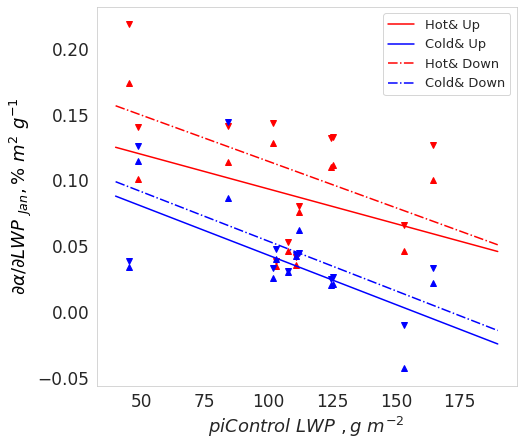

In [52]:
# Plotting: # d_albedo_d_lwp
# Number of models currently
N = 12

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 13, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig3 =  plt.figure(figsize=(8.34, 5.26))

ax31 = fig3.add_axes([0,0,0.7,1])

mean_LWP = []
Coef_albedo_lwp = []

# area mean:
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9

#plt.scatter([1, 2], [stcoef2[j], stcoef1[j]], marker = deck_marker[j], label = deck_nas2[j], s= 48)

# plt.xticks([1, 2], ['Hot', 'Cold'])
# plt.legend()
# plt.title(b + r"$\ Coef\ of\ \frac{\Delta albedo} {\Delta lwp},\ Unit\ in\ \frac{\%}{Kg*m^{-2}}$")

for i in range(len(deck2)):
    
    mean_LWP.append(nanmean(area_mean(output_2lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'], y_range, x_range)))
    Coef_albedo_lwp.append([stcoef11[i], stcoef12[i], stcoef13[i], stcoef14[i]])
    
mean_LWP = 1000.* asarray(mean_LWP)
Coef_albedo_lwp = asarray(Coef_albedo_lwp).reshape(N, 4)/ 1000.
print(mean_LWP)
print(Coef_albedo_lwp)

# d_albedo_d_lwp
# Hot
ax31.plot(mean_LWP, Coef_albedo_lwp[:,1], marker = '^', c = 'r', linestyle='None')
ax31.plot(mean_LWP, Coef_albedo_lwp[:,3], marker = 'v', c = 'r', linestyle='None')
ax31.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$g\ m^{-2}$")
# ax31.set_ylabel(r"$ Hot,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='r')

# ax32 = ax31.twinx()
# Cold
ax31.plot(mean_LWP, Coef_albedo_lwp[:,0], marker = '^', c = 'b', linestyle = 'None')
ax31.plot(mean_LWP, Coef_albedo_lwp[:,2], marker = 'v', c = 'b', linestyle = 'None')
ax31.set_ylabel(r"$ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='k')


# fit curves:
# d_albedo_d_lwp
POPT_HotUp, POCV_HotUp = curve_fit(target_func_poly1, mean_LWP, Coef_albedo_lwp[:,1])
POPT_ColdUp, POCV_ColdUp = curve_fit(target_func_poly1, mean_LWP, Coef_albedo_lwp[:,0])
POPT_HotDown, POCV_HotDown = curve_fit(target_func_poly1, mean_LWP, Coef_albedo_lwp[:,3])
POPT_ColdDown, POCV_ColdDown = curve_fit(target_func_poly1, mean_LWP, Coef_albedo_lwp[:,2])

# plot the fit line:
x = linspace(40., 190., 20)

# fitp1 = ax31.plot(x, POPT_HotUp[0] * x**2 + POPT_HotUp[1] * x**1 + POPT_Hot[2] , c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax31.plot(x, POPT_ColdUp[0] * x**2 + POPT_ColdUp[1] * x**1 + POPT_ColdUp[2], c = 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax31.plot(x, POPT_HotDown[0] * x**2 + POPT_HotDown[1] * x**1 + POPT_HotDown[2] , c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax31.plot(x, POPT_ColdDown[0] * x**2 + POPT_ColdDown[1] * x**1 + POPT_ColdDown[2], c = 'b', linestyle = '-.', label = 'Cold& Down')

fitp1 = ax31.plot(x, POPT_HotUp[0] * x + POPT_HotUp[1], c = 'r', linestyle = '-', label = 'Hot& Up')
fitp2 = ax31.plot(x, POPT_ColdUp[0] * x + POPT_ColdUp[1], c = 'b', linestyle = '-', label = 'Cold& Up')
fitp3 = ax31.plot(x, POPT_HotDown[0] * x + POPT_HotDown[1], c = 'r', linestyle = '-.', label = 'Hot& Down')
fitp4 = ax31.plot(x, POPT_ColdDown[0] * x + POPT_ColdDown[1], c = 'b', linestyle = '-.', label = 'Cold& Down')

# fitp1 = ax31.plot(x, (POPT_HotUp[0] * POPT_HotUp[1]**x + POPT_HotUp[2]), c = 'r', linestyle = '-', label = 'Hot& Up')
# fitp2 = ax31.plot(x, (POPT_ColdUp[0] * POPT_ColdUp[1]**x + POPT_ColdUp[2]), c= 'b', linestyle = '-', label = 'Cold& Up')
# fitp3 = ax31.plot(x, (POPT_HotDown[0] * POPT_HotDown[1]**x + POPT_HotDown[2]), c = 'r', c = 'r', linestyle = '-.', label = 'Hot& Down')
# fitp4 = ax31.plot(x, (POPT_ColdDown[0] * POPT_ColdDown[1]**x + POPT_ColdDown[2]), c= 'b', c = 'b', linestyle = '-.', label = 'Cold& Down')

plt.legend()
# plt.title(r"$\frac{\partial \alpha}{\partial LWP}\ v.s\ mean\ state\ LWP$", fontsize = 16)

# plt.savefig(path6 +"plot_meanstatelwp_RE_4lrm.jpg", bbox_inches='tight', dpi = 150)

(72,)
[[-0.04338767  0.09216938 -0.09150598  0.12066281]
 [-0.3069685  -0.17286612 -1.0269312  -0.20905959]
 [-0.03431421  0.0745434  -0.05684054  0.07629691]
 [-0.05019071  0.1015203  -0.08408626  0.07266027]
 [-0.03277688  0.07906466 -0.06388814  0.07974265]
 [-0.27579015 -0.05039787 -0.50256017  0.00130431]
 [-0.13058151  0.06398976 -0.15714209  0.08095386]
 [-0.06029439  0.08674284 -0.0877452   0.10666456]
 [-0.24697626 -0.05836673 -0.3398034  -0.06888532]
 [-0.02546961 -0.17372123 -0.06361612 -0.26255288]
 [ 0.0945092  -0.05027617  0.39091274 -0.09255903]
 [-0.2079788   0.02657771 -0.26448105  0.10532462]]


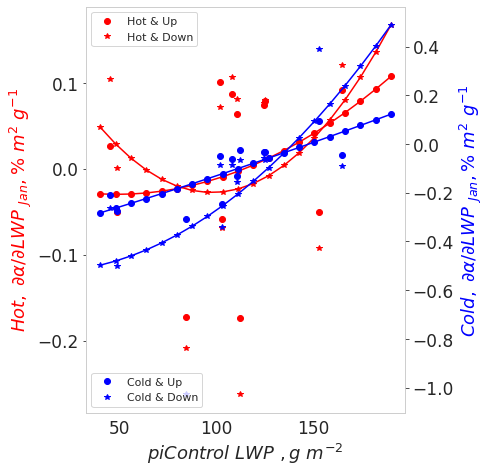

In [83]:
# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 11, 
       'axes.titlesize': 17, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig4 =  plt.figure(figsize=(6.34, 5.64))

ax41 = fig4.add_axes([0,0,0.7,1])

mean_LWP = []
Coef_albedo_lwp_4lrm = []

# area mean:
x_range  = arange(-180., 180., 5.)   #..logitude sequences edge: number:73
y_range  = arange(-85, -40., 5.) +2.5   #..southern-ocaen latitude edge: 9
print(x_range.shape)
#plt.scatter([1, 2], [stcoef2[j], stcoef1[j]], marker = deck_marker[j], label = deck_nas2[j], s= 48)


for i in range(len(deck2)):
    mean_LWP.append(nanmean(area_mean(output_4lrm_mon_bin_PI[deck_nas2[i]]['LWP_mon_bin'], y_range, x_range)))
    Coef_albedo_lwp_4lrm.append([stcoef11[i], stcoef12[i], stcoef13[i], stcoef14[i]])
mean_LWP = 1000.* asarray(mean_LWP)
Coef_albedo_lwp_4lrm = asarray(Coef_albedo_lwp_4lrm).reshape(12, 4) / 1000.
print(Coef_albedo_lwp_4lrm)

ax41.plot(mean_LWP, Coef_albedo_lwp_4lrm[:,1], marker = 'o', c = 'r', linestyle='None', label = 'Hot & Up')
ax41.set_xlabel(r"$ piControl\ LWP \ ,$" +r"$g\ m^{-2}$")
ax41.set_ylabel(r"$ Hot,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='r')

ax41.plot(mean_LWP, Coef_albedo_lwp_4lrm[:,3], marker = '*', c = 'r', linestyle='None', label = 'Hot & Down')

# Hot
ax42 = ax41.twinx()
ax42.plot(mean_LWP, Coef_albedo_lwp_4lrm[:,0], marker = 'o', c = 'b', linestyle = 'None', label = 'Cold & Up')

ax42.plot(mean_LWP, Coef_albedo_lwp_4lrm[:,2], marker = '*', c = 'b', linestyle = 'None', label = 'Cold & Down')
ax42.set_ylabel(r"$ Cold,\ \partial \alpha/\partial LWP \ _{Jan},$" +r"$\%\ m^{2}\ g^{-1}$", c ='b')

sns.set_style("whitegrid", {"grid.color": "white", "grid.linestyle": "None"})

# fit curves:

POPT_HotUp, POCV_HotUp = curve_fit(target_func_poly2, mean_LWP, Coef_albedo_lwp_4lrm[:,1])
POPT_HotDown, POCV_HotDown = curve_fit(target_func_poly2, mean_LWP, Coef_albedo_lwp_4lrm[:,3])
POPT_ColdUp, POCV_ColdUp = curve_fit(target_func_poly2, mean_LWP, Coef_albedo_lwp_4lrm[:,0])
POPT_ColdDown, POCV_ColdDown = curve_fit(target_func_poly2, mean_LWP, Coef_albedo_lwp_4lrm[:,2])
# plot the fit line:

x = linspace(40., 190., 20)
fitp2 = ax41.plot(x, POPT_HotUp[0] * x**2 + POPT_HotUp[1] * x + POPT_HotUp[2], c = 'r', marker = 'o')
fitp4 = ax41.plot(x, POPT_HotDown[0] * x**2 + POPT_HotDown[1] * x + POPT_HotDown[2], c = 'r', marker = '*')
fitp1 = ax42.plot(x, POPT_ColdUp[0] * x**2 + POPT_ColdUp[1] * x + POPT_ColdUp[2], c = 'b', marker = 'o')
fitp3 = ax42.plot(x, POPT_ColdDown[0] * x**2 + POPT_ColdDown[1] * x + POPT_ColdDown[2], c = 'b', marker = '*')

ax41.legend()
ax42.legend(loc = 'lower left')

In [90]:
x = np.array([3, 1, 2, 4, 5])

arg_index = np.argsort(x)
print(arg_index)

sorted_x = x[arg_index]
print(sorted_x)

[1 2 0 3 4]
[1 2 3 4 5]
